<h4><center>Parity Risk Strategies on a variety of Portfolio (Bonds, Equities, Commodities, and Currencies)</center></h4>

<h5><center>Dataset cover time frame from Jan 2004 till Dec 2007</center></h5>

In [1]:
# Load Modules
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import datetime
from matplotlib import rcParams
from datetime import datetime

In [2]:
# Dataset (Bond.csv) from Master Equity Portfolio Excel file
# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
bond_df_2004_2007 = pd.read_csv('Bond_2004_2007.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(bond_df_2004_2007.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
bond_df_2004_2007.head()

(48, 7)


,Date,Germany,Australia,US,UK,Canada,Japan
0,1/1/2004,100.02,105.10,100.98,100.92,104.87,100.66
1,2/1/2004,101.31,107.39,100.23,102.02,106.25,100.66
2,3/1/2004,102.45,107.20,101.30,102.13,106.75,98.78
3,4/1/2004,100.28,103.94,96.17,100.19,103.81,99.74
4,5/1/2004,99.43,104.58,101.25,98.86,103.52,99.83


In [3]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
bond_df_2004_2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       48 non-null     object 
 1   Germany    48 non-null     float64
 2   Australia  48 non-null     float64
 3   US         48 non-null     float64
 4   UK         48 non-null     float64
 5   Canada     48 non-null     float64
 6   Japan      48 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.8+ KB


In [4]:
# Use pandas.to_datetime() function to convert argument to datetime
bond_df_2004_2007['Date'] = pd.to_datetime(bond_df_2004_2007.Date)

In [5]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
bond_df_2004_2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       48 non-null     datetime64[ns]
 1   Germany    48 non-null     float64       
 2   Australia  48 non-null     float64       
 3   US         48 non-null     float64       
 4   UK         48 non-null     float64       
 5   Canada     48 non-null     float64       
 6   Japan      48 non-null     float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 2.8 KB


In [6]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
bond_df_2004_2007.set_index('Date',inplace=True)

In [7]:
# Use pandas.DataFrame.isnull() method to detect the Null values or missing values.
bond_df_2004_2007.isnull().any()

Germany      False
Australia    False
US           False
UK           False
Canada       False
Japan        False
dtype: bool

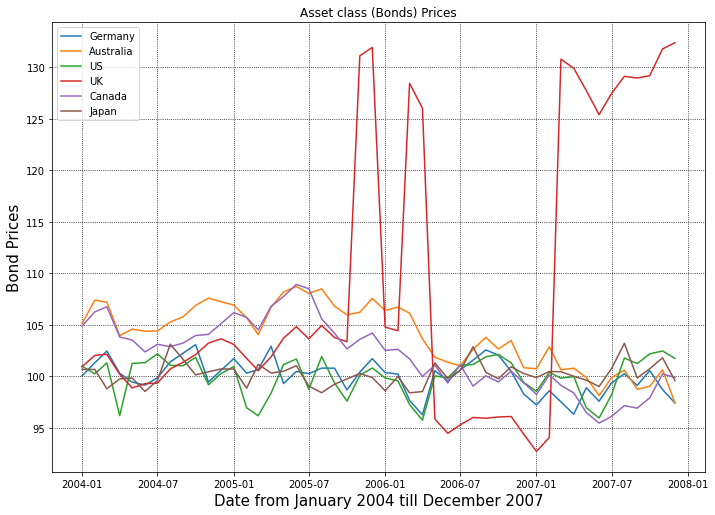

In [8]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(bond_df_2004_2007.index,bond_df_2004_2007.Germany, label='Germany')
plt.plot(bond_df_2004_2007.index,bond_df_2004_2007.Australia, label='Australia')
plt.plot(bond_df_2004_2007.index,bond_df_2004_2007.US, label='US')
plt.plot(bond_df_2004_2007.index,bond_df_2004_2007.UK, label='UK')
plt.plot(bond_df_2004_2007.index,bond_df_2004_2007.Canada, label='Canada')
plt.plot(bond_df_2004_2007.index,bond_df_2004_2007.Japan, label='Japan')
plt.title('Asset class (Bonds) Prices')
plt.xlabel('Date from January 2004 till December 2007', fontsize=15)
plt.ylabel('Bond Prices', fontsize=15)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

**The Price Rate of Change (ROC)**

- To get the percentage change for each bond price of each country on a monthly basis, I will use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element, and call it on the entire DataFrame.

In [9]:
# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
bond_df_2004_2007 = bond_df_2004_2007[['Germany','Australia','US','UK','Canada','Japan']].pct_change()
bond_df_2004_2007

,Germany,Australia,US,UK,Canada,Japan
Date,,,,,,
2004-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2004-02-01,0.012897,0.021789,-0.007427,0.010900,0.013159,0.000000
2004-03-01,0.011253,-0.001769,0.010675,0.001078,0.004706,-0.018677
2004-04-01,-0.021181,-0.030410,-0.050642,-0.018995,-0.027541,0.009719
2004-05-01,-0.008476,0.006157,0.052823,-0.013275,-0.002794,0.000902
2004-06-01,-0.002917,-0.002008,0.000593,0.004248,-0.011206,-0.013122
2004-07-01,0.007061,0.000287,0.008489,0.000504,0.007229,0.010759
2004-08-01,0.015525,0.008333,-0.010864,0.013893,-0.002231,0.035449
2004-09-01,0.008383,0.004750,-0.000396,0.006454,0.003402,-0.014451


In [10]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows (the first row)
bond_df_2004_2007.dropna(axis=0, inplace=True)
bond_df_2004_2007.head(5)

,Germany,Australia,US,UK,Canada,Japan
Date,,,,,,
2004-02-01,0.012897,0.021789,-0.007427,0.010900,0.013159,0.000000
2004-03-01,0.011253,-0.001769,0.010675,0.001078,0.004706,-0.018677
2004-04-01,-0.021181,-0.030410,-0.050642,-0.018995,-0.027541,0.009719
2004-05-01,-0.008476,0.006157,0.052823,-0.013275,-0.002794,0.000902
2004-06-01,-0.002917,-0.002008,0.000593,0.004248,-0.011206,-0.013122


In [11]:
print('There are {} rows in the DataFrame'.format(bond_df_2004_2007.shape[0]))

There are 47 rows in the DataFrame


In [12]:
# Use pandas.DataFrame.copy() function to make a copy of bond_df
bond_df_2004_2007_2 = bond_df_2004_2007.copy()

**Volatility**

- Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. However, volatility is often measured as either the standard deviation or variance between returns from that same security or market index.
- Volatility is a measure of the price fluctuations of an asset or portfolio.

**Annualizing Volatility**

- To Calculate the annualizing volatility, I will multiply the monthly standard deviation by the square root of number of months.

In [13]:
vol_bond_df_2004_2007 = bond_df_2004_2007

In [14]:
vol_bond_df_2004_2007.shape[0]

47

In [15]:
# Calculate the volatility (the price fluctuation of assets od the protfolio)

# Use pandas.DataFrame.rolling() function to provide rolling window calculation
# Use numpy.std() function to compute the standard deviation along the specified axis
# Use Python math sqrt() function to return the square root of any number

vol_bond_df_2004_2007['Germany_Vol'] = vol_bond_df_2004_2007['Germany'].rolling(47).std() * math.sqrt(47)
vol_bond_df_2004_2007['Australia_Vol'] = vol_bond_df_2004_2007['Australia'].rolling(47).std() * math.sqrt(47)
vol_bond_df_2004_2007['US_Vol'] = vol_bond_df_2004_2007['US'].rolling(47).std() * math.sqrt(47)
vol_bond_df_2004_2007['UK_Vol'] = vol_bond_df_2004_2007['UK'].rolling(47).std() * math.sqrt(47)
vol_bond_df_2004_2007['Canada_Vol'] = vol_bond_df_2004_2007['Canada'].rolling(47).std() * math.sqrt(47)
vol_bond_df_2004_2007['Japan_Vol'] = vol_bond_df_2004_2007['Japan'].rolling(47).std() * math.sqrt(47)

In [16]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
vol_bond_df_2004_2007.dropna(axis=0, inplace=True)

In [17]:
vol_bond_df_2004_2007[['Germany_Vol','Australia_Vol','US_Vol','UK_Vol','Canada_Vol','Japan_Vol']]

,Germany_Vol,Australia_Vol,US_Vol,UK_Vol,Canada_Vol,Japan_Vol
Date,,,,,,
2007-12-01,0.113803,0.095646,0.14365,0.622277,0.088115,0.099797


**Risk Parity Portfolio (RP):**

- Risk parity portfolio is an investment allocation strategy which focuses on the allocation of risk, rather than the allocation of capital.

- A Risky Parity Portfolio, also known as equal risk contribution portfolio (ERC) is an inverse volatility weighted portfolio if all pairwise correlations are equal, in other words, which individual assets, in the case of equity and bond, have equal risk contribution to the portfolio risk.

- However, Risk Parity portfolio was coined by Edward Qian (2015) when he examined the unbalanced risk allocation of traditional 60/40 allocation portfolios of bonds and stocks.

- Risk parity is a portfolio allocation strategy that uses risk to determine allocations across various components of an investment portfolio. The risk parity strategy modifies the modern portfolio theory (MPT) approach to investing through the use of leverage.

- A challenge with RP is that asset classes may carry some degree of risk exposure coming from other asset classes. The key point is that RP portfolio should hold balanced risk allocation between the economic risk factors such as, growth and inflation risk that are the major drivers of portfolio returns.

In [18]:
# With Risk Parity Strategy, I will target a specific level of risk or return,
# and divide the risk equally across all asset classes
volatility = (0.113803 + 0.095646 + 0.14365 + 0.622277 + 0.088115 + 0.099797) / 6
volatility

0.19388133333333332

In [19]:
# Set the annualized volatility target divide by six asset clases for the portfolio with Risk Parity
target_vol_bond_df_2004_2007 = 0.19388133333333332 / 6
target_vol_bond_df_2004_2007

0.032313555555555554

In [20]:
# Create a new dataframe called portfolio_df which calculates the allocation to each asset class 
port_bond_df_2004_2007 = bond_df_2004_2007

In [21]:
port_bond_df_2004_2007['Germany_Alloc'] = target_vol_bond_df_2004_2007 / vol_bond_df_2004_2007['Germany_Vol'] 
port_bond_df_2004_2007['Australia_Alloc'] = target_vol_bond_df_2004_2007 / vol_bond_df_2004_2007['Australia_Vol'] 
port_bond_df_2004_2007['US_Alloc'] = target_vol_bond_df_2004_2007 / vol_bond_df_2004_2007['US_Vol']
port_bond_df_2004_2007['UK_Alloc'] = target_vol_bond_df_2004_2007 / vol_bond_df_2004_2007['UK_Vol']
port_bond_df_2004_2007['Canada_Alloc'] = target_vol_bond_df_2004_2007 / vol_bond_df_2004_2007['Canada_Vol']
port_bond_df_2004_2007['Japan_Alloc'] = target_vol_bond_df_2004_2007 / vol_bond_df_2004_2007['Japan_Vol']

In [22]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
port_bond_df_2004_2007.dropna(axis=0, inplace=True)

In [23]:
port_bond_df_2004_2007[['Germany_Alloc','Australia_Alloc','US_Alloc','UK_Alloc','Canada_Alloc','Japan_Alloc']]

,Germany_Alloc,Australia_Alloc,US_Alloc,UK_Alloc,Canada_Alloc,Japan_Alloc
Date,,,,,,
2007-12-01,0.283943,0.337846,0.224947,0.051928,0.366721,0.323791


In [24]:
# I will multiply the monthly bond prices by the allocation percentage,
# in order to get the return for each portion of the portfolio (bonds)

In [25]:
bond_df_2004_2007_2['Germany_R'] = bond_df_2004_2007_2['Germany'] * 0.283943
bond_df_2004_2007_2['Australia_R'] = bond_df_2004_2007_2['Australia'] * 0.337846
bond_df_2004_2007_2['US_R'] = bond_df_2004_2007_2['US'] * 0.224947
bond_df_2004_2007_2['UK_R'] = bond_df_2004_2007_2['UK'] * 0.051928
bond_df_2004_2007_2['Canada_R'] = bond_df_2004_2007_2['Canada'] * 0.366721
bond_df_2004_2007_2['Japan_R'] = bond_df_2004_2007_2['Japan'] * 0.323791

In [26]:
bond_df_2004_2007_2.head(5)

,Germany,Australia,US,UK,Canada,Japan,Germany_R,Australia_R,US_R,UK_R,Canada_R,Japan_R
Date,,,,,,,,,,,,
2004-02-01,0.012897,0.021789,-0.007427,0.010900,0.013159,0.000000,0.003662,0.007361,-0.001671,0.000566,0.004826,0.000000
2004-03-01,0.011253,-0.001769,0.010675,0.001078,0.004706,-0.018677,0.003195,-0.000598,0.002401,0.000056,0.001726,-0.006047
2004-04-01,-0.021181,-0.030410,-0.050642,-0.018995,-0.027541,0.009719,-0.006014,-0.010274,-0.011392,-0.000986,-0.010100,0.003147
2004-05-01,-0.008476,0.006157,0.052823,-0.013275,-0.002794,0.000902,-0.002407,0.002080,0.011882,-0.000689,-0.001024,0.000292
2004-06-01,-0.002917,-0.002008,0.000593,0.004248,-0.011206,-0.013122,-0.000828,-0.000678,0.000133,0.000221,-0.004109,-0.004249


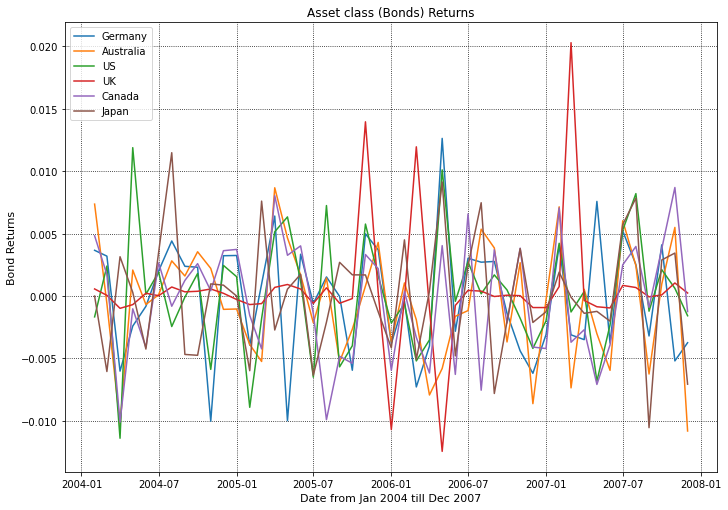

In [27]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(bond_df_2004_2007_2.index, bond_df_2004_2007_2.Germany_R, label='Germany')
plt.plot(bond_df_2004_2007_2.index, bond_df_2004_2007_2.Australia_R, label='Australia')
plt.plot(bond_df_2004_2007_2.index, bond_df_2004_2007_2.US_R, label='US')
plt.plot(bond_df_2004_2007_2.index, bond_df_2004_2007_2.UK_R, label='UK')
plt.plot(bond_df_2004_2007_2.index, bond_df_2004_2007_2.Canada_R, label='Canada')
plt.plot(bond_df_2004_2007_2.index, bond_df_2004_2007_2.Japan_R, label='Japan')
plt.title('Asset class (Bonds) Returns')
plt.xlabel('Date from Jan 2004 till Dec 2007', fontsize=11)
plt.ylabel('Bond Returns', fontsize=11)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

In [28]:
# Adding up all the returns of all asset classes for all countries

In [29]:
bond_df_2004_2007_2['Portfolio_R'] = bond_df_2004_2007_2['Germany_R'] + bond_df_2004_2007_2['Australia_R'] + bond_df_2004_2007_2['US_R'] + bond_df_2004_2007_2['UK_R'] + bond_df_2004_2007_2['Canada_R'] + bond_df_2004_2007_2['Japan_R']

In [30]:
# Creating a hypothetical $1,000 portfolio and calculate the cumulative performance of the risk parity portfolio.

In [31]:
# Use pandas.DataFrame.cumprod() function to return cumulative product over a dataframe or series axis
bond_df_2004_2007_2['Bond_Port_Value'] = ((bond_df_2004_2007_2['Portfolio_R'] + 1).cumprod())*1000

In [32]:
bond_df_2004_2007_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R', 'Portfolio_R', 'Bond_Port_Value']].head(5)

,Germany_R,Australia_R,US_R,UK_R,Canada_R,Japan_R,Portfolio_R,Bond_Port_Value
Date,,,,,,,,
2004-02-01,0.003662,0.007361,-0.001671,0.000566,0.004826,0.000000,0.014744,1014.744390
2004-03-01,0.003195,-0.000598,0.002401,0.000056,0.001726,-0.006047,0.000733,1015.488346
2004-04-01,-0.006014,-0.010274,-0.011392,-0.000986,-0.010100,0.003147,-0.035619,979.317243
2004-05-01,-0.002407,0.002080,0.011882,-0.000689,-0.001024,0.000292,0.010134,989.241898
2004-06-01,-0.000828,-0.000678,0.000133,0.000221,-0.004109,-0.004249,-0.009511,979.833369


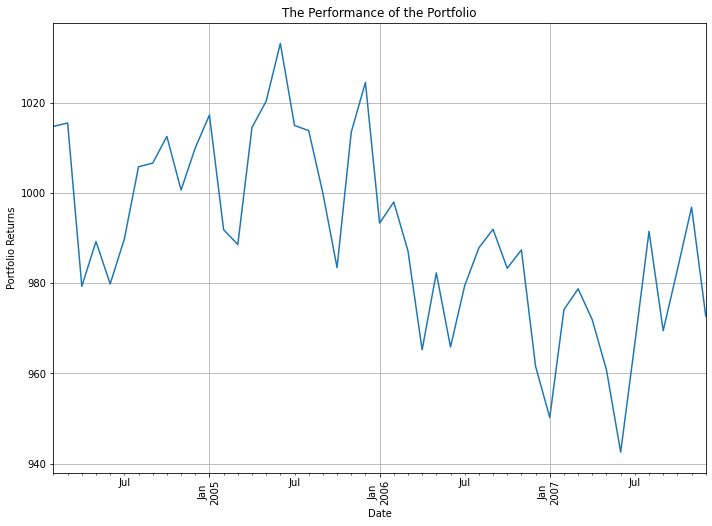

In [33]:
plt.figure(figsize=[ 11.69, 8.27])
plt.title('The Performance of the Portfolio');
plt.xlabel('Date from Jan 2004 till Dec 2007');
plt.ylabel('Portfolio Returns');
bond_df_2004_2007_2['Bond_Port_Value'].plot(grid=True)
plt.xticks(rotation=90);
plt.show();

In [34]:
# Calculate the Maximum Drawdown (MDD) of the Portfolio Value
(bond_df_2004_2007_2.Bond_Port_Value.max() - bond_df_2004_2007_2.Bond_Port_Value.min()) / bond_df_2004_2007_2.Bond_Port_Value.max()

0.08763512049148023

In [35]:
# Calculate the cumulative return of the portfolio
cumulative_return = 100 * (bond_df_2004_2007_2['Bond_Port_Value'][-1] / bond_df_2004_2007_2['Bond_Port_Value'][0] - 1)
print("The Cumulative Return of the Portfolio is {:.2f}%".format(cumulative_return))

The Cumulative Return of the Portfolio is -4.14%


**The Sharpe Ratio**

- The sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
- The Risk-Free Rate could by a U.S. Treasury Rate (A 10 year US Treasury rate is at 1.64%)

In [36]:
# use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element.
bond_df_2004_2007_2['Monthly_Return'] = bond_df_2004_2007_2['Bond_Port_Value'].pct_change(1)

In [37]:
# Calcualte the Sharpe Ratio
Sharpe_Ratio = bond_df_2004_2007_2['Monthly_Return'].mean() / bond_df_2004_2007_2['Monthly_Return'].std()
Sharpe_Ratio

-0.046304959305176495

In [38]:
# Annualize the Sharpe Ratio, since I calculate it from monthly values.
# There are twelve months in the year, so to annualize it, multiply the Sharpe Ratio by the square root of 12
Annualized_Sharpe_Ratio = Sharpe_Ratio * np.sqrt(47)
Annualized_Sharpe_Ratio

-0.3174508072819164

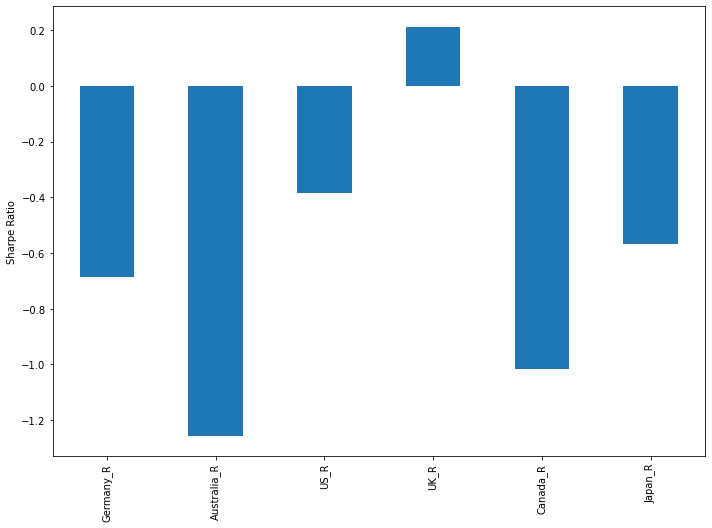

In [39]:
# Calcualte the Sharpe Ratio for bond portfolio
def bond_sharpe_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

return_series = bond_df_2004_2007_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R']]
rf = .0164 # Risk Free Rate
n = 47 # 47 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
bond_sharpes = bond_df_2004_2007_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R']].apply(bond_sharpe_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sharpe Ratio')
bond_sharpes.plot.bar();   

**The Sortino Ratio**

- The Sortino ratio is a variation of the Sharpe ratio that differentiates harmful volatility from total overall volatility by using the asset's standard deviation of negative portfolio returns—downside deviation—instead of the total standard deviation of portfolio returns. 
- The Sortino ratio takes an asset or portfolio's return and subtracts the risk-free rate, and then divides that amount by the asset's downside deviation. The ratio was named after Frank A. Sortino.
- The Sortino ratio = Portfolio Return - Target Return / Downside Risk

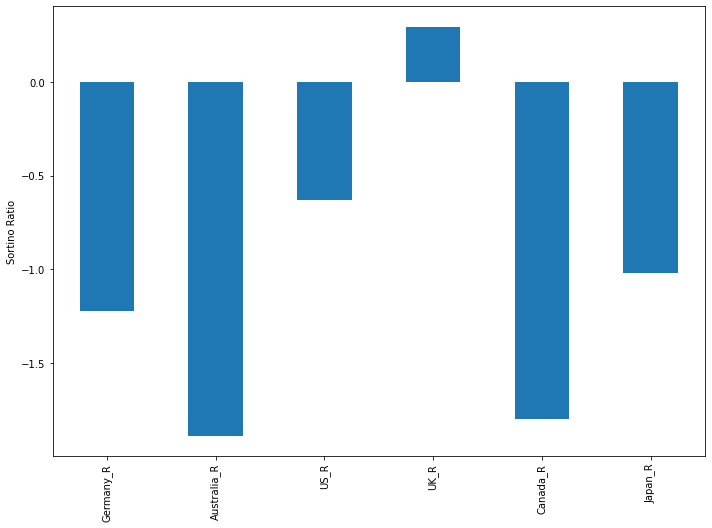

In [40]:
# Calcualte the Sortino Ratio for bond portfolio
def bond_sortino_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

return_series = bond_df_2004_2007_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R']]
rf = .0164 # Risk Free Rate
n = 47 # 47 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
bond_sortinos = bond_df_2004_2007_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R']].apply(bond_sortino_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sortino Ratio')
bond_sortinos.plot.bar();   

**Maximum Drawdown (MDD)**

- A maximum drawdown (MDD) is the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained. Maximum drawdown is an indicator of downside risk over a specified time period.
- The formula for Maximum Drawdown is MDD = (Trough Value - Peak Value) /Peak Value.

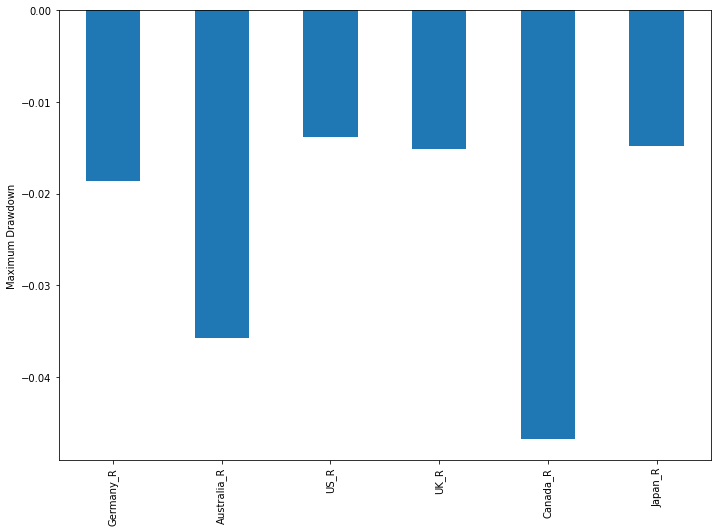

In [41]:
# Calcualte the Maximum Drawdown (MDD) for bond portfolio
def bond_MDD(return_series):
    comp_ret = (return_series + 1).cumprod()
    # Use pandas.DataFrame.expanding() function to provide expanding transformations
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret / peak) - 1
    return dd.min()

return_series = bond_df_2004_2007_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R']]

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
bond_max_drawdown = bond_df_2004_2007_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R']].apply(bond_MDD, axis=0)
plt.ylabel('Maximum Drawdown')
bond_max_drawdown.plot.bar();   

**Conclusion**

- Applying the risk parity portfolio strategy from Jan 2004 till December 2007.
- Target volatility 3.23 %.
- Maximum Drawdown 8.7%.
- Cumulative return of the o=portfolio -4.14%
- Sharpe Ratio - 4.6%.


In [42]:
# Dataset (Equity.csv) from Master Equity Portfolio Excel file
# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
equity_df_2004_2007 = pd.read_csv('Equity_2004_2007.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(equity_df_2004_2007.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
equity_df_2004_2007.head()

(48, 15)


,Date,Australia,Nethelands,Germany,Canada,Hong_Kong,France,Belgium,US,Japan,Spain,Sweden,UK,Italy,Singapore
0,1/1/2004,3272.0,353.31,4058.60,8521.39,13289370117,3638439941,2383760010,1131130005,10783.61,7929.9,673.91,4390.68,103.48,3253.59
1,2/1/2004,3360.6,356.59,4018.16,8788.49,13907030273,3725439941,2483159912,1144939941,11041.92,8249.4,698.18,4492.21,107.12,3244.15
2,3/1/2004,3415.3,338.87,3856.70,8585.93,12681669922,3625229980,2380350098,1126209961,11715.39,8018.1,690.28,4385.67,110.94,3434.66
3,4/1/2004,3400.8,341.41,3985.21,8243.97,11942959961,3674280029,2439610107,1107300049,11761.79,8109.5,685.59,4489.69,106.04,3141.85
4,5/1/2004,3460.2,337.19,3921.41,8417.32,12198240234,3669629883,2415429932,1120680054,11236.37,7959.3,673.95,4430.69,109.46,3288.77


In [43]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
equity_df_2004_2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        48 non-null     object 
 1   Australia   48 non-null     float64
 2   Nethelands  48 non-null     float64
 3   Germany     48 non-null     float64
 4   Canada      48 non-null     float64
 5   Hong_Kong   48 non-null     int64  
 6   France      48 non-null     int64  
 7   Belgium     48 non-null     int64  
 8   US          48 non-null     int64  
 9   Japan       48 non-null     float64
 10  Spain       48 non-null     float64
 11  Sweden      48 non-null     float64
 12  UK          48 non-null     float64
 13  Italy       48 non-null     float64
 14  Singapore   48 non-null     float64
dtypes: float64(10), int64(4), object(1)
memory usage: 5.8+ KB


In [44]:
# Use pandas.to_datetime() function to convert argument to datetime
equity_df_2004_2007['Date'] = pd.to_datetime(equity_df_2004_2007.Date)

In [45]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
equity_df_2004_2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        48 non-null     datetime64[ns]
 1   Australia   48 non-null     float64       
 2   Nethelands  48 non-null     float64       
 3   Germany     48 non-null     float64       
 4   Canada      48 non-null     float64       
 5   Hong_Kong   48 non-null     int64         
 6   France      48 non-null     int64         
 7   Belgium     48 non-null     int64         
 8   US          48 non-null     int64         
 9   Japan       48 non-null     float64       
 10  Spain       48 non-null     float64       
 11  Sweden      48 non-null     float64       
 12  UK          48 non-null     float64       
 13  Italy       48 non-null     float64       
 14  Singapore   48 non-null     float64       
dtypes: datetime64[ns](1), float64(10), int64(4)
memory usage: 5.8 KB


In [46]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
equity_df_2004_2007.set_index('Date',inplace=True)

In [47]:
# Use pandas.DataFrame.isnull() method to detect the Null values or missing values.
equity_df_2004_2007.isnull().any()

Australia     False
Nethelands    False
Germany       False
Canada        False
Hong_Kong     False
France        False
Belgium       False
US            False
Japan         False
Spain         False
Sweden        False
UK            False
Italy         False
Singapore     False
dtype: bool

In [48]:
# Use pandas.DataFrame.rename() function to alter axes labels (to remove space in the name)
equity_df_2004_2007 = equity_df_2004_2007.rename(columns={'France ':'France'})
equity_df_2004_2007 = equity_df_2004_2007.rename(columns={'Japan ':'Japan'})
equity_df_2004_2007 = equity_df_2004_2007.rename(columns={'Sweden ':'Sweden'})

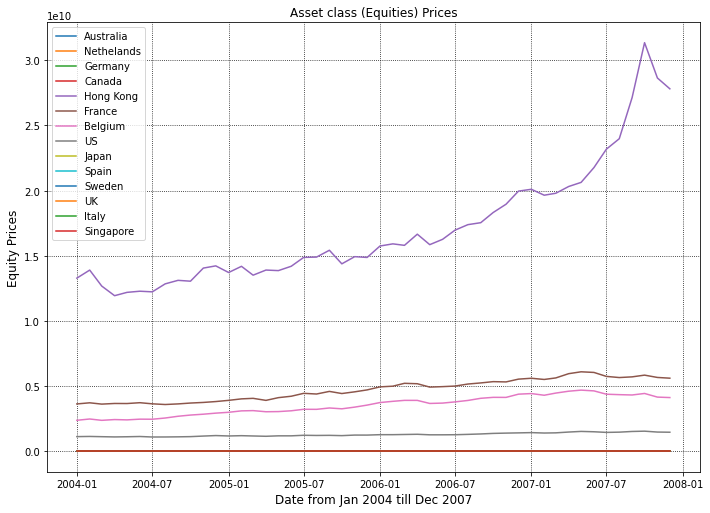

In [49]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Australia, label='Australia')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Nethelands, label='Nethelands')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Germany, label='Germany')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Canada, label='Canada')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Hong_Kong, label='Hong Kong')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.France, label='France')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Belgium, label='Belgium')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.US, label='US')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Japan, label='Japan')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Spain, label='Spain')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Sweden, label='Sweden')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.UK, label='UK')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Italy, label='Italy')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Singapore, label='Singapore')
plt.title('Asset class (Equities) Prices')
plt.xlabel('Date from Jan 2004 till Dec 2007', fontsize=12)
plt.ylabel('Equity Prices', fontsize=12)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

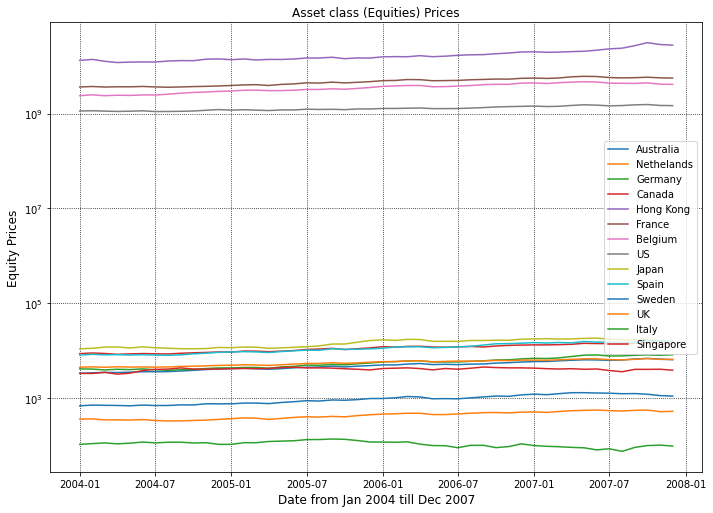

In [50]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Australia, label='Australia')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Nethelands, label='Nethelands')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Germany, label='Germany')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Canada, label='Canada')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Hong_Kong, label='Hong Kong')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.France, label='France')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Belgium, label='Belgium')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.US, label='US')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Japan, label='Japan')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Spain, label='Spain')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Sweden, label='Sweden')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.UK, label='UK')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Italy, label='Italy')
plt.plot(equity_df_2004_2007.index, equity_df_2004_2007.Singapore, label='Singapore')
plt.title('Asset class (Equities) Prices')
plt.xlabel('Date from Jan 2004 till Dec 2007', fontsize=12)
plt.ylabel('Equity Prices', fontsize=12)
plt.yscale('log')
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=5);

**The Price Rate of Change (ROC)**

- To get the percentage change for each bond price of each country on a monthly basis, I will use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element, and call it on the entire DataFrame.

In [51]:
# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
equity_df_2004_2007 = equity_df_2004_2007[['Australia','Nethelands','Germany','Canada','Hong_Kong','France','Belgium',
                                           'US','Japan','Spain','Sweden','UK','Italy','Singapore']].pct_change()
equity_df_2004_2007.head(5)

,Australia,Nethelands,Germany,Canada,Hong_Kong,France,Belgium,US,Japan,Spain,Sweden,UK,Italy,Singapore
Date,,,,,,,,,,,,,,
2004-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-02-01,0.027078,0.009284,-0.009964,0.031345,0.046478,0.023911,0.041699,0.012209,0.023954,0.040291,0.036014,0.023124,0.035176,-0.002901
2004-03-01,0.016277,-0.049693,-0.040183,-0.023048,-0.088111,-0.026899,-0.041403,-0.016359,0.060992,-0.028038,-0.011315,-0.023717,0.035661,0.058724
2004-04-01,-0.004246,0.007495,0.033321,-0.039828,-0.058250,0.013530,0.024896,-0.016791,0.003961,0.011399,-0.006794,0.023718,-0.044168,-0.085252
2004-05-01,0.017466,-0.012361,-0.016009,0.021027,0.021375,-0.001266,-0.009911,0.012083,-0.044672,-0.018521,-0.016978,-0.013141,0.032252,0.046762


In [52]:
# Use pandas.DataFrame.dropna() function to remove missing values in rows
equity_df_2004_2007.dropna(axis=0, inplace=True)
equity_df_2004_2007.head(5)

,Australia,Nethelands,Germany,Canada,Hong_Kong,France,Belgium,US,Japan,Spain,Sweden,UK,Italy,Singapore
Date,,,,,,,,,,,,,,
2004-02-01,0.027078,0.009284,-0.009964,0.031345,0.046478,0.023911,0.041699,0.012209,0.023954,0.040291,0.036014,0.023124,0.035176,-0.002901
2004-03-01,0.016277,-0.049693,-0.040183,-0.023048,-0.088111,-0.026899,-0.041403,-0.016359,0.060992,-0.028038,-0.011315,-0.023717,0.035661,0.058724
2004-04-01,-0.004246,0.007495,0.033321,-0.039828,-0.058250,0.013530,0.024896,-0.016791,0.003961,0.011399,-0.006794,0.023718,-0.044168,-0.085252
2004-05-01,0.017466,-0.012361,-0.016009,0.021027,0.021375,-0.001266,-0.009911,0.012083,-0.044672,-0.018521,-0.016978,-0.013141,0.032252,0.046762
2004-06-01,0.021010,0.023548,0.033488,0.015238,0.007174,0.017266,0.022865,0.017989,0.055400,0.014951,0.035878,0.007534,0.057098,0.138821


In [53]:
print('There are {} rows in the DataFrame'.format(equity_df_2004_2007.shape[0]))

There are 47 rows in the DataFrame


In [54]:
# Use pandas.DataFrame.copy() function to make a copy of bond_df
equity_df_2004_2007_2 = equity_df_2004_2007.copy()

**Volatility**

- Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. However, volatility is often measured as either the standard deviation or variance between returns from that same security or market index.
- Volatility is a measure of the price fluctuations of an asset or portfolio.

**Annualizing Volatility**

- To Calculate the annualizing volatility, I will multiply the monthly standard deviation by the square root of number of months.

In [55]:
vol_equity_df_2004_2007 = equity_df_2004_2007

In [56]:
vol_equity_df_2004_2007.shape[0]

47

In [57]:
# Calculate the volatility (the price fluctuation of assets od the protfolio)

# Use pandas.DataFrame.rolling() function to provide rolling window calculation
# Use numpy.std() function to compute the standard deviation along the specified axis
# Use Python math sqrt() function to return the square root of any number

vol_equity_df_2004_2007['Australia_Vol'] = vol_equity_df_2004_2007['Australia'].rolling(47).std() * math.sqrt(47)
vol_equity_df_2004_2007['Nethelands_Vol'] = vol_equity_df_2004_2007['Nethelands'].rolling(47).std() * math.sqrt(47)
vol_equity_df_2004_2007['Germany_Vol'] = vol_equity_df_2004_2007['Germany'].rolling(47).std() * math.sqrt(47)
vol_equity_df_2004_2007['Canada_Vol'] = vol_equity_df_2004_2007['Canada'].rolling(47).std() * math.sqrt(47)
vol_equity_df_2004_2007['Hong_Kong_Vol'] = vol_equity_df_2004_2007['Hong_Kong'].rolling(47).std() * math.sqrt(47)
vol_equity_df_2004_2007['France_Vol'] = vol_equity_df_2004_2007['France'].rolling(47).std() * math.sqrt(47)
vol_equity_df_2004_2007['Belgium_Vol'] = vol_equity_df_2004_2007['Belgium'].rolling(47).std() * math.sqrt(47)
vol_equity_df_2004_2007['US_Vol'] = vol_equity_df_2004_2007['US'].rolling(47).std() * math.sqrt(47)
vol_equity_df_2004_2007['Japan_Vol'] = vol_equity_df_2004_2007['Japan'].rolling(47).std() * math.sqrt(47)
vol_equity_df_2004_2007['Spain_Vol'] = vol_equity_df_2004_2007['Spain'].rolling(47).std() * math.sqrt(47)
vol_equity_df_2004_2007['Sweden_Vol'] = vol_equity_df_2004_2007['Sweden'].rolling(47).std() * math.sqrt(47)
vol_equity_df_2004_2007['UK_Vol'] = vol_equity_df_2004_2007['UK'].rolling(47).std() * math.sqrt(47)
vol_equity_df_2004_2007['Italy_Vol'] = vol_equity_df_2004_2007['Italy'].rolling(47).std() * math.sqrt(47)
vol_equity_df_2004_2007['Singapore_Vol'] = vol_equity_df_2004_2007['Singapore'].rolling(47).std() * math.sqrt(47)

In [58]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
vol_equity_df_2004_2007.dropna(axis=0, inplace=True)

In [59]:
vol_equity_df_2004_2007[['Australia_Vol','Nethelands_Vol','Germany_Vol','Canada_Vol','Hong_Kong_Vol','France_Vol',
                         'Belgium_Vol','US_Vol','Japan_Vol','Spain_Vol','Sweden_Vol','UK_Vol','Italy_Vol','Singapore_Vol']]

,Australia_Vol,Nethelands_Vol,Germany_Vol,Canada_Vol,Hong_Kong_Vol,France_Vol,Belgium_Vol,US_Vol,Japan_Vol,Spain_Vol,Sweden_Vol,UK_Vol,Italy_Vol,Singapore_Vol
Date,,,,,,,,,,,,,,
2007-12-01,0.165813,0.218687,0.218298,0.199618,0.324424,0.184943,0.203816,0.151243,0.272704,0.222627,0.244067,0.151271,0.463632,0.320098


In [60]:
# With Risk Parity Strategy, I will target a specific level of risk or return,
# and divide the risk equally across all asset classes
Avg_vol_equity = (0.165813 + 0.218687 + 0.218298 + 0.199618 + 0.324424 + 0.184943 + 0.203816 +0.151243+0.272704+0.222627+0.244067+0.151271+0.463632+0.320098) / 14
Avg_vol_equity

0.23866007142857143

**Risk Parity Portfolio (RP):**

- Risk parity portfolio is an investment allocation strategy which focuses on the allocation of risk, rather than the allocation of capital.

- A Risky Parity Portfolio, also known as equal risk contribution portfolio (ERC) is an inverse volatility weighted portfolio if all pairwise correlations are equal, in other words, which individual assets, in the case of equity and bond, have equal risk contribution to the portfolio risk.

- However, Risk Parity portfolio was coined by Edward Qian (2015) when he examined the unbalanced risk allocation of traditional 60/40 allocation portfolios of bonds and stocks.

- Risk parity is a portfolio allocation strategy that uses risk to determine allocations across various components of an investment portfolio. The risk parity strategy modifies the modern portfolio theory (MPT) approach to investing through the use of leverage.

- A challenge with RP is that asset classes may carry some degree of risk exposure coming from other asset classes. The key point is that RP portfolio should hold balanced risk allocation between the economic risk factors such as, growth and inflation risk that are the major drivers of portfolio returns.

In [61]:
# Set the annualized volatility target divide by six asset clases for the portfolio with Risk Parity
target_vol_equity_2004_2007 = 0.23866007142857143 / 14
target_vol_equity_2004_2007

0.017047147959183672

In [62]:
# Create a new dataframe called portfolio_df which calculates the allocation to each asset class 
port_equity_df_2004_2007 = equity_df_2004_2007

In [63]:
port_equity_df_2004_2007['Australia_Alloc'] = target_vol_equity_2004_2007 / vol_equity_df_2004_2007['Australia_Vol'] 
port_equity_df_2004_2007['Nethelands_Alloc'] = target_vol_equity_2004_2007 / vol_equity_df_2004_2007['Nethelands_Vol'] 
port_equity_df_2004_2007['Germany_Alloc'] = target_vol_equity_2004_2007 / vol_equity_df_2004_2007['Germany_Vol'] 
port_equity_df_2004_2007['Canada_Alloc'] = target_vol_equity_2004_2007 / vol_equity_df_2004_2007['Canada_Vol']
port_equity_df_2004_2007['Hong_Kong_Alloc'] = target_vol_equity_2004_2007 / vol_equity_df_2004_2007['Hong_Kong_Vol']
port_equity_df_2004_2007['France_Alloc'] = target_vol_equity_2004_2007 / vol_equity_df_2004_2007['France_Vol']
port_equity_df_2004_2007['Belgium_Alloc'] = target_vol_equity_2004_2007 / vol_equity_df_2004_2007['Belgium_Vol']
port_equity_df_2004_2007['US_Alloc'] = target_vol_equity_2004_2007 / vol_equity_df_2004_2007['US_Vol']
port_equity_df_2004_2007['Japan_Alloc'] = target_vol_equity_2004_2007 / vol_equity_df_2004_2007['Japan_Vol']
port_equity_df_2004_2007['Spain_Alloc'] = target_vol_equity_2004_2007 / vol_equity_df_2004_2007['Spain_Vol']
port_equity_df_2004_2007['Sweden_Alloc'] = target_vol_equity_2004_2007 / vol_equity_df_2004_2007['Sweden_Vol']
port_equity_df_2004_2007['UK_Alloc'] = target_vol_equity_2004_2007 / vol_equity_df_2004_2007['UK_Vol']
port_equity_df_2004_2007['Italy_Alloc'] = target_vol_equity_2004_2007 / vol_equity_df_2004_2007['Italy_Vol']
port_equity_df_2004_2007['Singapore_Alloc'] = target_vol_equity_2004_2007 / vol_equity_df_2004_2007['Singapore_Vol']

In [64]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
port_equity_df_2004_2007.dropna(axis=0, inplace=True)

In [65]:
port_equity_df_2004_2007[['Australia_Alloc','Nethelands_Alloc','Germany_Alloc','Canada_Alloc','Hong_Kong_Alloc',
                          'France_Alloc','Belgium_Alloc','US_Alloc','Japan_Alloc','Spain_Alloc','Sweden_Alloc',
                          'UK_Alloc','Italy_Alloc','Singapore_Alloc']]

,Australia_Alloc,Nethelands_Alloc,Germany_Alloc,Canada_Alloc,Hong_Kong_Alloc,France_Alloc,Belgium_Alloc,US_Alloc,Japan_Alloc,Spain_Alloc,Sweden_Alloc,UK_Alloc,Italy_Alloc,Singapore_Alloc
Date,,,,,,,,,,,,,,
2007-12-01,0.102809,0.077952,0.078091,0.085399,0.052546,0.092175,0.08364,0.112714,0.062512,0.076573,0.069846,0.112693,0.036769,0.053256


In [66]:
# I will multiply the monthly bond prices by the allocation percentage,
# in order to get the return for each portion of the portfolio (equities)

In [67]:
equity_df_2004_2007_2['Australia_R'] = equity_df_2004_2007_2['Australia'] * 0.102809
equity_df_2004_2007_2['Nethelands_R'] = equity_df_2004_2007_2['Nethelands'] * 0.077952
equity_df_2004_2007_2['Germany_R'] = equity_df_2004_2007_2['Germany'] * 0.078091
equity_df_2004_2007_2['Canada_R'] = equity_df_2004_2007_2['Canada'] * 0.085399
equity_df_2004_2007_2['Hong_Kong_R'] = equity_df_2004_2007_2['Hong_Kong'] * 0.052546
equity_df_2004_2007_2['France_R'] = equity_df_2004_2007_2['France'] * 0.092175
equity_df_2004_2007_2['Belgium_R'] = equity_df_2004_2007_2['Belgium'] * 0.08364
equity_df_2004_2007_2['US_R'] = equity_df_2004_2007_2['US'] * 0.112714
equity_df_2004_2007_2['Japan_R'] = equity_df_2004_2007_2['Japan'] * 0.062512
equity_df_2004_2007_2['Spain_R'] = equity_df_2004_2007_2['Spain'] * 0.076573
equity_df_2004_2007_2['Sweden_R'] = equity_df_2004_2007_2['Sweden'] * 0.069846
equity_df_2004_2007_2['UK_R'] = equity_df_2004_2007_2['UK'] * 0.112693
equity_df_2004_2007_2['Italy_R'] = equity_df_2004_2007_2['Italy'] * 0.036769
equity_df_2004_2007_2['Singapore_R'] = equity_df_2004_2007_2['Singapore'] * 0.053256

In [68]:
equity_df_2004_2007_2

,Australia,Nethelands,Germany,Canada,Hong_Kong,France,Belgium,US,Japan,Spain,...,Hong_Kong_R,France_R,Belgium_R,US_R,Japan_R,Spain_R,Sweden_R,UK_R,Italy_R,Singapore_R
Date,,,,,,,,,,,,,,,,,,,,,
2004-02-01,0.027078,0.009284,-0.009964,0.031345,0.046478,0.023911,0.041699,0.012209,0.023954,0.040291,...,0.002442,0.002204,0.003488,0.001376,0.001497,0.003085,0.002515,0.002606,0.001293,-0.000155
2004-03-01,0.016277,-0.049693,-0.040183,-0.023048,-0.088111,-0.026899,-0.041403,-0.016359,0.060992,-0.028038,...,-0.004630,-0.002479,-0.003463,-0.001844,0.003813,-0.002147,-0.000790,-0.002673,0.001311,0.003127
2004-04-01,-0.004246,0.007495,0.033321,-0.039828,-0.058250,0.013530,0.024896,-0.016791,0.003961,0.011399,...,-0.003061,0.001247,0.002082,-0.001893,0.000248,0.000873,-0.000475,0.002673,-0.001624,-0.004540
2004-05-01,0.017466,-0.012361,-0.016009,0.021027,0.021375,-0.001266,-0.009911,0.012083,-0.044672,-0.018521,...,0.001123,-0.000117,-0.000829,0.001362,-0.002793,-0.001418,-0.001186,-0.001481,0.001186,0.002490
2004-06-01,0.021010,0.023548,0.033488,0.015238,0.007174,0.017266,0.022865,0.017989,0.055400,0.014951,...,0.000377,0.001592,0.001912,0.002028,0.003463,0.001145,0.002506,0.000849,0.002099,0.007393
2004-07-01,0.000906,-0.044099,-0.038769,-0.010240,-0.003884,-0.023008,-0.002238,-0.034291,-0.044953,-0.019682,...,-0.000204,-0.002121,-0.000187,-0.003865,-0.002810,-0.001507,-0.001484,-0.001287,-0.001459,0.003085
2004-08-01,0.004694,-0.020581,-0.028340,-0.009581,0.050028,-0.014483,0.037706,0.002287,-0.021543,-0.006288,...,0.002629,-0.001335,0.003154,0.000258,-0.001347,-0.000482,0.000177,0.001181,0.001125,0.000717
2004-09-01,0.031610,0.002538,0.028450,0.034769,0.020992,0.012890,0.052825,0.009364,-0.023301,0.020294,...,0.001103,0.001188,0.004418,0.001055,-0.001457,0.001554,0.002114,0.002816,0.000151,0.003177
2004-10-01,0.030996,0.020189,0.017301,0.023382,-0.004982,0.018187,0.034249,0.014014,-0.004818,0.048461,...,-0.000262,0.001676,0.002865,0.001580,-0.000301,0.003711,-0.000318,0.001318,-0.001474,-0.002902


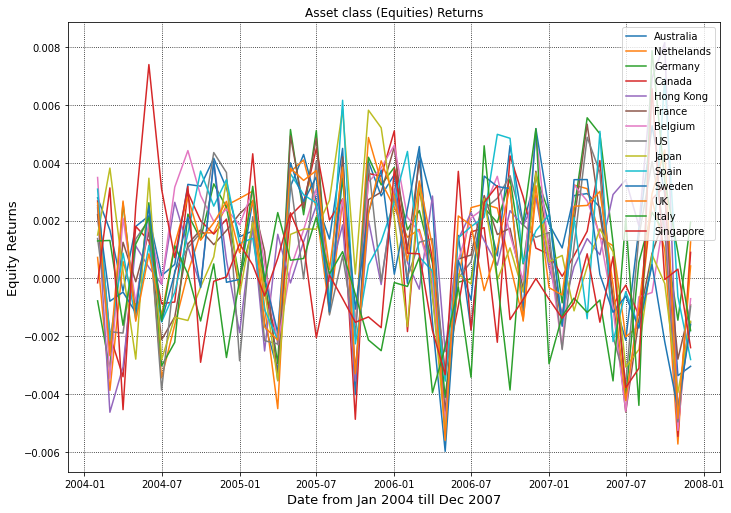

In [69]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(equity_df_2004_2007_2.index, equity_df_2004_2007_2.Australia_R, label='Australia')
plt.plot(equity_df_2004_2007_2.index, equity_df_2004_2007_2.Nethelands_R, label='Nethelands')
plt.plot(equity_df_2004_2007_2.index, equity_df_2004_2007_2.Germany_R, label='Germany')
plt.plot(equity_df_2004_2007_2.index, equity_df_2004_2007_2.Canada_R, label='Canada')
plt.plot(equity_df_2004_2007_2.index, equity_df_2004_2007_2.Hong_Kong_R, label='Hong Kong')
plt.plot(equity_df_2004_2007_2.index, equity_df_2004_2007_2.France_R, label='France')
plt.plot(equity_df_2004_2007_2.index, equity_df_2004_2007_2.Belgium_R, label='Belgium')
plt.plot(equity_df_2004_2007_2.index, equity_df_2004_2007_2.US_R, label='US')
plt.plot(equity_df_2004_2007_2.index, equity_df_2004_2007_2.Japan_R, label='Japan')
plt.plot(equity_df_2004_2007_2.index, equity_df_2004_2007_2.Spain_R, label='Spain')
plt.plot(equity_df_2004_2007_2.index, equity_df_2004_2007_2.Sweden_R, label='Sweden')
plt.plot(equity_df_2004_2007_2.index, equity_df_2004_2007_2.UK_R, label='UK')
plt.plot(equity_df_2004_2007_2.index, equity_df_2004_2007_2.Italy_R, label='Italy')
plt.plot(equity_df_2004_2007_2.index, equity_df_2004_2007_2.Singapore_R, label='Singapore')
plt.title('Asset class (Equities) Returns')
plt.xlabel('Date from Jan 2004 till Dec 2007', fontsize=13)
plt.ylabel('Equity Returns', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=1);

In [70]:
# Adding up all the returns of all asset classes for all countries

In [71]:
equity_df_2004_2007_2['Portfolio_R'] = equity_df_2004_2007_2['Australia_R'] + equity_df_2004_2007_2['Nethelands_R'] + equity_df_2004_2007_2['Germany_R'] + equity_df_2004_2007_2['Canada_R'] + equity_df_2004_2007_2['Hong_Kong_R'] + equity_df_2004_2007_2['France_R'] + equity_df_2004_2007_2['Belgium_R'] + equity_df_2004_2007_2['US_R'] + equity_df_2004_2007_2['Japan_R'] + equity_df_2004_2007_2['Spain_R'] + equity_df_2004_2007_2['Sweden_R'] + equity_df_2004_2007_2['UK_R'] + equity_df_2004_2007_2['Italy_R'] + equity_df_2004_2007_2['Singapore_R']

In [72]:
# Creating a hypothetical $1,000 portfolio and calculate the cumulative performance of the risk parity portfolio.

In [73]:
# Use pandas.DataFrame.cumprod() function to return cumulative product over a dataframe or series axis
equity_df_2004_2007_2['Equity_Port_Value'] = ((equity_df_2004_2007_2['Portfolio_R'] + 1).cumprod())*1000

In [74]:
equity_df_2004_2007_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
                       'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R','Italy_R',
                       'Singapore_R','Portfolio_R', 'Equity_Port_Value']].head(5)

,Australia_R,Nethelands_R,Germany_R,Canada_R,Hong_Kong_R,France_R,Belgium_R,US_R,Japan_R,Spain_R,Sweden_R,UK_R,Italy_R,Singapore_R,Portfolio_R,Equity_Port_Value
Date,,,,,,,,,,,,,,,,
2004-02-01,0.002784,0.000724,-0.000778,0.002677,0.002442,0.002204,0.003488,0.001376,0.001497,0.003085,0.002515,0.002606,0.001293,-0.000155,0.025759,1025.759089
2004-03-01,0.001673,-0.003874,-0.003138,-0.001968,-0.004630,-0.002479,-0.003463,-0.001844,0.003813,-0.002147,-0.000790,-0.002673,0.001311,0.003127,-0.017081,1008.237926
2004-04-01,-0.000436,0.000584,0.002602,-0.003401,-0.003061,0.001247,0.002082,-0.001893,0.000248,0.000873,-0.000475,0.002673,-0.001624,-0.004540,-0.005121,1003.075003
2004-05-01,0.001796,-0.000964,-0.001250,0.001796,0.001123,-0.000117,-0.000829,0.001362,-0.002793,-0.001418,-0.001186,-0.001481,0.001186,0.002490,-0.000284,1002.790058
2004-06-01,0.002160,0.001836,0.002615,0.001301,0.000377,0.001592,0.001912,0.002028,0.003463,0.001145,0.002506,0.000849,0.002099,0.007393,0.031276,1034.153369


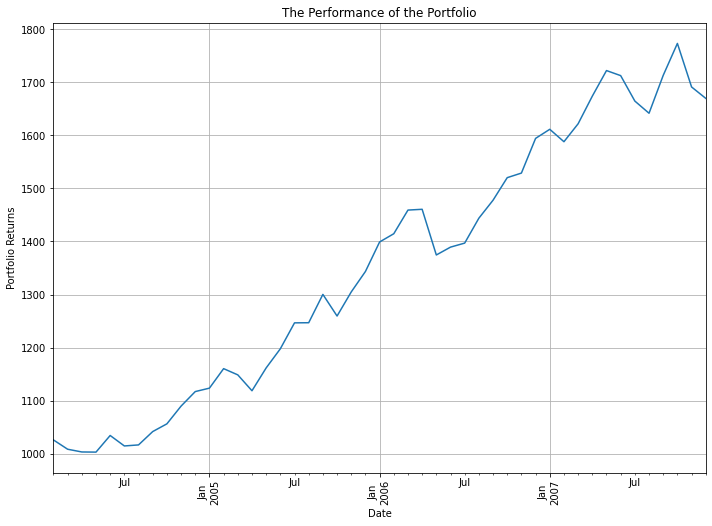

In [75]:
plt.figure(figsize=[ 11.69, 8.27])
plt.title('The Performance of the Portfolio');
plt.xlabel('Date');
plt.ylabel('Portfolio Returns');
equity_df_2004_2007_2['Equity_Port_Value'].plot(grid=True)
plt.xticks(rotation=90);
plt.show();

In [76]:
# Calculate the Maximum Drawdown (MDD) of the Portfolio Value
(equity_df_2004_2007_2.Equity_Port_Value.max() - equity_df_2004_2007_2.Equity_Port_Value.min()) / equity_df_2004_2007_2.Equity_Port_Value.max()

0.43457521955804884

In [77]:
# Calculate the cumulative return of the portfolio
cumulative_return = 100 * (equity_df_2004_2007_2['Equity_Port_Value'][-1] / equity_df_2004_2007_2['Equity_Port_Value'][0] - 1)
print("The Cumulative Return of the Portfolio is {:.2f}%".format(cumulative_return))

The Cumulative Return of the Portfolio is 62.80%


**The Sharpe Ratio**

- The sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
- The Risk-Free Rate could by a U.S. Treasury Rate (A 10 year US Treasury rate is at 1.64%)

In [78]:
# use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element.
equity_df_2004_2007_2['Monthly_Return'] = equity_df_2004_2007_2['Equity_Port_Value'].pct_change(1)

In [79]:
# Calcualte the Sharpe Ratio
Sharpe_Ratio = equity_df_2004_2007_2['Monthly_Return'].mean() / equity_df_2004_2007_2['Monthly_Return'].std()
Sharpe_Ratio

0.4286313096093509

In [80]:
# Annualize the Sharpe Ratio, since I calculate it from monthly values.
# There are twelve months in the year, so to annualize it, multiply the Sharpe Ratio by the square root of 12
Annualized_Sharpe_Ratio = Sharpe_Ratio * np.sqrt(46)
Annualized_Sharpe_Ratio

2.9071189828697506

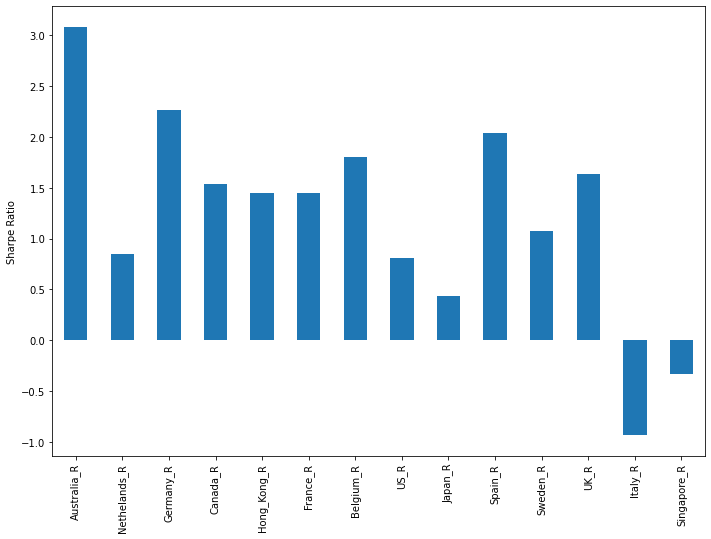

In [81]:
# Calcualte the Sharpe Ratio for equity portfolio
def equity_sharpe_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

return_series = equity_df_2004_2007_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
                                       'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R',
                                       'Italy_R','Singapore_R']]
rf = .0164 # Risk Free Rate
n = 46 # 46 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
equity_sharpes = equity_df_2004_2007_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
                                        'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R',
                                        'Italy_R','Singapore_R']].apply(equity_sharpe_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sharpe Ratio')
equity_sharpes.plot.bar();   

**The Sortino Ratio**

- The Sortino ratio is a variation of the Sharpe ratio that differentiates harmful volatility from total overall volatility by using the asset's standard deviation of negative portfolio returns—downside deviation—instead of the total standard deviation of portfolio returns. 
- The Sortino ratio takes an asset or portfolio's return and subtracts the risk-free rate, and then divides that amount by the asset's downside deviation. The ratio was named after Frank A. Sortino.
- The Sortino ratio = Portfolio Return - Target Return / Downside Risk

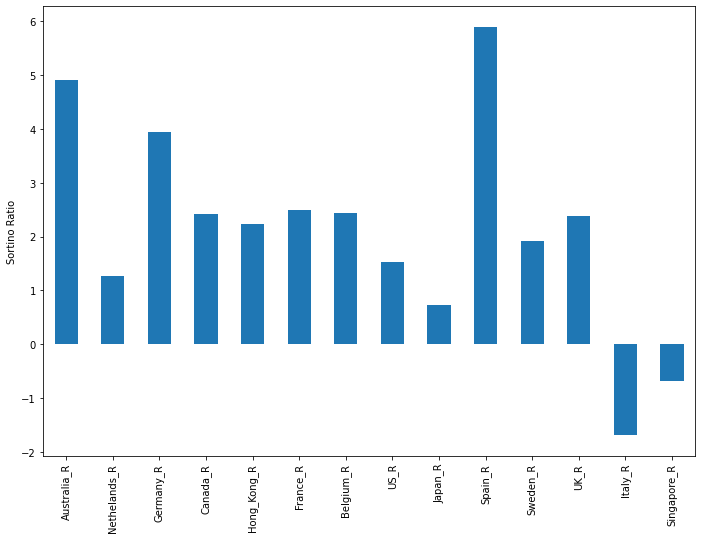

In [82]:
# Calcualte the Sortino Ratio for equity portfolio
def equity_sortino_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

return_series = equity_df_2004_2007_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
            'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R','Italy_R',
            'Singapore_R']]
rf = .0164 # Risk Free Rate
n = 46 # 46 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
equity_sortinos = equity_df_2004_2007_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
            'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R','Italy_R',
            'Singapore_R']].apply(equity_sortino_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sortino Ratio')
equity_sortinos.plot.bar();   

**Maximum Drawdown (MDD)**

- A maximum drawdown (MDD) is the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained. Maximum drawdown is an indicator of downside risk over a specified time period.
- The formula for Maximum Drawdown is MDD = (Trough Value - Peak Value) /Peak Value.

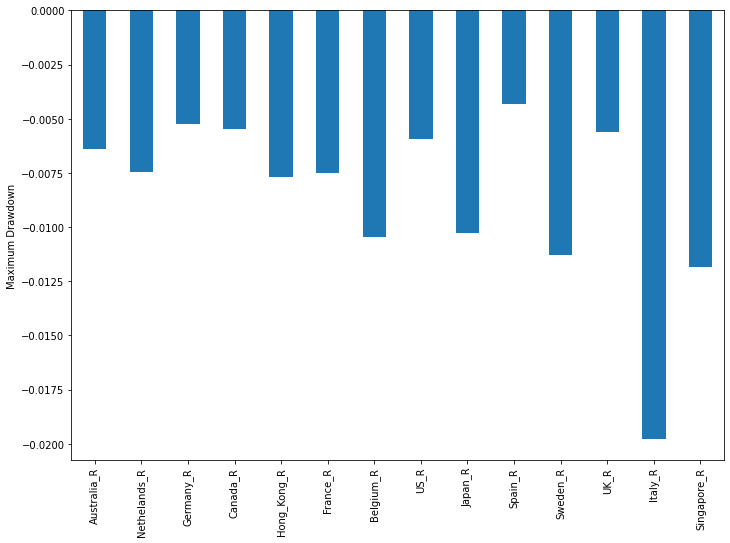

In [83]:
# Calcualte the Maximum Drawdown (MDD) for bond portfolio
def equity_MDD(return_series):
    comp_ret = (return_series + 1).cumprod()
    # Use pandas.DataFrame.expanding() function to provide expanding transformations
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret / peak) - 1
    return dd.min()

return_series = equity_df_2004_2007_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
            'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R','Italy_R',
            'Singapore_R']]

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
equity_max_drawdown = equity_df_2004_2007_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
            'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R','Italy_R',
            'Singapore_R']].apply(equity_MDD, axis=0)
plt.ylabel('Maximum Drawdown')
equity_max_drawdown.plot.bar();   

**Conclusion**

- Applying the risk parity portfolio strategy from Jan 2004 till December 2007.
- Target volatility 1.68 %.
- Maximum Drawdown 43.32%.
- Cumulative return of the o=portfolio 62.47%
- Sharpe Ratio - 4.2%.


In [84]:
# Dataset (Emerging_Market.csv) from Master Equity Portfolio Excel file
# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
emerg_market_df_2004_2007 = pd.read_csv('Emerging_market_2004_2007.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(emerg_market_df_2004_2007.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
emerg_market_df_2004_2007.head()

(48, 12)


,Date,Thailand,Chile,Brazil,Argentina,Russia,Turkey,Portugal,Finland,South Africa,Indonesia,Venezuela
0,1/1/2004,698.90,1408.86,21851.44,1140.81,551.72,172.59,7011.72,1588.13,9953.72,752.93,14588.25
1,2/1/2004,716.30,1543.08,21755.02,1183.14,591.09,188.89,7630.46,1658.37,10005.41,761.08,12954.31
2,3/1/2004,647.30,1458.90,22142.26,1201.66,644.64,201.91,7540.45,1617.56,9773.27,735.68,11064.37
3,4/1/2004,648.15,1430.60,19607.23,1077.93,561.78,180.23,7500.35,1601.09,9455.17,783.41,11872.87
4,5/1/2004,641.05,1428.80,19544.67,952.62,535.40,170.81,7223.18,1551.55,9525.95,732.52,14819.87


In [85]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
emerg_market_df_2004_2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          48 non-null     object 
 1   Thailand      48 non-null     float64
 2   Chile         48 non-null     float64
 3   Brazil        48 non-null     float64
 4   Argentina     48 non-null     float64
 5   Russia        48 non-null     float64
 6   Turkey        48 non-null     float64
 7   Portugal      48 non-null     float64
 8   Finland       48 non-null     float64
 9   South Africa  48 non-null     float64
 10  Indonesia     48 non-null     float64
 11  Venezuela     48 non-null     float64
dtypes: float64(11), object(1)
memory usage: 4.6+ KB


In [86]:
# Use pandas.to_datetime() function to convert argument to datetime
emerg_market_df_2004_2007['Date'] = pd.to_datetime(emerg_market_df_2004_2007.Date)

In [87]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
emerg_market_df_2004_2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          48 non-null     datetime64[ns]
 1   Thailand      48 non-null     float64       
 2   Chile         48 non-null     float64       
 3   Brazil        48 non-null     float64       
 4   Argentina     48 non-null     float64       
 5   Russia        48 non-null     float64       
 6   Turkey        48 non-null     float64       
 7   Portugal      48 non-null     float64       
 8   Finland       48 non-null     float64       
 9   South Africa  48 non-null     float64       
 10  Indonesia     48 non-null     float64       
 11  Venezuela     48 non-null     float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 4.6 KB


In [88]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
emerg_market_df_2004_2007.set_index('Date',inplace=True)

In [89]:
# Use pandas.DataFrame.isnull() method to detect the Null values or missing values.
emerg_market_df_2004_2007.isnull().any()

Thailand        False
Chile           False
Brazil          False
Argentina       False
Russia          False
Turkey          False
Portugal        False
Finland         False
South Africa    False
Indonesia       False
Venezuela       False
dtype: bool

In [90]:
# Use pandas.DataFrame.rename() function to alter axes labels (to remove space in the name)
emerg_market_df_2004_2007 = emerg_market_df_2004_2007.rename(columns={'South Africa':'South_Africa'})

In [91]:
emerg_market_df_2004_2007[['Thailand','Chile','Brazil','Argentina','Russia','Turkey','Portugal','Finland',
                           'South_Africa','Indonesia','Venezuela']].head(3)

,Thailand,Chile,Brazil,Argentina,Russia,Turkey,Portugal,Finland,South_Africa,Indonesia,Venezuela
Date,,,,,,,,,,,
2004-01-01,698.9,1408.86,21851.44,1140.81,551.72,172.59,7011.72,1588.13,9953.72,752.93,14588.25
2004-02-01,716.3,1543.08,21755.02,1183.14,591.09,188.89,7630.46,1658.37,10005.41,761.08,12954.31
2004-03-01,647.3,1458.90,22142.26,1201.66,644.64,201.91,7540.45,1617.56,9773.27,735.68,11064.37


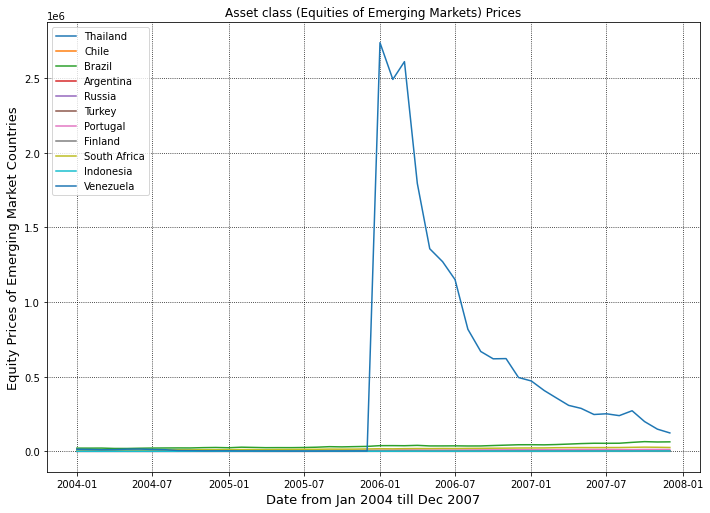

In [92]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(emerg_market_df_2004_2007.index, emerg_market_df_2004_2007.Thailand, label='Thailand')
plt.plot(emerg_market_df_2004_2007.index, emerg_market_df_2004_2007.Chile, label='Chile')
plt.plot(emerg_market_df_2004_2007.index, emerg_market_df_2004_2007.Brazil, label='Brazil')
plt.plot(emerg_market_df_2004_2007.index, emerg_market_df_2004_2007.Argentina, label='Argentina')
plt.plot(emerg_market_df_2004_2007.index, emerg_market_df_2004_2007.Russia, label='Russia')
plt.plot(emerg_market_df_2004_2007.index, emerg_market_df_2004_2007.Turkey, label='Turkey')
plt.plot(emerg_market_df_2004_2007.index, emerg_market_df_2004_2007.Portugal, label='Portugal')
plt.plot(emerg_market_df_2004_2007.index, emerg_market_df_2004_2007.Finland, label='Finland')
plt.plot(emerg_market_df_2004_2007.index, emerg_market_df_2004_2007.South_Africa, label='South Africa')
plt.plot(emerg_market_df_2004_2007.index, emerg_market_df_2004_2007.Indonesia, label='Indonesia')
plt.plot(emerg_market_df_2004_2007.index, emerg_market_df_2004_2007.Venezuela, label='Venezuela')
plt.title('Asset class (Equities of Emerging Markets) Prices')
plt.xlabel('Date from Jan 2004 till Dec 2007', fontsize=13)
plt.ylabel('Equity Prices of Emerging Market Countries', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

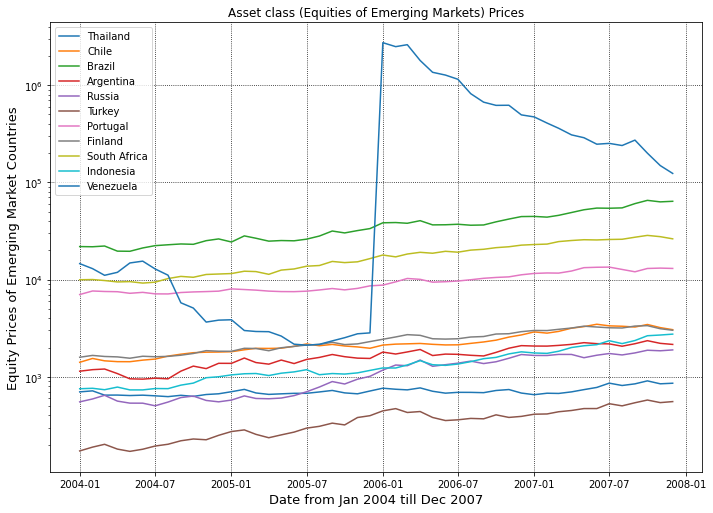

In [93]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(emerg_market_df_2004_2007.index, emerg_market_df_2004_2007.Thailand, label='Thailand')
plt.plot(emerg_market_df_2004_2007.index, emerg_market_df_2004_2007.Chile, label='Chile')
plt.plot(emerg_market_df_2004_2007.index, emerg_market_df_2004_2007.Brazil, label='Brazil')
plt.plot(emerg_market_df_2004_2007.index, emerg_market_df_2004_2007.Argentina, label='Argentina')
plt.plot(emerg_market_df_2004_2007.index, emerg_market_df_2004_2007.Russia, label='Russia')
plt.plot(emerg_market_df_2004_2007.index, emerg_market_df_2004_2007.Turkey, label='Turkey')
plt.plot(emerg_market_df_2004_2007.index, emerg_market_df_2004_2007.Portugal, label='Portugal')
plt.plot(emerg_market_df_2004_2007.index, emerg_market_df_2004_2007.Finland, label='Finland')
plt.plot(emerg_market_df_2004_2007.index, emerg_market_df_2004_2007.South_Africa, label='South Africa')
plt.plot(emerg_market_df_2004_2007.index, emerg_market_df_2004_2007.Indonesia, label='Indonesia')
plt.plot(emerg_market_df_2004_2007.index, emerg_market_df_2004_2007.Venezuela, label='Venezuela')
plt.title('Asset class (Equities of Emerging Markets) Prices')
plt.xlabel('Date from Jan 2004 till Dec 2007', fontsize=13)
plt.ylabel('Equity Prices of Emerging Market Countries', fontsize=13)
plt.yscale('log')
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

**The Price Rate of Change (ROC)**

- To get the percentage change for each bond price of each country on a monthly basis, I will use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element, and call it on the entire DataFrame.

In [94]:
# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
emerg_market_df_2004_2007 = emerg_market_df_2004_2007[['Thailand','Chile','Brazil','Argentina','Russia','Turkey','Portugal',
                                                       'Finland', 'South_Africa','Indonesia','Venezuela']].pct_change()
emerg_market_df_2004_2007.head(5)

,Thailand,Chile,Brazil,Argentina,Russia,Turkey,Portugal,Finland,South_Africa,Indonesia,Venezuela
Date,,,,,,,,,,,
2004-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-02-01,0.024896,0.095269,-0.004413,0.037105,0.071359,0.094443,0.088244,0.044228,0.005193,0.010824,-0.112004
2004-03-01,-0.096328,-0.054553,0.017800,0.015653,0.090595,0.068929,-0.011796,-0.024609,-0.023201,-0.033374,-0.145893
2004-04-01,0.001313,-0.019398,-0.114488,-0.102966,-0.128537,-0.107375,-0.005318,-0.010182,-0.032548,0.064879,0.073072
2004-05-01,-0.010954,-0.001258,-0.003191,-0.116251,-0.046958,-0.052267,-0.036954,-0.030941,0.007486,-0.064960,0.248213


In [95]:
# Use pandas.DataFrame.dropna() function to remove missing values in rows
emerg_market_df_2004_2007.dropna(axis=0, inplace=True)
emerg_market_df_2004_2007.head(5)

,Thailand,Chile,Brazil,Argentina,Russia,Turkey,Portugal,Finland,South_Africa,Indonesia,Venezuela
Date,,,,,,,,,,,
2004-02-01,0.024896,0.095269,-0.004413,0.037105,0.071359,0.094443,0.088244,0.044228,0.005193,0.010824,-0.112004
2004-03-01,-0.096328,-0.054553,0.017800,0.015653,0.090595,0.068929,-0.011796,-0.024609,-0.023201,-0.033374,-0.145893
2004-04-01,0.001313,-0.019398,-0.114488,-0.102966,-0.128537,-0.107375,-0.005318,-0.010182,-0.032548,0.064879,0.073072
2004-05-01,-0.010954,-0.001258,-0.003191,-0.116251,-0.046958,-0.052267,-0.036954,-0.030941,0.007486,-0.064960,0.248213
2004-06-01,0.008720,0.037920,0.082081,-0.007527,-0.001046,0.051929,0.022721,0.048042,-0.034152,-0.000164,0.043990


In [96]:
print('There are {} rows in the DataFrame'.format(emerg_market_df_2004_2007.shape[0]))

There are 47 rows in the DataFrame


In [97]:
# Use pandas.DataFrame.copy() function to make a copy of bond_df
emerg_market_df_2004_2007_2 = emerg_market_df_2004_2007.copy()

**Volatility**

- Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. However, volatility is often measured as either the standard deviation or variance between returns from that same security or market index.
- Volatility is a measure of the price fluctuations of an asset or portfolio.

**Annualizing Volatility**

- To Calculate the annualizing volatility, I will multiply the monthly standard deviation by the square root of number of months.

In [98]:
vol_emerg_market_df_2004_2007 = emerg_market_df_2004_2007

In [99]:
vol_emerg_market_df_2004_2007.shape[0]

47

In [100]:
# Calculate the volatility (the price fluctuation of assets od the protfolio)

# Use pandas.DataFrame.rolling() function to provide rolling window calculation
# Use numpy.std() function to compute the standard deviation along the specified axis
# Use Python math sqrt() function to return the square root of any number

vol_emerg_market_df_2004_2007['Thailand_Vol'] = vol_emerg_market_df_2004_2007['Thailand'].rolling(46).std() * math.sqrt(46)
vol_emerg_market_df_2004_2007['Chile_Vol'] = vol_emerg_market_df_2004_2007['Chile'].rolling(46).std() * math.sqrt(46)
vol_emerg_market_df_2004_2007['Brazil_Vol'] = vol_emerg_market_df_2004_2007['Brazil'].rolling(46).std() * math.sqrt(46)
vol_emerg_market_df_2004_2007['Argentina_Vol'] = vol_emerg_market_df_2004_2007['Argentina'].rolling(46).std() * math.sqrt(46)
vol_emerg_market_df_2004_2007['Russia_Vol'] = vol_emerg_market_df_2004_2007['Russia'].rolling(46).std() * math.sqrt(46)
vol_emerg_market_df_2004_2007['Turkey_Vol'] = vol_emerg_market_df_2004_2007['Turkey'].rolling(46).std() * math.sqrt(46)
vol_emerg_market_df_2004_2007['Portugal_Vol'] = vol_emerg_market_df_2004_2007['Portugal'].rolling(46).std() * math.sqrt(46)
vol_emerg_market_df_2004_2007['Finland_Vol'] = vol_emerg_market_df_2004_2007['Finland'].rolling(46).std() * math.sqrt(46)
vol_emerg_market_df_2004_2007['South_Africa_Vol'] = vol_emerg_market_df_2004_2007['South_Africa'].rolling(46).std() * math.sqrt(46)
vol_emerg_market_df_2004_2007['Indonesia_Vol'] = vol_emerg_market_df_2004_2007['Indonesia'].rolling(46).std() * math.sqrt(46)
vol_emerg_market_df_2004_2007['Venezuela_Vol'] = vol_emerg_market_df_2004_2007['Venezuela'].rolling(46).std() * math.sqrt(46)

In [101]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
vol_emerg_market_df_2004_2007.dropna(axis=0, inplace=True)

In [102]:
vol_emerg_market_df_2004_2007[['Thailand_Vol','Chile_Vol','Brazil_Vol','Argentina_Vol','Russia_Vol','Turkey_Vol',
                               'Portugal_Vol','Finland_Vol','South_Africa_Vol','Indonesia_Vol','Venezuela_Vol']]

,Thailand_Vol,Chile_Vol,Brazil_Vol,Argentina_Vol,Russia_Vol,Turkey_Vol,Portugal_Vol,Finland_Vol,South_Africa_Vol,Indonesia_Vol,Venezuela_Vol
Date,,,,,,,,,,,
2007-11-01,0.318928,0.270732,0.398715,0.510092,0.497839,0.476966,0.253129,0.256233,0.272341,0.362554,966.791537
2007-12-01,0.318421,0.267160,0.397754,0.511398,0.496036,0.472050,0.242472,0.259502,0.281489,0.362153,966.792825


**Risk Parity Portfolio (RP):**

- Risk parity portfolio is an investment allocation strategy which focuses on the allocation of risk, rather than the allocation of capital.

- A Risky Parity Portfolio, also known as equal risk contribution portfolio (ERC) is an inverse volatility weighted portfolio if all pairwise correlations are equal, in other words, which individual assets, in the case of equity and bond, have equal risk contribution to the portfolio risk.

- However, Risk Parity portfolio was coined by Edward Qian (2015) when he examined the unbalanced risk allocation of traditional 60/40 allocation portfolios of bonds and stocks.

- Risk parity is a portfolio allocation strategy that uses risk to determine allocations across various components of an investment portfolio. The risk parity strategy modifies the modern portfolio theory (MPT) approach to investing through the use of leverage.

- A challenge with RP is that asset classes may carry some degree of risk exposure coming from other asset classes. The key point is that RP portfolio should hold balanced risk allocation between the economic risk factors such as, growth and inflation risk that are the major drivers of portfolio returns.

In [103]:
# With Risk Parity Strategy, I will target a specific level of risk or return,
# and divide the risk equally across all asset classes
Avg_vol_emerg_market_df = (0.318966+0.2787+0.398772+0.511721+0.497796+0.476864+0.254032+0.261224+0.281925+0.362558+966.793378) / 11
Avg_vol_emerg_market_df

88.22144872727273

In [104]:
# Set the annualized volatility target divide by six asset clases for the portfolio with Risk Parity
vol_emerg_market_target_vol = 1 / 11
vol_emerg_market_target_vol

0.09090909090909091

In [105]:
# Create a new dataframe called portfolio_df which calculates the allocation to each asset class 
port_emerg_market_df_2004_2007 = emerg_market_df_2004_2007

In [106]:
port_emerg_market_df_2004_2007['Thailand_Alloc'] = vol_emerg_market_target_vol / vol_emerg_market_df_2004_2007['Thailand_Vol']
port_emerg_market_df_2004_2007['Chile_Alloc'] = vol_emerg_market_target_vol / vol_emerg_market_df_2004_2007['Chile_Vol']
port_emerg_market_df_2004_2007['Brazil_Alloc'] = vol_emerg_market_target_vol / vol_emerg_market_df_2004_2007['Brazil_Vol']
port_emerg_market_df_2004_2007['Argentina_Alloc'] = vol_emerg_market_target_vol / vol_emerg_market_df_2004_2007['Argentina_Vol']
port_emerg_market_df_2004_2007['Russia_Alloc'] = vol_emerg_market_target_vol / vol_emerg_market_df_2004_2007['Russia_Vol']
port_emerg_market_df_2004_2007['Turkey_Alloc'] = vol_emerg_market_target_vol / vol_emerg_market_df_2004_2007['Turkey_Vol']
port_emerg_market_df_2004_2007['Portugal_Alloc'] = vol_emerg_market_target_vol / vol_emerg_market_df_2004_2007['Portugal_Vol']
port_emerg_market_df_2004_2007['Finland_Alloc'] = vol_emerg_market_target_vol / vol_emerg_market_df_2004_2007['Finland_Vol']
port_emerg_market_df_2004_2007['South_Africa_Alloc'] = vol_emerg_market_target_vol / vol_emerg_market_df_2004_2007['South_Africa_Vol']
port_emerg_market_df_2004_2007['Indonesia_Alloc'] = vol_emerg_market_target_vol / vol_emerg_market_df_2004_2007['Indonesia_Vol']
port_emerg_market_df_2004_2007['Venezuela_Alloc'] = vol_emerg_market_target_vol / vol_emerg_market_df_2004_2007['Venezuela_Vol']

In [107]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
port_emerg_market_df_2004_2007.dropna(axis=0, inplace=True)

In [108]:
port_emerg_market_df_2004_2007[['Thailand_Alloc','Chile_Alloc','Brazil_Alloc','Argentina_Alloc','Russia_Alloc',
                                'Turkey_Alloc','Portugal_Alloc','Finland_Alloc','South_Africa_Alloc','Indonesia_Alloc',
                                'Venezuela_Alloc']]

,Thailand_Alloc,Chile_Alloc,Brazil_Alloc,Argentina_Alloc,Russia_Alloc,Turkey_Alloc,Portugal_Alloc,Finland_Alloc,South_Africa_Alloc,Indonesia_Alloc,Venezuela_Alloc
Date,,,,,,,,,,,
2007-11-01,0.285046,0.33579,0.228005,0.178221,0.182607,0.190599,0.359142,0.354791,0.333807,0.250746,0.000094
2007-12-01,0.285499,0.34028,0.228556,0.177766,0.183271,0.192584,0.374926,0.350321,0.322958,0.251024,0.000094


In [109]:
# I will multiply the monthly bond prices by the allocation percentage,
# in order to get the return for each portion of the portfolio (equities)

In [110]:
emerg_market_df_2004_2007_2['Thailand_R'] = emerg_market_df_2004_2007_2['Thailand'] * 0.000687
emerg_market_df_2004_2007_2['Chile_R'] = emerg_market_df_2004_2007_2['Chile'] * 0.002534
emerg_market_df_2004_2007_2['Brazil_R'] = emerg_market_df_2004_2007_2['Brazil'] * 0.002498
emerg_market_df_2004_2007_2['Argentina_R'] = emerg_market_df_2004_2007_2['Argentina'] * 0.000755
emerg_market_df_2004_2007_2['Russia_R'] = emerg_market_df_2004_2007_2['Russia'] * 0.000532
emerg_market_df_2004_2007_2['Turkey_R'] = emerg_market_df_2004_2007_2['Turkey'] * 0.000206
emerg_market_df_2004_2007_2['Portugal_R'] = emerg_market_df_2004_2007_2['Portugal'] * 0.00287
emerg_market_df_2004_2007_2['Finland_R'] = emerg_market_df_2004_2007_2['Finland'] * 0.001457
emerg_market_df_2004_2007_2['South_Africa_R'] = emerg_market_df_2004_2007_2['South_Africa'] * 0.004807
emerg_market_df_2004_2007_2['Indonesia_R'] = emerg_market_df_2004_2007_2['Indonesia'] * 0.000427
emerg_market_df_2004_2007_2['Venezuela_R'] = emerg_market_df_2004_2007_2['Venezuela'] * 0.000002

In [111]:
emerg_market_df_2004_2007_2.head(5)

,Thailand,Chile,Brazil,Argentina,Russia,Turkey,Portugal,Finland,South_Africa,Indonesia,...,Chile_R,Brazil_R,Argentina_R,Russia_R,Turkey_R,Portugal_R,Finland_R,South_Africa_R,Indonesia_R,Venezuela_R
Date,,,,,,,,,,,,,,,,,,,,,
2004-02-01,0.024896,0.095269,-0.004413,0.037105,0.071359,0.094443,0.088244,0.044228,0.005193,0.010824,...,0.000241,-0.000011,0.000028,3.796281e-05,0.000019,0.000253,0.000064,0.000025,4.622010e-06,-2.240077e-07
2004-03-01,-0.096328,-0.054553,0.017800,0.015653,0.090595,0.068929,-0.011796,-0.024609,-0.023201,-0.033374,...,-0.000138,0.000044,0.000012,4.819672e-05,0.000014,-0.000034,-0.000036,-0.000112,-1.425054e-05,-2.917855e-07
2004-04-01,0.001313,-0.019398,-0.114488,-0.102966,-0.128537,-0.107375,-0.005318,-0.010182,-0.032548,0.064879,...,-0.000049,-0.000286,-0.000078,-6.838161e-05,-0.000022,-0.000015,-0.000015,-0.000156,2.770323e-05,1.461448e-07
2004-05-01,-0.010954,-0.001258,-0.003191,-0.116251,-0.046958,-0.052267,-0.036954,-0.030941,0.007486,-0.064960,...,-0.000003,-0.000008,-0.000088,-2.498159e-05,-0.000011,-0.000106,-0.000045,0.000036,-2.773775e-05,4.964259e-07
2004-06-01,0.008720,0.037920,0.082081,-0.007527,-0.001046,0.051929,0.022721,0.048042,-0.034152,-0.000164,...,0.000096,0.000205,-0.000006,-5.564438e-07,0.000011,0.000065,0.000070,-0.000164,-6.995031e-08,8.798053e-08


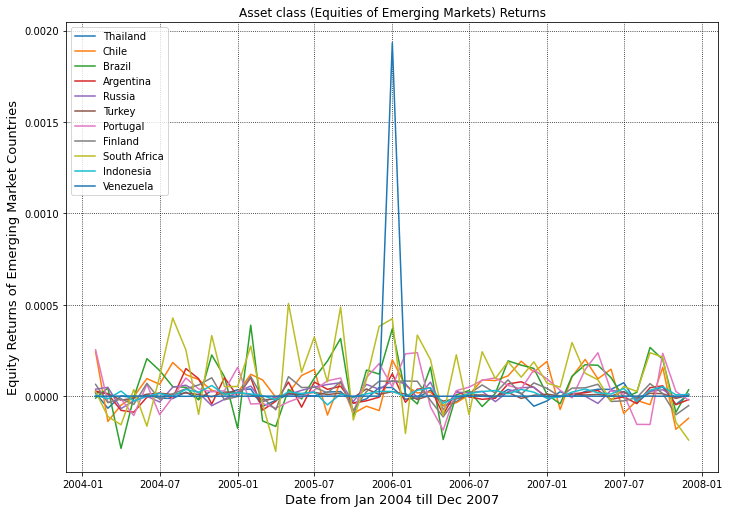

In [112]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(emerg_market_df_2004_2007_2.index, emerg_market_df_2004_2007_2.Thailand_R, label='Thailand')
plt.plot(emerg_market_df_2004_2007_2.index, emerg_market_df_2004_2007_2.Chile_R, label='Chile')
plt.plot(emerg_market_df_2004_2007_2.index, emerg_market_df_2004_2007_2.Brazil_R, label='Brazil')
plt.plot(emerg_market_df_2004_2007_2.index, emerg_market_df_2004_2007_2.Argentina_R, label='Argentina')
plt.plot(emerg_market_df_2004_2007_2.index, emerg_market_df_2004_2007_2.Russia_R, label='Russia')
plt.plot(emerg_market_df_2004_2007_2.index, emerg_market_df_2004_2007_2.Turkey_R, label='Turkey')
plt.plot(emerg_market_df_2004_2007_2.index, emerg_market_df_2004_2007_2.Portugal_R, label='Portugal')
plt.plot(emerg_market_df_2004_2007_2.index, emerg_market_df_2004_2007_2.Finland_R, label='Finland')
plt.plot(emerg_market_df_2004_2007_2.index, emerg_market_df_2004_2007_2.South_Africa_R, label='South Africa')
plt.plot(emerg_market_df_2004_2007_2.index, emerg_market_df_2004_2007_2.Indonesia_R, label='Indonesia')
plt.plot(emerg_market_df_2004_2007_2.index, emerg_market_df_2004_2007_2.Venezuela_R, label='Venezuela')
plt.title('Asset class (Equities of Emerging Markets) Returns')
plt.xlabel('Date from Jan 2004 till Dec 2007', fontsize=13)
plt.ylabel('Equity Returns of Emerging Market Countries', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

In [113]:
# Adding up all the returns of all asset classes for all countries

In [114]:
emerg_market_df_2004_2007_2['Portfolio_R'] = emerg_market_df_2004_2007_2['Thailand_R'] + emerg_market_df_2004_2007_2['Chile_R'] + emerg_market_df_2004_2007_2['Brazil_R'] + emerg_market_df_2004_2007_2['Argentina_R'] + emerg_market_df_2004_2007_2['Russia_R'] + emerg_market_df_2004_2007_2['Turkey_R'] + emerg_market_df_2004_2007_2['Portugal_R'] + emerg_market_df_2004_2007_2['Finland_R'] + emerg_market_df_2004_2007_2['South_Africa_R'] + emerg_market_df_2004_2007_2['Indonesia_R'] + emerg_market_df_2004_2007_2['Venezuela_R']

In [115]:
# Creating a hypothetical $1,000 portfolio and calculate the cumulative performance of the risk parity portfolio.

In [116]:
# Use pandas.DataFrame.cumprod() function to return cumulative product over a dataframe or series axis
emerg_market_df_2004_2007_2['Emerg_Market_Port_Value'] = ((emerg_market_df_2004_2007_2['Portfolio_R'] + 1).cumprod())*1000

In [117]:
emerg_market_df_2004_2007_2[['Thailand_R','Chile_R','Brazil_R','Argentina_R','Russia_R','Turkey_R','Portugal_R',
                             'Finland_R','South_Africa_R','Indonesia_R','Venezuela_R', 'Portfolio_R',
                             'Emerg_Market_Port_Value']].head(5)

,Thailand_R,Chile_R,Brazil_R,Argentina_R,Russia_R,Turkey_R,Portugal_R,Finland_R,South_Africa_R,Indonesia_R,Venezuela_R,Portfolio_R,Emerg_Market_Port_Value
Date,,,,,,,,,,,,,
2004-02-01,1.710373e-05,0.000241,-0.000011,0.000028,3.796281e-05,0.000019,0.000253,0.000064,0.000025,4.622010e-06,-2.240077e-07,0.000680,1000.679985
2004-03-01,-6.617758e-05,-0.000138,0.000044,0.000012,4.819672e-05,0.000014,-0.000034,-0.000036,-0.000112,-1.425054e-05,-2.917855e-07,-0.000282,1000.398276
2004-04-01,9.021319e-07,-0.000049,-0.000286,-0.000078,-6.838161e-05,-0.000022,-0.000015,-0.000015,-0.000156,2.770323e-05,1.461448e-07,-0.000661,999.736821
2004-05-01,-7.525573e-06,-0.000003,-0.000008,-0.000088,-2.498159e-05,-0.000011,-0.000106,-0.000045,0.000036,-2.773775e-05,4.964259e-07,-0.000285,999.452297
2004-06-01,5.990687e-06,0.000096,0.000205,-0.000006,-5.564438e-07,0.000011,0.000065,0.000070,-0.000164,-6.995031e-08,8.798053e-08,0.000283,999.734775


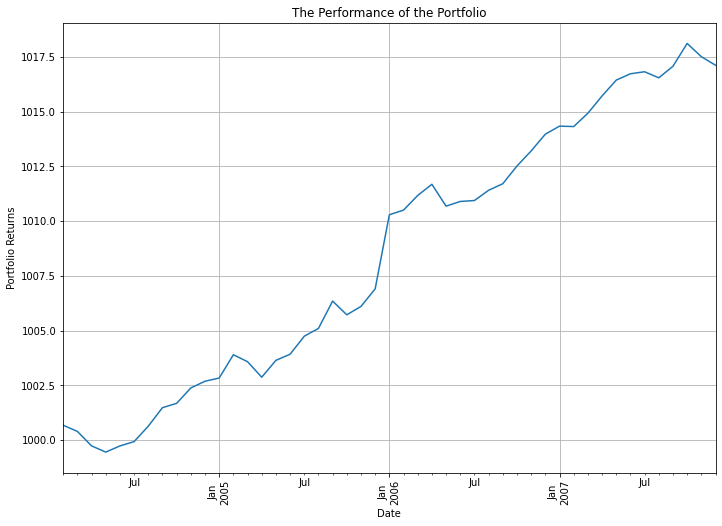

In [118]:
plt.figure(figsize=[ 11.69, 8.27])
plt.title('The Performance of the Portfolio')
plt.xlabel('Date')
plt.ylabel('Portfolio Returns')
emerg_market_df_2004_2007_2['Emerg_Market_Port_Value'].plot(grid=True)
plt.xticks(rotation=90)
plt.show();

In [119]:
# Calculate the Maximum Drawdown (MDD) of the Portfolio Value
(emerg_market_df_2004_2007_2.Emerg_Market_Port_Value.max() - emerg_market_df_2004_2007_2.Emerg_Market_Port_Value.min()) / emerg_market_df_2004_2007_2.Emerg_Market_Port_Value.max()

0.018330178332485916

In [120]:
# Calculate the cumulative return of the portfolio
cumulative_return = 100 * (emerg_market_df_2004_2007_2['Emerg_Market_Port_Value'][-1] / emerg_market_df_2004_2007_2['Emerg_Market_Port_Value'][0] - 1)
print("The Cumulative Return of the Portfolio is {:.2f}%".format(cumulative_return))

The Cumulative Return of the Portfolio is 1.64%


**The Sharpe Ratio**

- The sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
- The Risk-Free Rate could by a U.S. Treasury Rate (A 10 year US Treasury rate is at 1.64%)

In [123]:
# use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element.
emerg_market_df_2004_2007_2['Monthly_Return'] = emerg_market_df_2004_2007_2['Emerg_Market_Port_Value'].pct_change(1)

In [124]:
# Calcualte the Sharpe Ratio
Sharpe_Ratio = emerg_market_df_2004_2007_2['Monthly_Return'].mean() / emerg_market_df_2004_2007_2['Monthly_Return'].std()
Sharpe_Ratio

0.5153623412535956

In [125]:
# Annualize the Sharpe Ratio, since I calculate it from monthly values.
# There are twelve months in the year, so to annualize it, multiply the Sharpe Ratio by the square root of 12
Annualized_Sharpe_Ratio = Sharpe_Ratio * np.sqrt(46)
Annualized_Sharpe_Ratio

3.4953574592578978

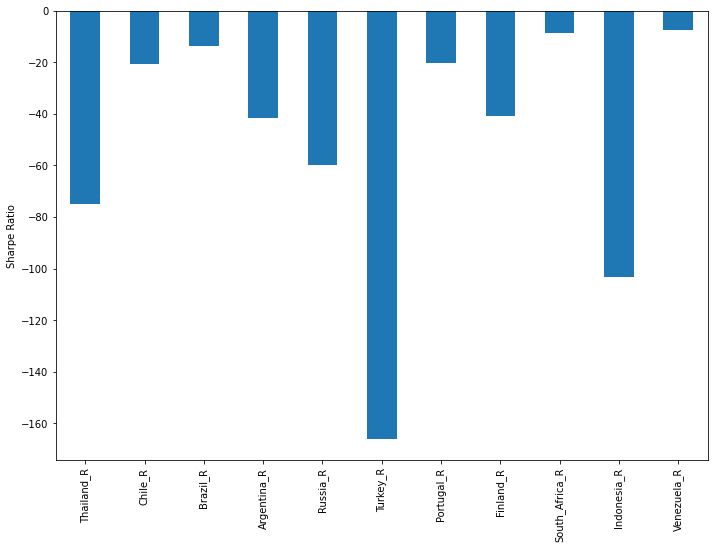

In [126]:
# Calcualte the Sharpe Ratio for equity portfolio
def emerg_market_sharpe_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

return_series = emerg_market_df_2004_2007_2[['Thailand_R','Chile_R','Brazil_R','Argentina_R','Russia_R','Turkey_R','Portugal_R',
                   'Finland_R','South_Africa_R','Indonesia_R','Venezuela_R']]
rf = .0164 # Risk Free Rate
n = 46 # 46 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
emerg_market_sharpes = emerg_market_df_2004_2007_2[['Thailand_R','Chile_R','Brazil_R','Argentina_R','Russia_R','Turkey_R','Portugal_R',
                   'Finland_R','South_Africa_R','Indonesia_R','Venezuela_R']].apply(emerg_market_sharpe_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sharpe Ratio')
emerg_market_sharpes.plot.bar();  

**The Sortino Ratio**

- The Sortino ratio is a variation of the Sharpe ratio that differentiates harmful volatility from total overall volatility by using the asset's standard deviation of negative portfolio returns—downside deviation—instead of the total standard deviation of portfolio returns. 
- The Sortino ratio takes an asset or portfolio's return and subtracts the risk-free rate, and then divides that amount by the asset's downside deviation. The ratio was named after Frank A. Sortino.
- The Sortino ratio = Portfolio Return - Target Return / Downside Risk

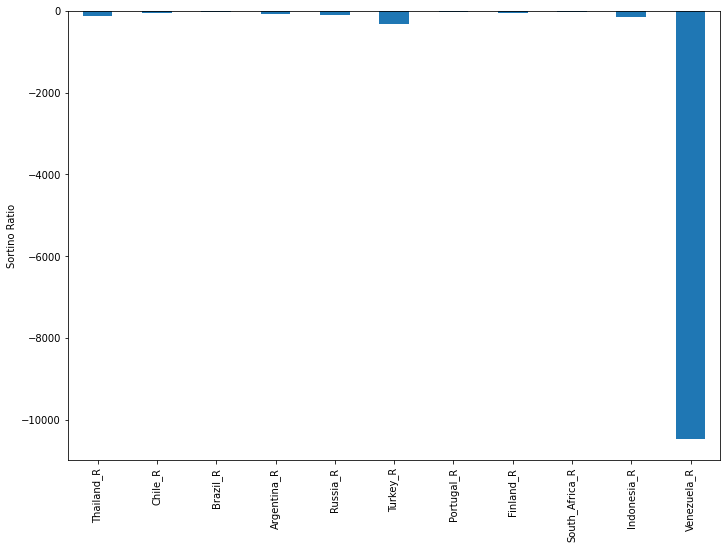

In [127]:
# Calcualte the Sortino Ratio for equity portfolio
def emerg_market_sortino_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

return_series = emerg_market_df_2004_2007_2[['Thailand_R','Chile_R','Brazil_R','Argentina_R','Russia_R','Turkey_R','Portugal_R',
                   'Finland_R','South_Africa_R','Indonesia_R','Venezuela_R']]
rf = .0164 # Risk Free Rate
n = 46 # 46 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
emerg_market_sortinos = emerg_market_df_2004_2007_2[['Thailand_R','Chile_R','Brazil_R','Argentina_R','Russia_R','Turkey_R',
                                                     'Portugal_R','Finland_R','South_Africa_R','Indonesia_R',
                                                     'Venezuela_R']].apply(emerg_market_sortino_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sortino Ratio')
emerg_market_sortinos.plot.bar();   

**Maximum Drawdown (MDD)**

- A maximum drawdown (MDD) is the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained. Maximum drawdown is an indicator of downside risk over a specified time period.
- The formula for Maximum Drawdown is MDD = (Trough Value - Peak Value) /Peak Value.

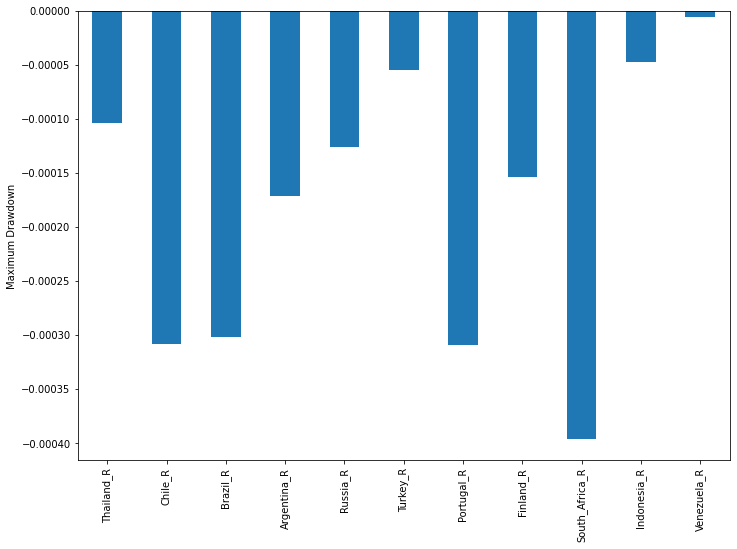

In [128]:
# Calcualte the Maximum Drawdown (MDD) for bond portfolio
def emerg_market_MDD(return_series):
    comp_ret = (return_series + 1).cumprod()
    # Use pandas.DataFrame.expanding() function to provide expanding transformations
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret / peak) - 1
    return dd.min()

return_series = emerg_market_df_2004_2007_2[['Thailand_R','Chile_R','Brazil_R','Argentina_R','Russia_R','Turkey_R','Portugal_R',
                   'Finland_R','South_Africa_R','Indonesia_R','Venezuela_R']]

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
emerg_market_max_drawdown = emerg_market_df_2004_2007_2[['Thailand_R','Chile_R','Brazil_R','Argentina_R','Russia_R','Turkey_R','Portugal_R',
                   'Finland_R','South_Africa_R','Indonesia_R','Venezuela_R']].apply(emerg_market_MDD, axis=0)
plt.ylabel('Maximum Drawdown')
emerg_market_max_drawdown.plot.bar();   

**Conclusion**

- Applying the risk parity portfolio strategy from Jan 2004 till December 2007.
- Target volatility 9 %.
- Maximum Drawdown 91 %.
- Cumulative return of the o=portfolio 720.09%
- Sharpe Ratio 5.36%.

In [129]:
# Dataset (Commodity.csv) from Master Equity Portfolio Excel file
# Dataset includes: Gold, WTI (West Texas Intermediate Crude Oil), Heat Oil, Natural Gas, Silver, US Coffee,
# US Corn, Wheat, Copper, Platinum, and Cocoa

# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
commodity_df_2004_2007 = pd.read_csv('Commodity_2004_2007.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(commodity_df_2004_2007.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
commodity_df_2004_2007.head()

(48, 12)


,Date,Gold,WTI,Heat_Oil,Natural_Gas,Silver,US_Coffee,US_Corn,Wheat,Copper,Platinum,Cocoa
0,1/1/2004,402.2,33.05,1.70,5397,6246,75.50,276.25,389.00,11430,894.0,3132
1,2/1/2004,396.4,36.16,1.75,5416,6696,75.05,296.25,380.75,13430,835.2,3239
2,3/1/2004,427.3,35.76,1.72,5933,7936,73.75,320.00,408.00,13590,988.8,3148
3,4/1/2004,387.0,37.38,1.71,5862,5867,67.15,316.50,381.50,12100,909.7,3040
4,5/1/2004,394.0,39.88,1.87,6442,6105,85.55,304.00,362.00,12780,1010.1,3055


In [130]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
commodity_df_2004_2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         48 non-null     object 
 1   Gold         48 non-null     float64
 2   WTI          48 non-null     float64
 3   Heat_Oil     48 non-null     float64
 4   Natural_Gas  48 non-null     int64  
 5   Silver       48 non-null     int64  
 6   US_Coffee    48 non-null     float64
 7   US_Corn      48 non-null     float64
 8   Wheat        48 non-null     float64
 9   Copper       48 non-null     int64  
 10  Platinum     48 non-null     float64
 11  Cocoa        48 non-null     int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 4.6+ KB


In [131]:
# Use pandas.to_datetime() function to convert argument to datetime
commodity_df_2004_2007['Date'] = pd.to_datetime(commodity_df_2004_2007.Date)

In [132]:
# Use pandas.DataFrame.astype() function to casta pandas object to a specified data type
commodity_df_2004_2007['Natural_Gas'] = commodity_df_2004_2007['Natural_Gas'].astype(float)
commodity_df_2004_2007['Silver'] = commodity_df_2004_2007['Silver'].astype(float)
commodity_df_2004_2007['Copper'] = commodity_df_2004_2007['Copper'].astype(float)
commodity_df_2004_2007['Cocoa'] = commodity_df_2004_2007['Cocoa'].astype(float)

In [133]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
commodity_df_2004_2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         48 non-null     datetime64[ns]
 1   Gold         48 non-null     float64       
 2   WTI          48 non-null     float64       
 3   Heat_Oil     48 non-null     float64       
 4   Natural_Gas  48 non-null     float64       
 5   Silver       48 non-null     float64       
 6   US_Coffee    48 non-null     float64       
 7   US_Corn      48 non-null     float64       
 8   Wheat        48 non-null     float64       
 9   Copper       48 non-null     float64       
 10  Platinum     48 non-null     float64       
 11  Cocoa        48 non-null     float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 4.6 KB


In [134]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
commodity_df_2004_2007.set_index('Date',inplace=True)

In [135]:
# Use pandas.DataFrame.isnull() method to detect the Null values or missing values.
commodity_df_2004_2007.isnull().any()

Gold           False
WTI            False
Heat_Oil       False
Natural_Gas    False
Silver         False
US_Coffee      False
US_Corn        False
Wheat          False
Copper         False
Platinum       False
Cocoa          False
dtype: bool

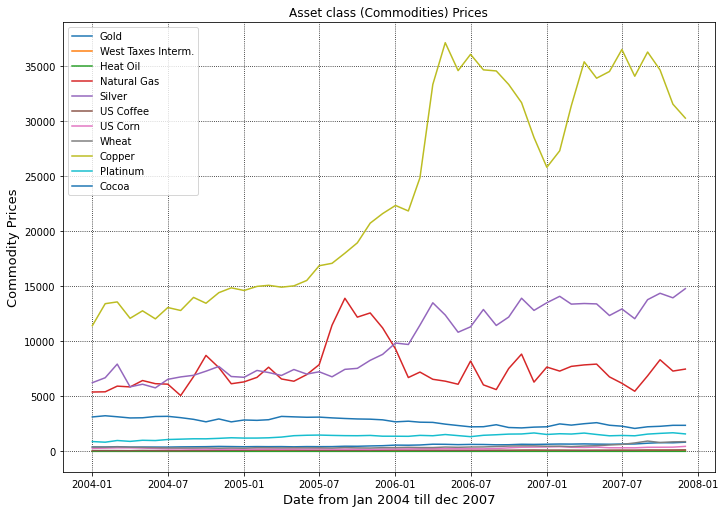

In [136]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(commodity_df_2004_2007.index, commodity_df_2004_2007.Gold, label='Gold')
plt.plot(commodity_df_2004_2007.index, commodity_df_2004_2007.WTI, label='West Taxes Interm.')
plt.plot(commodity_df_2004_2007.index, commodity_df_2004_2007.Heat_Oil, label='Heat Oil')
plt.plot(commodity_df_2004_2007.index, commodity_df_2004_2007.Natural_Gas, label='Natural Gas')
plt.plot(commodity_df_2004_2007.index, commodity_df_2004_2007.Silver, label='Silver')
plt.plot(commodity_df_2004_2007.index, commodity_df_2004_2007.US_Coffee, label='US Coffee')
plt.plot(commodity_df_2004_2007.index, commodity_df_2004_2007.US_Corn, label='US Corn')
plt.plot(commodity_df_2004_2007.index, commodity_df_2004_2007.Wheat, label='Wheat')
plt.plot(commodity_df_2004_2007.index, commodity_df_2004_2007.Copper, label='Copper')
plt.plot(commodity_df_2004_2007.index, commodity_df_2004_2007.Platinum, label='Platinum')
plt.plot(commodity_df_2004_2007.index, commodity_df_2004_2007.Cocoa, label='Cocoa')
plt.title('Asset class (Commodities) Prices')
plt.xlabel('Date from Jan 2004 till dec 2007', fontsize=13)
plt.ylabel('Commodity Prices', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

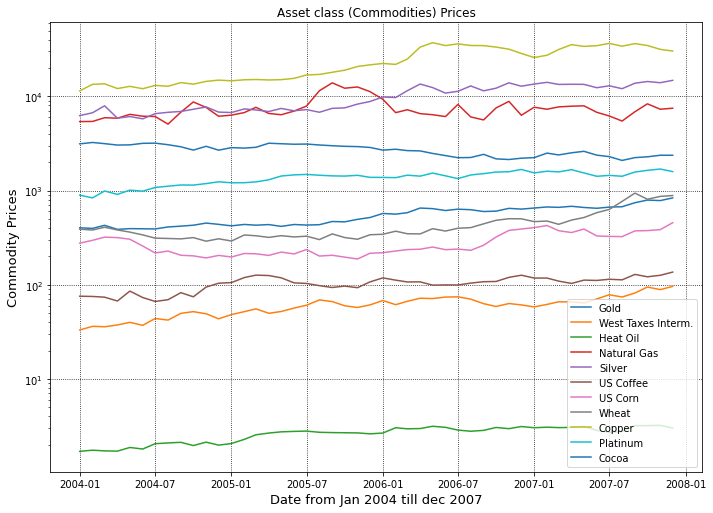

In [137]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(commodity_df_2004_2007.index, commodity_df_2004_2007.Gold, label='Gold')
plt.plot(commodity_df_2004_2007.index, commodity_df_2004_2007.WTI, label='West Taxes Interm.')
plt.plot(commodity_df_2004_2007.index, commodity_df_2004_2007.Heat_Oil, label='Heat Oil')
plt.plot(commodity_df_2004_2007.index, commodity_df_2004_2007.Natural_Gas, label='Natural Gas')
plt.plot(commodity_df_2004_2007.index, commodity_df_2004_2007.Silver, label='Silver')
plt.plot(commodity_df_2004_2007.index, commodity_df_2004_2007.US_Coffee, label='US Coffee')
plt.plot(commodity_df_2004_2007.index, commodity_df_2004_2007.US_Corn, label='US Corn')
plt.plot(commodity_df_2004_2007.index, commodity_df_2004_2007.Wheat, label='Wheat')
plt.plot(commodity_df_2004_2007.index, commodity_df_2004_2007.Copper, label='Copper')
plt.plot(commodity_df_2004_2007.index, commodity_df_2004_2007.Platinum, label='Platinum')
plt.plot(commodity_df_2004_2007.index, commodity_df_2004_2007.Cocoa, label='Cocoa')
plt.title('Asset class (Commodities) Prices')
plt.xlabel('Date from Jan 2004 till dec 2007', fontsize=13)
plt.ylabel('Commodity Prices', fontsize=13)
plt.yscale('log')
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=4);

**The Price Rate of Change (ROC)**

- To get the percentage change for each bond price of each country on a monthly basis, I will use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element, and call it on the entire DataFrame.

In [138]:
# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
commodity_df_2004_2007 = commodity_df_2004_2007[['Gold','WTI','Heat_Oil','Natural_Gas','Silver','US_Coffee',
                                                 'US_Corn','Wheat','Copper','Platinum','Cocoa']].pct_change()
commodity_df_2004_2007.head(5)

,Gold,WTI,Heat_Oil,Natural_Gas,Silver,US_Coffee,US_Corn,Wheat,Copper,Platinum,Cocoa
Date,,,,,,,,,,,
2004-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-02-01,-0.014421,0.094100,0.029412,0.003520,0.072046,-0.005960,0.072398,-0.021208,0.174978,-0.065772,0.034163
2004-03-01,0.077952,-0.011062,-0.017143,0.095458,0.185185,-0.017322,0.080169,0.071569,0.011914,0.183908,-0.028095
2004-04-01,-0.094313,0.045302,-0.005814,-0.011967,-0.260711,-0.089492,-0.010938,-0.064951,-0.109639,-0.079996,-0.034307
2004-05-01,0.018088,0.066881,0.093567,0.098942,0.040566,0.274013,-0.039494,-0.051114,0.056198,0.110366,0.004934


In [139]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows (the first row)
commodity_df_2004_2007.dropna(axis=0, inplace=True)
commodity_df_2004_2007.head(5)

,Gold,WTI,Heat_Oil,Natural_Gas,Silver,US_Coffee,US_Corn,Wheat,Copper,Platinum,Cocoa
Date,,,,,,,,,,,
2004-02-01,-0.014421,0.094100,0.029412,0.003520,0.072046,-0.005960,0.072398,-0.021208,0.174978,-0.065772,0.034163
2004-03-01,0.077952,-0.011062,-0.017143,0.095458,0.185185,-0.017322,0.080169,0.071569,0.011914,0.183908,-0.028095
2004-04-01,-0.094313,0.045302,-0.005814,-0.011967,-0.260711,-0.089492,-0.010938,-0.064951,-0.109639,-0.079996,-0.034307
2004-05-01,0.018088,0.066881,0.093567,0.098942,0.040566,0.274013,-0.039494,-0.051114,0.056198,0.110366,0.004934
2004-06-01,-0.003553,-0.070963,-0.037433,-0.044551,-0.053890,-0.145529,-0.152961,-0.066298,-0.057121,-0.024849,0.038298


In [140]:
print('There are {} rows in the DataFrame'.format(commodity_df_2004_2007.shape[0]))

There are 47 rows in the DataFrame


In [141]:
# Use pandas.DataFrame.copy() function to make a copy of commodity_df
commodity_df_2004_2007_2 = commodity_df_2004_2007.copy()

**Volatility**

- Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. However, volatility is often measured as either the standard deviation or variance between returns from that same security or market index.
- Volatility is a measure of the price fluctuations of an asset or portfolio.

**Annualizing Volatility**

- To Calculate the annualizing volatility, I will multiply the monthly standard deviation by the square root of number of months.

In [142]:
vol_com_df_2004_2007 = commodity_df_2004_2007

In [143]:
vol_com_df_2004_2007.shape[0]

47

In [144]:
# Calculate the volatility (the price fluctuation of assets od the protfolio)

# Use pandas.DataFrame.rolling() function to provide rolling window calculation
# Use numpy.std() function to compute the standard deviation along the specified axis
# Use Python math sqrt() function to return the square root of any number

vol_com_df_2004_2007['Gold_Vol'] = vol_com_df_2004_2007['Gold'].rolling(47).std() * math.sqrt(47)
vol_com_df_2004_2007['WTI_Vol'] = vol_com_df_2004_2007['WTI'].rolling(47).std() * math.sqrt(47)
vol_com_df_2004_2007['Heat_Oil_Vol'] = vol_com_df_2004_2007['Heat_Oil'].rolling(47).std() * math.sqrt(47)
vol_com_df_2004_2007['Natural_Gas_Vol'] = vol_com_df_2004_2007['Natural_Gas'].rolling(47).std() * math.sqrt(47)
vol_com_df_2004_2007['Silver_Vol'] = vol_com_df_2004_2007['Silver'].rolling(47).std() * math.sqrt(47)
vol_com_df_2004_2007['US_Coffee_Vol'] = vol_com_df_2004_2007['US_Coffee'].rolling(47).std() * math.sqrt(47)
vol_com_df_2004_2007['US_Corn_Vol'] = vol_com_df_2004_2007['US_Corn'].rolling(47).std() * math.sqrt(47)
vol_com_df_2004_2007['Wheat_Vol'] = vol_com_df_2004_2007['Wheat'].rolling(47).std() * math.sqrt(47)
vol_com_df_2004_2007['Copper_Vol'] = vol_com_df_2004_2007['Copper'].rolling(47).std() * math.sqrt(47)
vol_com_df_2004_2007['Platinum_Vol'] = vol_com_df_2004_2007['Platinum'].rolling(47).std() * math.sqrt(47)
vol_com_df_2004_2007['Cocoa_Vol'] = vol_com_df_2004_2007['Cocoa'].rolling(47).std() * math.sqrt(47)

In [145]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
vol_com_df_2004_2007.dropna(axis=0, inplace=True)

In [146]:
vol_com_df_2004_2007[['Gold_Vol','WTI_Vol','Heat_Oil_Vol','Natural_Gas_Vol','Silver_Vol','US_Coffee_Vol','US_Corn_Vol',
                      'Wheat_Vol','Copper_Vol','Platinum_Vol','Cocoa_Vol']]

,Gold_Vol,WTI_Vol,Heat_Oil_Vol,Natural_Gas_Vol,Silver_Vol,US_Coffee_Vol,US_Corn_Vol,Wheat_Vol,Copper_Vol,Platinum_Vol,Cocoa_Vol
Date,,,,,,,,,,,
2007-12-01,0.306134,0.554422,0.394152,1.194513,0.630244,0.630225,0.61633,0.577043,0.571878,0.401136,0.358956


**Risk Parity Portfolio (RP):**

- Risk parity portfolio is an investment allocation strategy which focuses on the allocation of risk, rather than the allocation of capital.

- A Risky Parity Portfolio, also known as equal risk contribution portfolio (ERC) is an inverse volatility weighted portfolio if all pairwise correlations are equal, in other words, which individual assets, in the case of equity and bond, have equal risk contribution to the portfolio risk.

- However, Risk Parity portfolio was coined by Edward Qian (2015) when he examined the unbalanced risk allocation of traditional 60/40 allocation portfolios of bonds and stocks.

- Risk parity is a portfolio allocation strategy that uses risk to determine allocations across various components of an investment portfolio. The risk parity strategy modifies the modern portfolio theory (MPT) approach to investing through the use of leverage.

- A challenge with RP is that asset classes may carry some degree of risk exposure coming from other asset classes. The key point is that RP portfolio should hold balanced risk allocation between the economic risk factors such as, growth and inflation risk that are the major drivers of portfolio returns.

In [147]:
# With Risk Parity Strategy, I will target a specific level of risk or return,
# and divide the risk equally across all asset classes
volatility_com = (0.306134+0.554422+0.394152+1.194513+0.630244+0.630225+0.61633+0.577043+0.571878+0.401136+0.358956) / 11
volatility_com

0.5668211818181818

In [148]:
# Set the annualized volatility target divide by six asset clases for the portfolio with Risk Parity
commodity_target_vol = 0.5668211818181818 / 11
commodity_target_vol

0.05152919834710743

In [149]:
# Create a new dataframe called commodity_portfolio_df which calculates the allocation to each asset class 
port_com_df_2004_2007 = commodity_df_2004_2007

In [150]:
port_com_df_2004_2007['Gold_Alloc'] = commodity_target_vol / vol_com_df_2004_2007['Gold_Vol']
port_com_df_2004_2007['WTI_Alloc'] = commodity_target_vol / vol_com_df_2004_2007['WTI_Vol']
port_com_df_2004_2007['Heat_Oil_Alloc'] = commodity_target_vol / vol_com_df_2004_2007['Heat_Oil_Vol']
port_com_df_2004_2007['Natural_Gas_Alloc'] = commodity_target_vol / vol_com_df_2004_2007['Natural_Gas_Vol']
port_com_df_2004_2007['Silver_Alloc'] = commodity_target_vol / vol_com_df_2004_2007['Silver_Vol']
port_com_df_2004_2007['US_Coffee_Alloc'] = commodity_target_vol / vol_com_df_2004_2007['US_Coffee_Vol']
port_com_df_2004_2007['US_Corn_Alloc'] = commodity_target_vol / vol_com_df_2004_2007['US_Corn_Vol']
port_com_df_2004_2007['Wheat_Alloc'] = commodity_target_vol / vol_com_df_2004_2007['Wheat_Vol']
port_com_df_2004_2007['Copper_Alloc'] = commodity_target_vol / vol_com_df_2004_2007['Copper_Vol']
port_com_df_2004_2007['Platinum_Alloc'] = commodity_target_vol / vol_com_df_2004_2007['Platinum_Vol']
port_com_df_2004_2007['Cocoa_Alloc'] = commodity_target_vol / vol_com_df_2004_2007['Cocoa_Vol']

In [151]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
port_com_df_2004_2007.dropna(axis=0, inplace=True)

In [152]:
port_com_df_2004_2007[['Gold_Alloc','WTI_Alloc','Heat_Oil_Alloc','Natural_Gas_Alloc','Silver_Alloc',
                        'US_Coffee_Alloc','US_Corn_Alloc','Wheat_Alloc','Copper_Alloc','Platinum_Alloc','Cocoa_Alloc']]

,Gold_Alloc,WTI_Alloc,Heat_Oil_Alloc,Natural_Gas_Alloc,Silver_Alloc,US_Coffee_Alloc,US_Corn_Alloc,Wheat_Alloc,Copper_Alloc,Platinum_Alloc,Cocoa_Alloc
Date,,,,,,,,,,,
2007-12-01,0.168322,0.092942,0.130734,0.043138,0.081761,0.081763,0.083607,0.089299,0.090105,0.128458,0.143553


In [153]:
# I will multiply the monthly commodity prices by the allocation percentage,
# in order to get the return for each portion of the portfolio (Commodity)

In [154]:
commodity_df_2004_2007_2['Gold_R'] = commodity_df_2004_2007_2['Gold'] * 0.168322
commodity_df_2004_2007_2['WTI_R'] = commodity_df_2004_2007_2['WTI'] * 0.092942
commodity_df_2004_2007_2['Heat_Oil_R'] = commodity_df_2004_2007_2['Heat_Oil'] * 0.130734
commodity_df_2004_2007_2['Natural_Gas_R'] = commodity_df_2004_2007_2['Natural_Gas'] * 0.043138
commodity_df_2004_2007_2['Silver_R'] = commodity_df_2004_2007_2['Silver'] * 0.081761
commodity_df_2004_2007_2['US_Coffee_R'] = commodity_df_2004_2007_2['US_Coffee'] * 0.081763
commodity_df_2004_2007_2['US_Corn_R'] = commodity_df_2004_2007_2['US_Corn'] * 0.083607
commodity_df_2004_2007_2['Wheat_R'] = commodity_df_2004_2007_2['Wheat'] * 0.089299
commodity_df_2004_2007_2['Copper_R'] = commodity_df_2004_2007_2['Copper'] * 0.090105
commodity_df_2004_2007_2['Platinum_R'] = commodity_df_2004_2007_2['Platinum'] * 0.128458
commodity_df_2004_2007_2['Cocoa_R'] = commodity_df_2004_2007_2['Cocoa'] * 0.143553

In [155]:
commodity_df_2004_2007_2.head(5)

,Gold,WTI,Heat_Oil,Natural_Gas,Silver,US_Coffee,US_Corn,Wheat,Copper,Platinum,...,WTI_R,Heat_Oil_R,Natural_Gas_R,Silver_R,US_Coffee_R,US_Corn_R,Wheat_R,Copper_R,Platinum_R,Cocoa_R
Date,,,,,,,,,,,,,,,,,,,,,
2004-02-01,-0.014421,0.094100,0.029412,0.003520,0.072046,-0.005960,0.072398,-0.021208,0.174978,-0.065772,...,0.008746,0.003845,0.000152,0.005891,-0.000487,0.006053,-0.001894,0.015766,-0.008449,0.004904
2004-03-01,0.077952,-0.011062,-0.017143,0.095458,0.185185,-0.017322,0.080169,0.071569,0.011914,0.183908,...,-0.001028,-0.002241,0.004118,0.015141,-0.001416,0.006703,0.006391,0.001073,0.023624,-0.004033
2004-04-01,-0.094313,0.045302,-0.005814,-0.011967,-0.260711,-0.089492,-0.010938,-0.064951,-0.109639,-0.079996,...,0.004210,-0.000760,-0.000516,-0.021316,-0.007317,-0.000914,-0.005800,-0.009879,-0.010276,-0.004925
2004-05-01,0.018088,0.066881,0.093567,0.098942,0.040566,0.274013,-0.039494,-0.051114,0.056198,0.110366,...,0.006216,0.012232,0.004268,0.003317,0.022404,-0.003302,-0.004564,0.005064,0.014177,0.000708
2004-06-01,-0.003553,-0.070963,-0.037433,-0.044551,-0.053890,-0.145529,-0.152961,-0.066298,-0.057121,-0.024849,...,-0.006595,-0.004894,-0.001922,-0.004406,-0.011899,-0.012789,-0.005920,-0.005147,-0.003192,0.005498


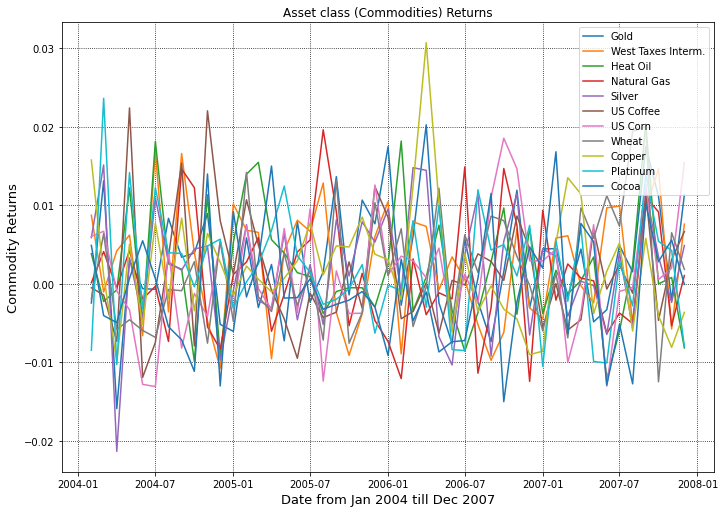

In [156]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(commodity_df_2004_2007_2.index, commodity_df_2004_2007_2.Gold_R, label='Gold')
plt.plot(commodity_df_2004_2007_2.index, commodity_df_2004_2007_2.WTI_R, label='West Taxes Interm.')
plt.plot(commodity_df_2004_2007_2.index, commodity_df_2004_2007_2.Heat_Oil_R, label='Heat Oil')
plt.plot(commodity_df_2004_2007_2.index, commodity_df_2004_2007_2.Natural_Gas_R, label='Natural Gas')
plt.plot(commodity_df_2004_2007_2.index, commodity_df_2004_2007_2.Silver_R, label='Silver')
plt.plot(commodity_df_2004_2007_2.index, commodity_df_2004_2007_2.US_Coffee_R, label='US Coffee')
plt.plot(commodity_df_2004_2007_2.index, commodity_df_2004_2007_2.US_Corn_R, label='US Corn')
plt.plot(commodity_df_2004_2007_2.index, commodity_df_2004_2007_2.Wheat_R, label='Wheat')
plt.plot(commodity_df_2004_2007_2.index, commodity_df_2004_2007_2.Copper_R, label='Copper')
plt.plot(commodity_df_2004_2007_2.index, commodity_df_2004_2007_2.Platinum_R, label='Platinum')
plt.plot(commodity_df_2004_2007_2.index, commodity_df_2004_2007_2.Cocoa_R, label='Cocoa')
plt.title('Asset class (Commodities) Returns')
plt.xlabel('Date from Jan 2004 till Dec 2007', fontsize=13)
plt.ylabel('Commodity Returns', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=1);

In [157]:
# Adding up all the returns of all asset classes for all commodities

In [158]:
commodity_df_2004_2007_2['Portfolio_R'] = commodity_df_2004_2007_2['Gold_R'] + commodity_df_2004_2007_2['WTI_R'] + commodity_df_2004_2007_2['Heat_Oil_R'] + commodity_df_2004_2007_2['Natural_Gas_R'] + commodity_df_2004_2007_2['Silver_R'] + commodity_df_2004_2007_2['US_Coffee_R'] + commodity_df_2004_2007_2['US_Corn_R'] + commodity_df_2004_2007_2['Wheat_R'] + commodity_df_2004_2007_2['Copper_R'] + commodity_df_2004_2007_2['Platinum_R'] + commodity_df_2004_2007_2['Cocoa_R']

In [159]:
# Creating a hypothetical $1,000 portfolio and calculate the cumulative performance of the risk parity portfolio.

In [160]:
# Use pandas.DataFrame.cumprod() function to return cumulative product over a dataframe or series axis
commodity_df_2004_2007_2['Commodity_Port_Value'] = ((commodity_df_2004_2007_2['Portfolio_R'] + 1).cumprod())*1000

In [161]:
commodity_df_2004_2007_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
                          'Wheat_R','Copper_R','Platinum_R','Cocoa_R','Portfolio_R', 'Commodity_Port_Value']].head(5)

,Gold_R,WTI_R,Heat_Oil_R,Natural_Gas_R,Silver_R,US_Coffee_R,US_Corn_R,Wheat_R,Copper_R,Platinum_R,Cocoa_R,Portfolio_R,Commodity_Port_Value
Date,,,,,,,,,,,,,
2004-02-01,-0.002427,0.008746,0.003845,0.000152,0.005891,-0.000487,0.006053,-0.001894,0.015766,-0.008449,0.004904,0.032100,1032.099606
2004-03-01,0.013121,-0.001028,-0.002241,0.004118,0.015141,-0.001416,0.006703,0.006391,0.001073,0.023624,-0.004033,0.061453,1095.524950
2004-04-01,-0.015875,0.004210,-0.000760,-0.000516,-0.021316,-0.007317,-0.000914,-0.005800,-0.009879,-0.010276,-0.004925,-0.073369,1015.147901
2004-05-01,0.003045,0.006216,0.012232,0.004268,0.003317,0.022404,-0.003302,-0.004564,0.005064,0.014177,0.000708,0.063565,1079.675877
2004-06-01,-0.000598,-0.006595,-0.004894,-0.001922,-0.004406,-0.011899,-0.012789,-0.005920,-0.005147,-0.003192,0.005498,-0.051864,1023.679299


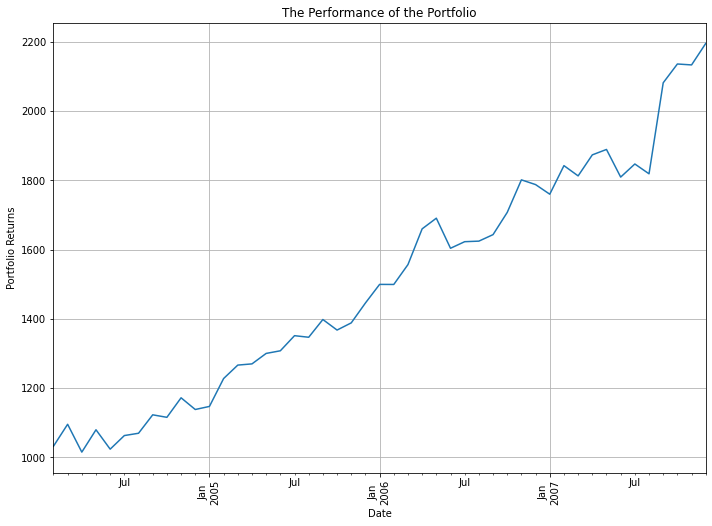

In [162]:
plt.figure(figsize=[ 11.69, 8.27])
plt.title('The Performance of the Portfolio')
plt.xlabel('Date')
plt.ylabel('Portfolio Returns')
commodity_df_2004_2007_2['Commodity_Port_Value'].plot(grid=True)
plt.xticks(rotation=90)
plt.show();

In [163]:
# Calculate the Maximum Drawdown (MDD) of the Portfolio Value
(commodity_df_2004_2007_2.Commodity_Port_Value.max() - commodity_df_2004_2007_2.Commodity_Port_Value.min()) / commodity_df_2004_2007_2.Commodity_Port_Value.max()

0.5375645448133122

In [164]:
# Calculate the cumulative return of the portfolio
cumulative_return = 100 * (commodity_df_2004_2007_2['Commodity_Port_Value'][-1] / commodity_df_2004_2007_2['Commodity_Port_Value'][0] - 1)
print("The Cumulative Return of the Portfolio is {:.2f}%".format(cumulative_return))

The Cumulative Return of the Portfolio is 112.69%


**The Sharpe Ratio**

- The sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
- The Risk-Free Rate could by a U.S. Treasury Rate (A 10 year US Treasury rate is at 1.64%)

In [165]:
# use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element.
commodity_df_2004_2007_2['Monthly_Return'] = commodity_df_2004_2007_2['Commodity_Port_Value'].pct_change(1)

In [166]:
# Calcualte the Sharpe Ratio
Sharpe_Ratio = commodity_df_2004_2007_2['Monthly_Return'].mean() / commodity_df_2004_2007_2['Monthly_Return'].std()
Sharpe_Ratio

0.45312945214623523

In [167]:
# Annualize the Sharpe Ratio, since I calculate it from monthly values.
# There are twelve months in the year, so to annualize it, multiply the Sharpe Ratio by the square root of 12
Annualized_Sharpe_Ratio = Sharpe_Ratio * np.sqrt(47)
Annualized_Sharpe_Ratio

3.106499013183542

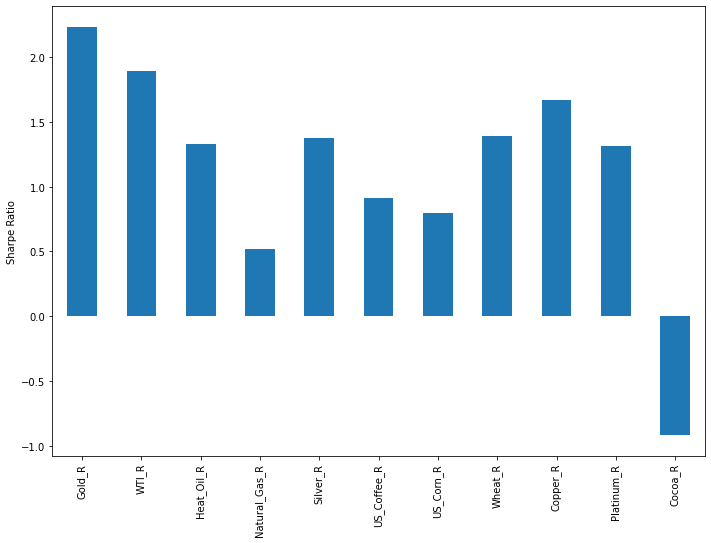

In [168]:
# Calcualte the Sharpe Ratio for commodity portfolio
def commodity_sharpe_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

return_series = commodity_df_2004_2007_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
               'Wheat_R','Copper_R','Platinum_R','Cocoa_R']]
rf = .0164 # Risk Free Rate
n = 47 # 47 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
commodity_sharpes = commodity_df_2004_2007_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
               'Wheat_R','Copper_R','Platinum_R','Cocoa_R']].apply(commodity_sharpe_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sharpe Ratio')
commodity_sharpes.plot.bar(); 

**The Sortino Ratio**

- The Sortino ratio is a variation of the Sharpe ratio that differentiates harmful volatility from total overall volatility by using the asset's standard deviation of negative portfolio returns—downside deviation—instead of the total standard deviation of portfolio returns. 
- The Sortino ratio takes an asset or portfolio's return and subtracts the risk-free rate, and then divides that amount by the asset's downside deviation. The ratio was named after Frank A. Sortino.
- The Sortino ratio = Portfolio Return - Target Return / Downside Risk

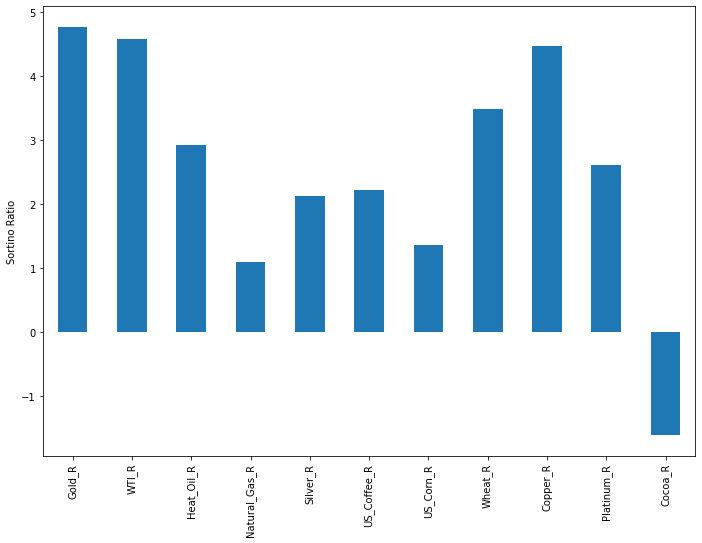

In [169]:
# Calcualte the Sortino Ratio for commodity portfolio
def commodity_sortino_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

return_series = commodity_df_2004_2007_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
               'Wheat_R','Copper_R','Platinum_R','Cocoa_R']]
rf = .0164 # Risk Free Rate
n = 47 # 47 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
commodity_sortinos = commodity_df_2004_2007_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
               'Wheat_R','Copper_R','Platinum_R','Cocoa_R']].apply(commodity_sortino_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sortino Ratio')
commodity_sortinos.plot.bar(); 

**Maximum Drawdown (MDD)**

- A maximum drawdown (MDD) is the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained. Maximum drawdown is an indicator of downside risk over a specified time period.
- The formula for Maximum Drawdown is MDD = (Trough Value - Peak Value) /Peak Value.

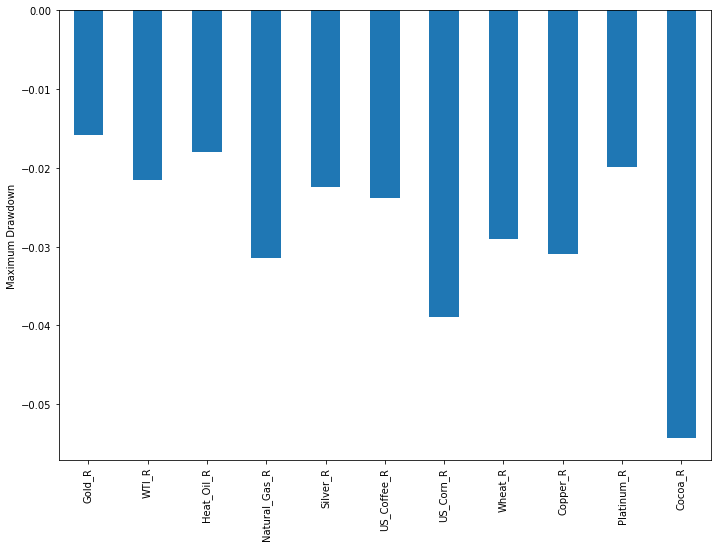

In [170]:
# Calcualte the Maximum Drawdown (MDD) for commodity portfolio
def commodity_MDD(return_series):
    comp_ret = (return_series + 1).cumprod()
    # Use pandas.DataFrame.expanding() function to provide expanding transformations
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret / peak) - 1
    return dd.min()

return_series = commodity_df_2004_2007_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
               'Wheat_R','Copper_R','Platinum_R','Cocoa_R']]

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
commodity_max_drawdown = commodity_df_2004_2007_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
               'Wheat_R','Copper_R','Platinum_R','Cocoa_R']].apply(commodity_MDD, axis=0)
plt.ylabel('Maximum Drawdown')
commodity_max_drawdown.plot.bar();   

**Conclusion**

- Applying the risk parity portfolio strategy from Jan 2004 till December 2007.
- Target volatility 5.15 %.
- Maximum Drawdown 5.37%.
- Cumulative return of the o=portfolio 112.69%
- Sharpe Ratio 4.53%.


In [171]:
# Dataset (Currency.csv) from Master Equity Portfolio Excel file
# We have five different currency:Australian dollar (AUD), Euro, Canadian dollar (CAD), Japanese yen (JPY),
# and British pound sterling (GBP.)

# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
currency_df_2004_2007 = pd.read_csv('Currency_2004_2007.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(currency_df_2004_2007.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
currency_df_2004_2007.head()

(48, 6)


,Date,AUD,EURO,CAD,JPY,GBP
0,1/1/2004,1.37,0.92,1.39,120.20,0.68
1,2/1/2004,1.38,0.95,1.33,123.23,0.66
2,3/1/2004,1.40,0.91,1.31,120.76,0.65
3,4/1/2004,1.42,0.90,1.34,119.74,0.66
4,5/1/2004,1.41,0.89,1.33,121.30,0.65


In [172]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
currency_df_2004_2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    48 non-null     object 
 1   AUD     48 non-null     float64
 2   EURO    48 non-null     float64
 3   CAD     48 non-null     float64
 4   JPY     48 non-null     float64
 5   GBP     48 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.4+ KB


In [173]:
# Use pandas.to_datetime() function to convert argument to datetime
currency_df_2004_2007['Date'] = pd.to_datetime(currency_df_2004_2007.Date)

In [174]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
currency_df_2004_2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    48 non-null     datetime64[ns]
 1   AUD     48 non-null     float64       
 2   EURO    48 non-null     float64       
 3   CAD     48 non-null     float64       
 4   JPY     48 non-null     float64       
 5   GBP     48 non-null     float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 2.4 KB


In [175]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
currency_df_2004_2007.set_index('Date',inplace=True)

In [176]:
# Use pandas.DataFrame.isnull() method to detect the Null values or missing values.
currency_df_2004_2007.isnull().any()

AUD     False
EURO    False
CAD     False
JPY     False
GBP     False
dtype: bool

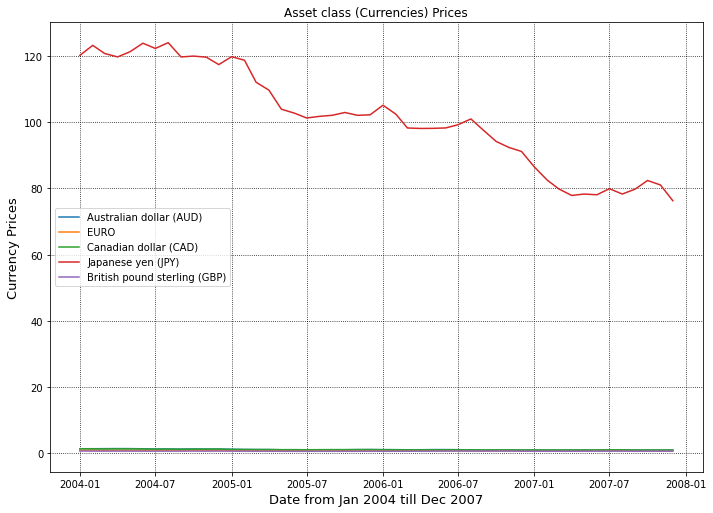

In [177]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(currency_df_2004_2007.index, currency_df_2004_2007.AUD, label='Australian dollar (AUD)')
plt.plot(currency_df_2004_2007.index, currency_df_2004_2007.EURO, label='EURO')
plt.plot(currency_df_2004_2007.index, currency_df_2004_2007.CAD, label='Canadian dollar (CAD)')
plt.plot(currency_df_2004_2007.index, currency_df_2004_2007.JPY, label='Japanese yen (JPY)')
plt.plot(currency_df_2004_2007.index, currency_df_2004_2007.GBP, label='British pound sterling (GBP)')
plt.title('Asset class (Currencies) Prices')
plt.xlabel('Date from Jan 2004 till Dec 2007', fontsize=13)
plt.ylabel('Currency Prices', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=6);

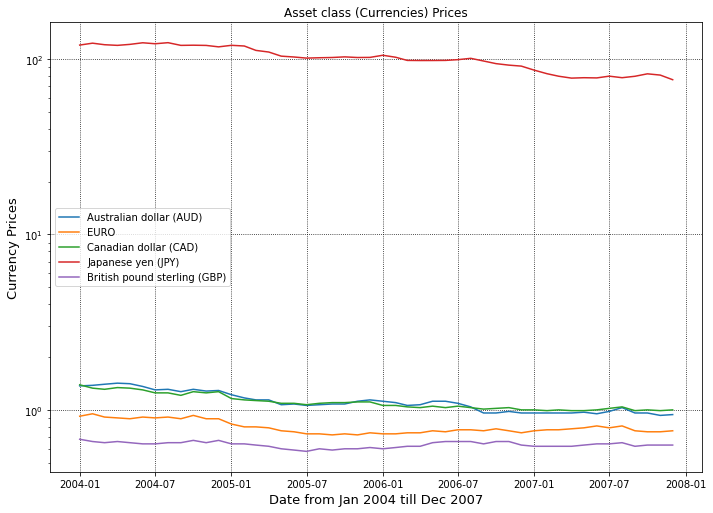

In [178]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(currency_df_2004_2007.index, currency_df_2004_2007.AUD, label='Australian dollar (AUD)')
plt.plot(currency_df_2004_2007.index, currency_df_2004_2007.EURO, label='EURO')
plt.plot(currency_df_2004_2007.index, currency_df_2004_2007.CAD, label='Canadian dollar (CAD)')
plt.plot(currency_df_2004_2007.index, currency_df_2004_2007.JPY, label='Japanese yen (JPY)')
plt.plot(currency_df_2004_2007.index, currency_df_2004_2007.GBP, label='British pound sterling (GBP)')
plt.title('Asset class (Currencies) Prices')
plt.xlabel('Date from Jan 2004 till Dec 2007', fontsize=13)
plt.ylabel('Currency Prices', fontsize=13)
plt.yscale('log')
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=6);

**The Price Rate of Change (ROC)**

- To get the percentage change for each bond price of each country on a monthly basis, I will use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element, and call it on the entire DataFrame.

In [179]:
# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
currency_df_2004_2007 = currency_df_2004_2007[['AUD','EURO','CAD','JPY','GBP']].pct_change()
currency_df_2004_2007.head(5)

,AUD,EURO,CAD,JPY,GBP
Date,,,,,
2004-01-01,NaN,NaN,NaN,NaN,NaN
2004-02-01,0.007299,0.032609,-0.043165,0.025208,-0.029412
2004-03-01,0.014493,-0.042105,-0.015038,-0.020044,-0.015152
2004-04-01,0.014286,-0.010989,0.022901,-0.008447,0.015385
2004-05-01,-0.007042,-0.011111,-0.007463,0.013028,-0.015152


In [180]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows (the first row)
currency_df_2004_2007.dropna(axis=0, inplace=True)
currency_df_2004_2007.head(5)

,AUD,EURO,CAD,JPY,GBP
Date,,,,,
2004-02-01,0.007299,0.032609,-0.043165,0.025208,-0.029412
2004-03-01,0.014493,-0.042105,-0.015038,-0.020044,-0.015152
2004-04-01,0.014286,-0.010989,0.022901,-0.008447,0.015385
2004-05-01,-0.007042,-0.011111,-0.007463,0.013028,-0.015152
2004-06-01,-0.035461,0.022472,-0.022556,0.021270,-0.015385


In [181]:
print('There are {} rows in the DataFrame'.format(currency_df_2004_2007.shape[0]))

There are 47 rows in the DataFrame


In [182]:
# Use pandas.DataFrame.copy() function to make a copy of currency_df
currency_df_2004_2007_2 = currency_df_2004_2007.copy()

**Volatility**

- Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. However, volatility is often measured as either the standard deviation or variance between returns from that same security or market index.
- Volatility is a measure of the price fluctuations of an asset or portfolio.

**Annualizing Volatility**

- To Calculate the annualizing volatility, I will multiply the monthly standard deviation by the square root of number of months.

In [183]:
vol_curr_df_2004_2007 = currency_df_2004_2007

In [184]:
vol_curr_df_2004_2007.shape[0]

47

In [185]:
# Calculate the volatility (the price fluctuation of assets od the protfolio)

# Use pandas.DataFrame.rolling() function to provide rolling window calculation
# Use numpy.std() function to compute the standard deviation along the specified axis
# Use Python math sqrt() function to return the square root of any number

vol_curr_df_2004_2007['AUD_Vol'] = vol_curr_df_2004_2007['AUD'].rolling(47).std() * math.sqrt(47)
vol_curr_df_2004_2007['EURO_Vol'] = vol_curr_df_2004_2007['EURO'].rolling(47).std() * math.sqrt(47)
vol_curr_df_2004_2007['CAD_Vol'] = vol_curr_df_2004_2007['CAD'].rolling(47).std() * math.sqrt(47)
vol_curr_df_2004_2007['JPY_Vol'] = vol_curr_df_2004_2007['JPY'].rolling(47).std() * math.sqrt(47)
vol_curr_df_2004_2007['GBP_Vol'] = vol_curr_df_2004_2007['GBP'].rolling(47).std() * math.sqrt(47)

In [186]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
vol_curr_df_2004_2007.dropna(axis=0, inplace=True)

In [187]:
vol_curr_df_2004_2007[['AUD_Vol','EURO_Vol','CAD_Vol','JPY_Vol','GBP_Vol']]

,AUD_Vol,EURO_Vol,CAD_Vol,JPY_Vol,GBP_Vol
Date,,,,,
2007-12-01,0.198605,0.171187,0.160573,0.162692,0.148649


**Risk Parity Portfolio (RP):**

- Risk parity portfolio is an investment allocation strategy that focuses on the allocation of risk, rather than the allocation of capital.

- A Risky Parity Portfolio, also known as equal risk contribution portfolio (ERC) is inverse volatility weighted portfolio if all pairwise correlations are equal, in other words, which individual assets, in the case of equity and bond, have equal risk contribution to the portfolio risk.

- However, the Risk Parity portfolio was coined by Edward Qian (2015) when he examined the unbalanced risk allocation of traditional 60/40 allocation portfolios of bonds and stocks.

- Risk parity is a portfolio allocation strategy that uses risk to determine allocations across various components of an investment portfolio. The risk parity strategy modifies the modern portfolio theory (MPT) approach to investing through the use of leverage.

- A challenge with RP is that asset classes may carry some degree of risk exposure coming from other asset classes. The key point is that the RP portfolio should hold balanced risk allocation between the economic risk factors such as, growth and inflation risk that are the major drivers of portfolio returns.

In [188]:
# With Risk Parity Strategy, I will target a specific level of risk or return,
# and divide the risk equally across all asset classes
Avg_vol_curr = (0.198605+0.171187+0.160573+0.162692+0.148649) / 5
Avg_vol_curr

0.16834120000000002

In [189]:
# Set the annualized volatility target divide by six asset clases for the portfolio with Risk Parity
curr_target_vol = 0.16834120000000002 / 5
curr_target_vol

0.03366824

In [190]:
# Create a new dataframe called portfolio_df which calculates the allocation to each asset class 
port_curr_df_2004_2007 = currency_df_2004_2007

In [191]:
port_curr_df_2004_2007['AUD_Alloc'] = curr_target_vol / vol_curr_df_2004_2007['AUD_Vol'] 
port_curr_df_2004_2007['EURO_Alloc'] = curr_target_vol / vol_curr_df_2004_2007['EURO_Vol'] 
port_curr_df_2004_2007['CAD_Alloc'] = curr_target_vol / vol_curr_df_2004_2007['CAD_Vol'] 
port_curr_df_2004_2007['JPY_Alloc'] = curr_target_vol / vol_curr_df_2004_2007['JPY_Vol'] 
port_curr_df_2004_2007['GBP_Alloc'] = curr_target_vol / vol_curr_df_2004_2007['GBP_Vol'] 

In [192]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
port_curr_df_2004_2007.dropna(axis=0, inplace=True)

In [193]:
port_curr_df_2004_2007[['AUD_Alloc','EURO_Alloc','CAD_Alloc','JPY_Alloc','GBP_Alloc']]

,AUD_Alloc,EURO_Alloc,CAD_Alloc,JPY_Alloc,GBP_Alloc
Date,,,,,
2007-12-01,0.169524,0.196675,0.209676,0.206945,0.226495


In [194]:
# I will multiply the monthly bond prices by the allocation percentage,
# in order to get the return for each portion of the portfolio (currencies)

In [195]:
currency_df_2004_2007_2['AUD_R'] = currency_df_2004_2007_2['AUD'] * 0.169524
currency_df_2004_2007_2['EURO_R'] = currency_df_2004_2007_2['EURO'] * 0.196675
currency_df_2004_2007_2['CAD_R'] = currency_df_2004_2007_2['CAD'] * 0.209676
currency_df_2004_2007_2['JPY_R'] = currency_df_2004_2007_2['JPY'] * 0.206945
currency_df_2004_2007_2['GBP_R'] = currency_df_2004_2007_2['GBP'] * 0.226495

In [196]:
currency_df_2004_2007_2.head(5)

,AUD,EURO,CAD,JPY,GBP,AUD_R,EURO_R,CAD_R,JPY_R,GBP_R
Date,,,,,,,,,,
2004-02-01,0.007299,0.032609,-0.043165,0.025208,-0.029412,0.001237,0.006413,-0.009051,0.005217,-0.006662
2004-03-01,0.014493,-0.042105,-0.015038,-0.020044,-0.015152,0.002457,-0.008281,-0.003153,-0.004148,-0.003432
2004-04-01,0.014286,-0.010989,0.022901,-0.008447,0.015385,0.002422,-0.002161,0.004802,-0.001748,0.003485
2004-05-01,-0.007042,-0.011111,-0.007463,0.013028,-0.015152,-0.001194,-0.002185,-0.001565,0.002696,-0.003432
2004-06-01,-0.035461,0.022472,-0.022556,0.021270,-0.015385,-0.006011,0.004420,-0.004730,0.004402,-0.003485


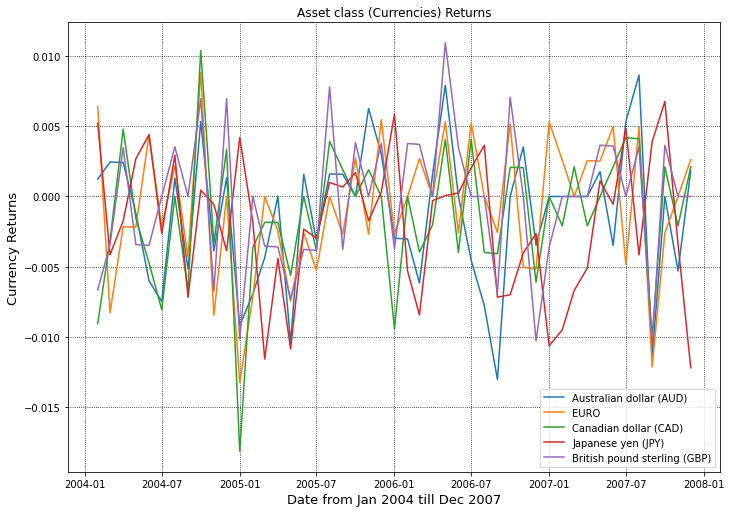

In [197]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(currency_df_2004_2007_2.index, currency_df_2004_2007_2.AUD_R, label='Australian dollar (AUD)')
plt.plot(currency_df_2004_2007_2.index, currency_df_2004_2007_2.EURO_R, label='EURO')
plt.plot(currency_df_2004_2007_2.index, currency_df_2004_2007_2.CAD_R, label='Canadian dollar (CAD)')
plt.plot(currency_df_2004_2007_2.index, currency_df_2004_2007_2.JPY_R, label='Japanese yen (JPY)')
plt.plot(currency_df_2004_2007_2.index, currency_df_2004_2007_2.GBP_R, label='British pound sterling (GBP)')
plt.title('Asset class (Currencies) Returns')
plt.xlabel('Date from Jan 2004 till Dec 2007', fontsize=13)
plt.ylabel('Currency Returns', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=4);

In [198]:
# Adding up all the returns of all asset classes for all currencies (AUD, EURO, CAD, JPY, and GBP)

In [199]:
currency_df_2004_2007_2['Portfolio_R'] = currency_df_2004_2007_2['AUD_R'] + currency_df_2004_2007_2['EURO_R'] + currency_df_2004_2007_2['CAD_R'] + currency_df_2004_2007_2['JPY_R'] + currency_df_2004_2007_2['GBP_R']

In [200]:
# Creating a hypothetical $1,000 portfolio and calculate the cumulative performance of the risk parity portfolio.

In [201]:
# Use pandas.DataFrame.cumprod() function to return cumulative product over a dataframe or series axis
currency_df_2004_2007_2['Currency_Port_Value'] = ((currency_df_2004_2007_2['Portfolio_R'] + 1).cumprod())*1000

In [202]:
currency_df_2004_2007_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R','Portfolio_R', 'Currency_Port_Value']].head(5)

,AUD_R,EURO_R,CAD_R,JPY_R,GBP_R,Portfolio_R,Currency_Port_Value
Date,,,,,,,
2004-02-01,0.001237,0.006413,-0.009051,0.005217,-0.006662,-0.002845,997.155003
2004-03-01,0.002457,-0.008281,-0.003153,-0.004148,-0.003432,-0.016557,980.645191
2004-04-01,0.002422,-0.002161,0.004802,-0.001748,0.003485,0.006799,987.312426
2004-05-01,-0.001194,-0.002185,-0.001565,0.002696,-0.003432,-0.005679,981.705014
2004-06-01,-0.006011,0.004420,-0.004730,0.004402,-0.003485,-0.005404,976.399619


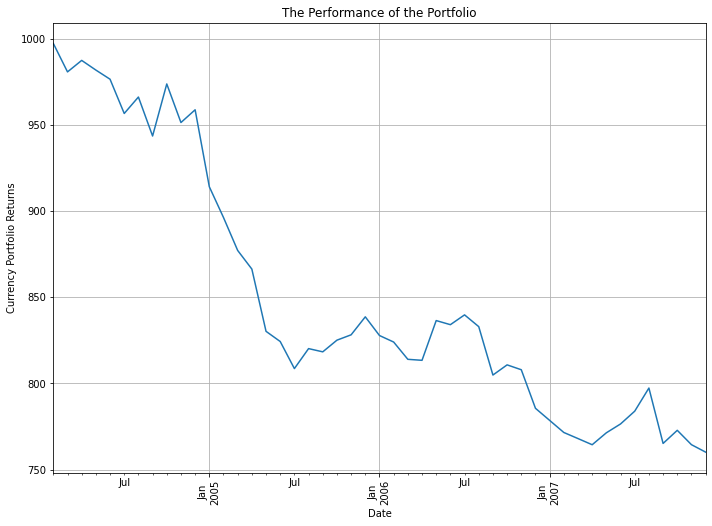

In [203]:
plt.figure(figsize=[ 11.69, 8.27])
plt.title('The Performance of the Portfolio');
plt.xlabel('Date from Jan 2004 till Dec 2007')
plt.ylabel('Currency Portfolio Returns')
currency_df_2004_2007_2['Currency_Port_Value'].plot(grid=True)
plt.xticks(rotation=90);
plt.show();

In [204]:
# Calculate the Maximum Drawdown (MDD) of the Portfolio Value
# (currency_df_2.Portfolio_Value.max() - currency_df_2.Portfolio_Value.min()) / currency_df_2.Portfolio_Value.max()
print("The Maximum Drawdown (MDD) of the Portfolio is {:.2f} %".format((currency_df_2004_2007_2.Currency_Port_Value.max() - currency_df_2004_2007_2.Currency_Port_Value.min()) / currency_df_2004_2007_2.Currency_Port_Value.max()
))

The Maximum Drawdown (MDD) of the Portfolio is 0.24 %


In [205]:
# Calculate the cumulative return of the portfolio
cumulative_return = 100 * (currency_df_2004_2007_2['Currency_Port_Value'][-1] / currency_df_2004_2007_2['Currency_Port_Value'][0] - 1)
print("The Cumulative Return of the Portfolio is {:.2f} %".format(cumulative_return))

The Cumulative Return of the Portfolio is -23.77 %


**The Sharpe Ratio**

- The sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
- The Risk-Free Rate could by a U.S. Treasury Rate (A 10 year US Treasury rate is at 1.64%)

In [206]:
# use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element.
currency_df_2004_2007_2['Monthly_Return'] = currency_df_2004_2007_2['Currency_Port_Value'].pct_change(1)

In [207]:
# Calcualte the Sharpe Ratio
Sharpe_Ratio = currency_df_2004_2007_2['Monthly_Return'].mean() / currency_df_2004_2007_2['Monthly_Return'].std()
Sharpe_Ratio

-0.3362387210584859

In [208]:
# Annualize the Sharpe Ratio, since I calculate it from monthly values.
# There are twelve months in the year, so to annualize it, multiply the Sharpe Ratio by the square root of 12
Annualized_Sharpe_Ratio = Sharpe_Ratio * np.sqrt(47)
Annualized_Sharpe_Ratio

-2.305136534857572

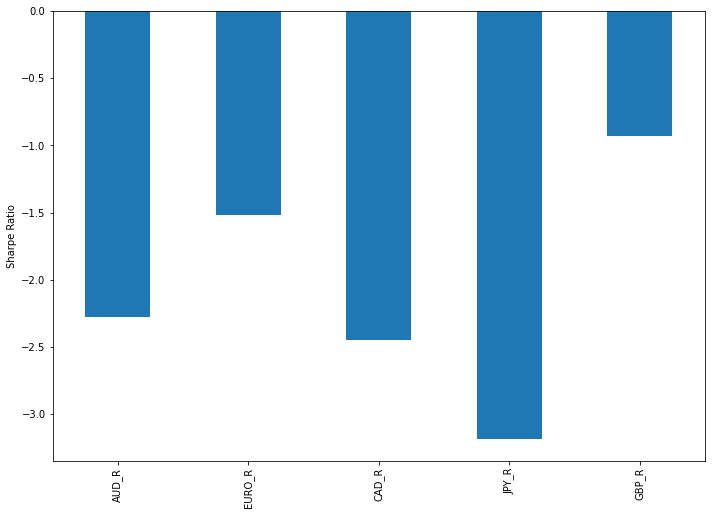

In [209]:
# Calcualte the Sharpe Ratio for currency portfolio
def currency_sharpe_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

return_series = currency_df_2004_2007_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R']]
rf = .0164 # Risk Free Rate
n = 47 # 47 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
currency_sharpes = currency_df_2004_2007_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R']].apply(currency_sharpe_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sharpe Ratio')
currency_sharpes.plot.bar(); 

**The Sortino Ratio**

- The Sortino ratio is a variation of the Sharpe ratio that differentiates harmful volatility from total overall volatility by using the asset's standard deviation of negative portfolio returns—downside deviation—instead of the total standard deviation of portfolio returns. 
- The Sortino ratio takes an asset or portfolio's return and subtracts the risk-free rate, and then divides that amount by the asset's downside deviation. The ratio was named after Frank A. Sortino.
- The Sortino ratio = Portfolio Return - Target Return / Downside Risk

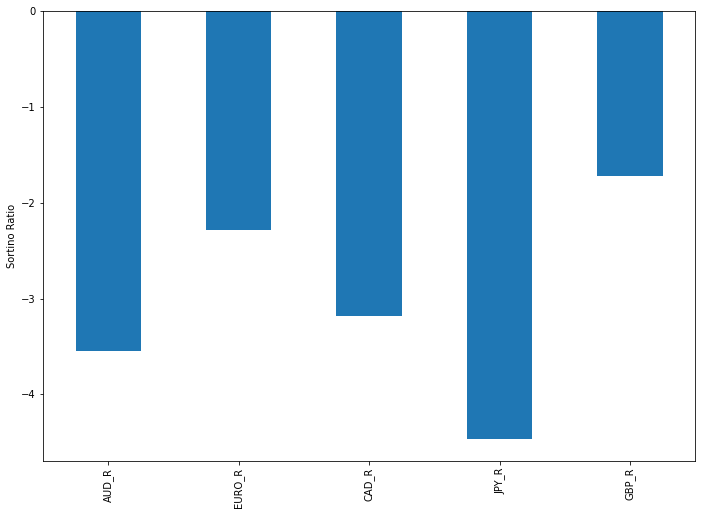

In [210]:
# Calcualte the Sortino Ratio for currency portfolio
def currency_sortino_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

return_series = currency_df_2004_2007_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R']]
rf = .0164 # Risk Free Rate
n = 47 # 47 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
currency_sortinos = currency_df_2004_2007_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R']].apply(currency_sortino_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sortino Ratio')
currency_sortinos.plot.bar(); 

**Maximum Drawdown (MDD)**

- A maximum drawdown (MDD) is the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained. Maximum drawdown is an indicator of downside risk over a specified time period.
- The formula for Maximum Drawdown is MDD = (Trough Value - Peak Value) /Peak Value.

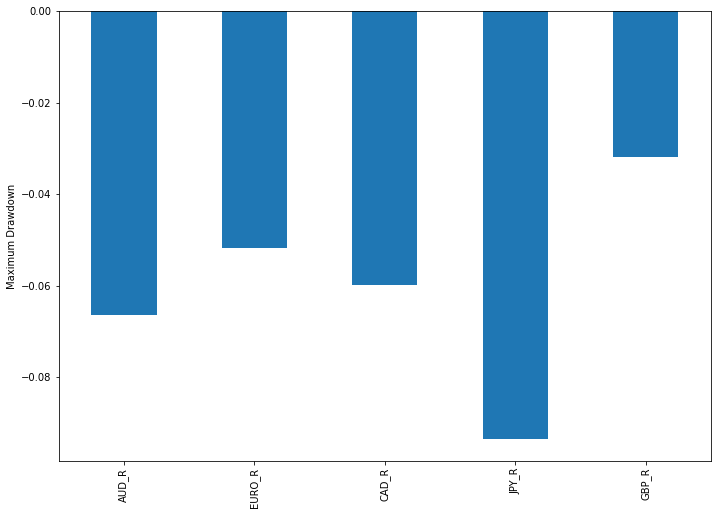

In [211]:
# Calcualte the Maximum Drawdown (MDD) for currency portfolio
def currency_MDD(return_series):
    comp_ret = (return_series + 1).cumprod()
    # Use pandas.DataFrame.expanding() function to provide expanding transformations
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret / peak) - 1
    return dd.min()

return_series = currency_df_2004_2007_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R']]

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
currency_max_drawdown = currency_df_2004_2007_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R']].apply(currency_MDD, axis=0)
plt.ylabel('Maximum Drawdown')
currency_max_drawdown.plot.bar();   

**Conclusion**

- Applying the risk parity portfolio strategy from Jan 2004 till December 2007.
- Target volatility 3.36 %.
- Maximum Drawdown 0.24 %.
- Cumulative return of the o=portfolio -23.77 %
- Sharpe Ratio -3.36%.

In [212]:
# Dataset Industry Portfolio contains the monthly weighted average returns of industry portfolio
# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
industry_portfolio_df_2004_2007 = pd.read_csv('Industry_Portfolio_2004_2007.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(industry_portfolio_df_2004_2007.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
industry_portfolio_df_2004_2007.head()

(48, 11)


,Date,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
0,1/1/2004,0.12,-1.12,-0.62,0.45,4.49,1.42,0.45,3.04,1.92,2.72
1,2/1/2004,4.28,-0.11,1.99,4.69,-2.92,-0.79,6.08,0.91,2.06,2.02
2,3/1/2004,-0.30,-1.15,-0.22,-0.16,-2.53,-2.44,0.30,-3.91,1.17,-0.61
3,4/1/2004,1.51,2.38,-0.19,2.48,-4.89,-0.51,-2.68,3.57,-3.51,-3.84
4,5/1/2004,-2.19,-1.61,1.59,0.42,4.82,-2.95,0.27,-0.38,1.28,2.08


In [213]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
industry_portfolio_df_2004_2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    48 non-null     object 
 1   NoDur   48 non-null     float64
 2   Durbl   48 non-null     float64
 3   Manuf   48 non-null     float64
 4   Enrgy   48 non-null     float64
 5   HiTec   48 non-null     float64
 6   Telcm   48 non-null     float64
 7   Shops   48 non-null     float64
 8   Hlth    48 non-null     float64
 9   Utils   48 non-null     float64
 10  Other   48 non-null     float64
dtypes: float64(10), object(1)
memory usage: 4.2+ KB


In [214]:
# Use pandas.to_datetime() function to convert argument to datetime
industry_portfolio_df_2004_2007['Date'] = pd.to_datetime(industry_portfolio_df_2004_2007.Date)

In [215]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
industry_portfolio_df_2004_2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    48 non-null     datetime64[ns]
 1   NoDur   48 non-null     float64       
 2   Durbl   48 non-null     float64       
 3   Manuf   48 non-null     float64       
 4   Enrgy   48 non-null     float64       
 5   HiTec   48 non-null     float64       
 6   Telcm   48 non-null     float64       
 7   Shops   48 non-null     float64       
 8   Hlth    48 non-null     float64       
 9   Utils   48 non-null     float64       
 10  Other   48 non-null     float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 4.2 KB


In [216]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
industry_portfolio_df_2004_2007.set_index('Date',inplace=True)

In [217]:
# Use pandas.DataFrame.isnull() method to detect the Null values or missing values.
industry_portfolio_df_2004_2007.isnull().any()

NoDur    False
Durbl    False
Manuf    False
Enrgy    False
HiTec    False
Telcm    False
Shops    False
Hlth     False
Utils    False
Other    False
dtype: bool

In [218]:
industry_portfolio_df_2004_2007[['NoDur','Durbl','Manuf','Enrgy','HiTec','Telcm','Shops','Hlth ','Utils','Other']].head(5)

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
2004-01-01,0.12,-1.12,-0.62,0.45,4.49,1.42,0.45,3.04,1.92,2.72
2004-02-01,4.28,-0.11,1.99,4.69,-2.92,-0.79,6.08,0.91,2.06,2.02
2004-03-01,-0.30,-1.15,-0.22,-0.16,-2.53,-2.44,0.30,-3.91,1.17,-0.61
2004-04-01,1.51,2.38,-0.19,2.48,-4.89,-0.51,-2.68,3.57,-3.51,-3.84
2004-05-01,-2.19,-1.61,1.59,0.42,4.82,-2.95,0.27,-0.38,1.28,2.08


In [219]:
# Use pandas.DataFrame.rename() function to alter axes labels (to remove space in the name)
industry_portfolio_df_2004_2007 = industry_portfolio_df_2004_2007.rename(columns={'Hlth ':'Hlth'})

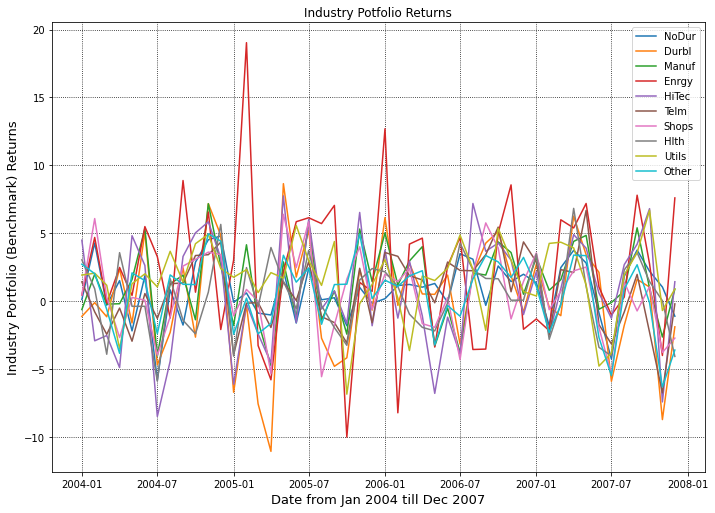

In [220]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(industry_portfolio_df_2004_2007.index, industry_portfolio_df_2004_2007.NoDur, label='NoDur')
plt.plot(industry_portfolio_df_2004_2007.index, industry_portfolio_df_2004_2007.Durbl, label='Durbl')
plt.plot(industry_portfolio_df_2004_2007.index, industry_portfolio_df_2004_2007.Manuf, label='Manuf')
plt.plot(industry_portfolio_df_2004_2007.index, industry_portfolio_df_2004_2007.Enrgy, label='Enrgy')
plt.plot(industry_portfolio_df_2004_2007.index, industry_portfolio_df_2004_2007.HiTec, label='HiTec')
plt.plot(industry_portfolio_df_2004_2007.index, industry_portfolio_df_2004_2007.Telcm, label='Telm')
plt.plot(industry_portfolio_df_2004_2007.index, industry_portfolio_df_2004_2007.Shops, label='Shops')
plt.plot(industry_portfolio_df_2004_2007.index, industry_portfolio_df_2004_2007.Hlth, label='Hlth')
plt.plot(industry_portfolio_df_2004_2007.index, industry_portfolio_df_2004_2007.Utils, label='Utils')
plt.plot(industry_portfolio_df_2004_2007.index,industry_portfolio_df_2004_2007.Other, label='Other')
plt.title('Industry Potfolio Returns')
plt.xlabel('Date from Jan 2004 till Dec 2007', fontsize=13)
plt.ylabel('Industry Portfolio (Benchmark) Returns', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=1);

<h4><center>Investment on a Mixture of Different Asset Classes Portfolio</center></h4>

In [221]:
# Use pandas.concat() function to concatenate pandas objects along a particular axis with optional set logic along
# the other axes.
# I Concatenate Portfolio value of different asset classes (Bonds, Equities, Emerge Market Equities, Commodities, 
# Foreign Currencies)
# I create a hypothetical $1,000 portfolio for each

mix_port_2004_2007 = pd.concat([bond_df_2004_2007_2['Bond_Port_Value'],
                               equity_df_2004_2007_2['Equity_Port_Value'],
                               emerg_market_df_2004_2007_2['Emerg_Market_Port_Value'],
                               commodity_df_2004_2007_2['Commodity_Port_Value'],
                               currency_df_2004_2007_2['Currency_Port_Value']],axis=1).reindex(bond_df_2004_2007_2.index)
mix_port_2004_2007

,Bond_Port_Value,Equity_Port_Value,Emerg_Market_Port_Value,Commodity_Port_Value,Currency_Port_Value
Date,,,,,
2004-02-01,1014.744390,1025.759089,1000.679985,1032.099606,997.155003
2004-03-01,1015.488346,1008.237926,1000.398276,1095.524950,980.645191
2004-04-01,979.317243,1003.075003,999.736821,1015.147901,987.312426
2004-05-01,989.241898,1002.790058,999.452297,1079.675877,981.705014
2004-06-01,979.833369,1034.153369,999.734775,1023.679299,976.399619
2004-07-01,989.800769,1014.415920,999.932673,1062.963923,956.535589
2004-08-01,1005.796985,1016.367810,1000.636864,1069.615246,966.074701
2004-09-01,1006.601576,1041.532300,1001.481928,1122.834265,943.469372
2004-10-01,1012.519757,1056.113639,1001.679900,1115.604441,973.655005


In [222]:
mix_port_2004_2007.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47 entries, 2004-02-01 to 2007-12-01
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Bond_Port_Value          47 non-null     float64
 1   Equity_Port_Value        47 non-null     float64
 2   Emerg_Market_Port_Value  47 non-null     float64
 3   Commodity_Port_Value     47 non-null     float64
 4   Currency_Port_Value      47 non-null     float64
dtypes: float64(5)
memory usage: 2.2 KB


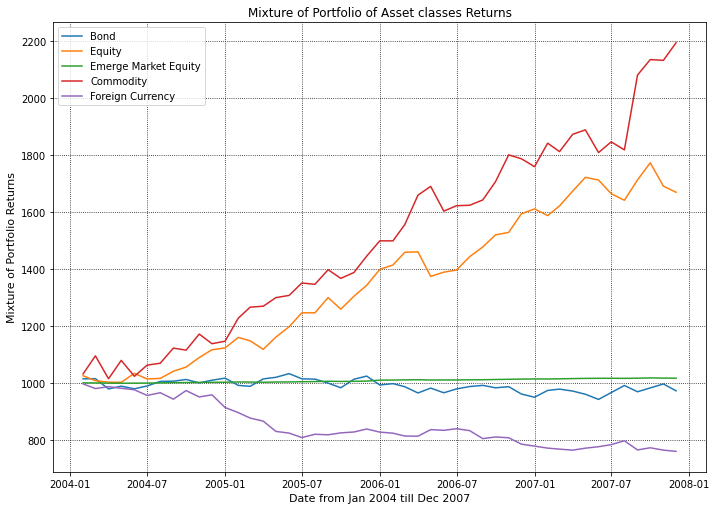

In [223]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(mix_port_2004_2007.index, mix_port_2004_2007.Bond_Port_Value, label='Bond')
plt.plot(mix_port_2004_2007.index, mix_port_2004_2007.Equity_Port_Value, label='Equity')
plt.plot(mix_port_2004_2007.index, mix_port_2004_2007.Emerg_Market_Port_Value, label='Emerge Market Equity')
plt.plot(mix_port_2004_2007.index, mix_port_2004_2007.Commodity_Port_Value, label='Commodity')                               
plt.plot(mix_port_2004_2007.index, mix_port_2004_2007.Currency_Port_Value, label='Foreign Currency')
                               
plt.title('Mixture of Portfolio of Asset classes Returns')
plt.xlabel('Date from Jan 2004 till Dec 2007', fontsize=11)
plt.ylabel('Mixture of Portfolio Returns', fontsize=11)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

**With Risk Parity Strategy on the Asset Classes and Portfolio (RP):**

In [224]:
1/5

0.2

In [225]:
# Use pandas.DataFrame.copy() function to make a copy of mix_port_2004_2007 dataframe
Risk_Parity_Strategy_2004_2007 = mix_port_2004_2007.copy()

In [226]:
Risk_Parity_Strategy_2004_2007['Bond_Port_Value_20%'] = Risk_Parity_Strategy_2004_2007['Bond_Port_Value'] * .20
Risk_Parity_Strategy_2004_2007['Equity_Port_Value_20%'] = Risk_Parity_Strategy_2004_2007['Equity_Port_Value'] * .20
Risk_Parity_Strategy_2004_2007['Bond_Port_Value_20%'] = Risk_Parity_Strategy_2004_2007['Emerg_Market_Port_Value'] * .20
Risk_Parity_Strategy_2004_2007['Bond_Port_Value_20%'] = Risk_Parity_Strategy_2004_2007['Commodity_Port_Value'] * .20
Risk_Parity_Strategy_2004_2007['Bond_Port_Value_20%'] = Risk_Parity_Strategy_2004_2007['Currency_Port_Value'] * .20

In [227]:
Risk_Parity_Strategy_2004_2007

,Bond_Port_Value,Equity_Port_Value,Emerg_Market_Port_Value,Commodity_Port_Value,Currency_Port_Value,Bond_Port_Value_20%,Equity_Port_Value_20%
Date,,,,,,,
2004-02-01,1014.744390,1025.759089,1000.679985,1032.099606,997.155003,199.431001,205.151818
2004-03-01,1015.488346,1008.237926,1000.398276,1095.524950,980.645191,196.129038,201.647585
2004-04-01,979.317243,1003.075003,999.736821,1015.147901,987.312426,197.462485,200.615001
2004-05-01,989.241898,1002.790058,999.452297,1079.675877,981.705014,196.341003,200.558012
2004-06-01,979.833369,1034.153369,999.734775,1023.679299,976.399619,195.279924,206.830674
2004-07-01,989.800769,1014.415920,999.932673,1062.963923,956.535589,191.307118,202.883184
2004-08-01,1005.796985,1016.367810,1000.636864,1069.615246,966.074701,193.214940,203.273562
2004-09-01,1006.601576,1041.532300,1001.481928,1122.834265,943.469372,188.693874,208.306460
2004-10-01,1012.519757,1056.113639,1001.679900,1115.604441,973.655005,194.731001,211.222728


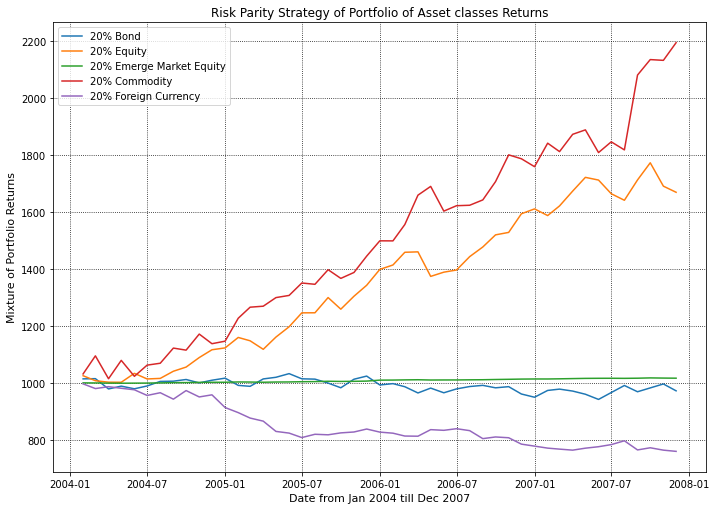

In [228]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(Risk_Parity_Strategy_2004_2007.index, Risk_Parity_Strategy_2004_2007.Bond_Port_Value, label='20% Bond')
plt.plot(Risk_Parity_Strategy_2004_2007.index, Risk_Parity_Strategy_2004_2007.Equity_Port_Value, label='20% Equity')
plt.plot(Risk_Parity_Strategy_2004_2007.index, Risk_Parity_Strategy_2004_2007.Emerg_Market_Port_Value, label='20% Emerge Market Equity')
plt.plot(Risk_Parity_Strategy_2004_2007.index, Risk_Parity_Strategy_2004_2007.Commodity_Port_Value, label='20% Commodity')                               
plt.plot(Risk_Parity_Strategy_2004_2007.index, Risk_Parity_Strategy_2004_2007.Currency_Port_Value, label='20% Foreign Currency')
                               
plt.title('Risk Parity Strategy of Portfolio of Asset classes Returns')
plt.xlabel('Date from Jan 2004 till Dec 2007', fontsize=11)
plt.ylabel('Mixture of Portfolio Returns', fontsize=11)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

**With 60/40 Portfolio:**

- The 60/40 Portfolio composed of 60% Equities, and 40% Bonds

In [229]:
# Use pandas.DataFrame.copy() function to make a copy of mix_port_2004_2007 dataframe
RP_60_40_Portfolio_2004_2007 = mix_port_2004_2007[['Bond_Port_Value','Equity_Port_Value']].copy()

In [230]:
RP_60_40_Portfolio_2004_2007['Bond_Port_Value_40%'] = RP_60_40_Portfolio_2004_2007['Bond_Port_Value'] * .40
RP_60_40_Portfolio_2004_2007['Equity_Port_Value_60%'] = RP_60_40_Portfolio_2004_2007['Equity_Port_Value'] * .60

In [231]:
RP_60_40_Portfolio_2004_2007

,Bond_Port_Value,Equity_Port_Value,Bond_Port_Value_40%,Equity_Port_Value_60%
Date,,,,
2004-02-01,1014.744390,1025.759089,405.897756,615.455453
2004-03-01,1015.488346,1008.237926,406.195339,604.942756
2004-04-01,979.317243,1003.075003,391.726897,601.845002
2004-05-01,989.241898,1002.790058,395.696759,601.674035
2004-06-01,979.833369,1034.153369,391.933348,620.492022
2004-07-01,989.800769,1014.415920,395.920308,608.649552
2004-08-01,1005.796985,1016.367810,402.318794,609.820686
2004-09-01,1006.601576,1041.532300,402.640630,624.919380
2004-10-01,1012.519757,1056.113639,405.007903,633.668184


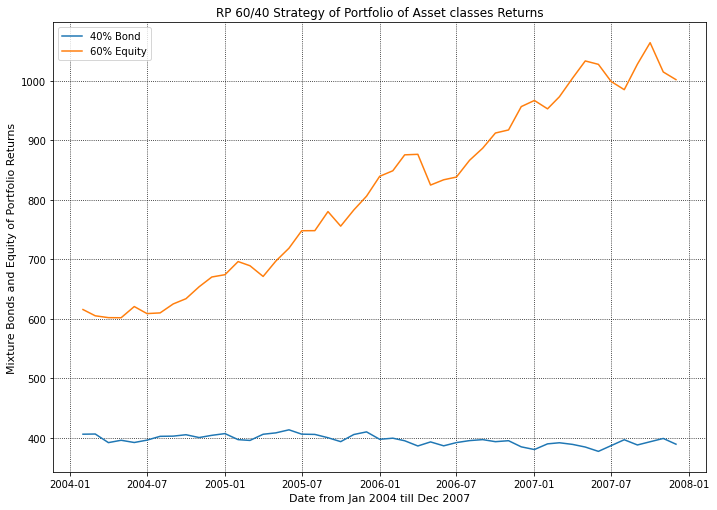

In [232]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(RP_60_40_Portfolio_2004_2007.index, RP_60_40_Portfolio_2004_2007['Bond_Port_Value_40%'], label='40% Bond')
plt.plot(RP_60_40_Portfolio_2004_2007.index, RP_60_40_Portfolio_2004_2007['Equity_Port_Value_60%'], label='60% Equity')
                               
plt.title('RP 60/40 Strategy of Portfolio of Asset classes Returns')
plt.xlabel('Date from Jan 2004 till Dec 2007', fontsize=11)
plt.ylabel('Mixture Bonds and Equity of Portfolio Returns', fontsize=11)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

**With Ten months Moving Average on the Asset Classes and Portfolio:**

In [233]:
# Use pandas.DataFrame.copy() function to make a copy of mix_port_2004_2007 dataframe
Moving_Average_Portfolio_2004_2007 = mix_port_2004_2007.copy()

In [234]:
# Calculating Moving Average with 10 numbers of observations on Mixture Portfolio 
# Use pandas.DataFrame.rolling(window=10) function to provide rolling window 10 of calculations
# Use Python mean() method to calculate the arithmetic mean (average) of data

Moving_Average_Portfolio_2004_2007['Bond_Port_Value_Avg'] = Moving_Average_Portfolio_2004_2007['Bond_Port_Value'].rolling(window=10).mean()
Moving_Average_Portfolio_2004_2007['Equity_Port_Value_Avg'] = Moving_Average_Portfolio_2004_2007['Equity_Port_Value'].rolling(window=10).mean()
Moving_Average_Portfolio_2004_2007['Emerg_Market_Port_Value_Avg'] = Moving_Average_Portfolio_2004_2007['Emerg_Market_Port_Value'].rolling(window=10).mean()
Moving_Average_Portfolio_2004_2007['Commodity_Port_Value_Avg'] = Moving_Average_Portfolio_2004_2007['Commodity_Port_Value'].rolling(window=10).mean()
Moving_Average_Portfolio_2004_2007['Currency_Port_Value_Avg'] = Moving_Average_Portfolio_2004_2007['Currency_Port_Value'].rolling(window=10).mean()


In [235]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
Moving_Average_Portfolio_2004_2007.dropna(axis=0, inplace=True)
Moving_Average_Portfolio_2004_2007

,Bond_Port_Value,Equity_Port_Value,Emerg_Market_Port_Value,Commodity_Port_Value,Currency_Port_Value,Bond_Port_Value_Avg,Equity_Port_Value_Avg,Emerg_Market_Port_Value_Avg,Commodity_Port_Value_Avg,Currency_Port_Value_Avg
Date,,,,,,,,,,
2004-11-01,1000.639817,1089.570079,1002.383108,1171.996500,951.286699,999.398415,1029.201519,1000.611663,1078.914201,971.423862
2004-12-01,1009.971096,1116.959422,1002.688574,1138.209878,958.682334,998.921086,1038.321553,1000.812522,1089.525228,967.576595
2005-01-01,1017.256759,1123.428118,1002.835675,1147.067012,914.057369,999.097927,1049.840572,1001.056262,1094.679434,960.917813
2005-02-01,991.868740,1160.195357,1003.899391,1227.611529,896.215217,1000.353077,1065.552607,1001.472519,1115.925797,951.808092
2005-03-01,988.566230,1148.459601,1003.580712,1266.423592,877.112468,1000.285510,1080.119561,1001.885360,1134.600569,941.348837
2005-04-01,1014.495234,1118.516575,1002.873304,1269.906714,866.304996,1003.751696,1088.555882,1002.199213,1159.223310,930.339375
2005-05-01,1020.312882,1161.571550,1003.642595,1300.126340,830.208945,1006.802908,1103.271445,1002.570205,1182.939552,917.706711
2005-06-01,1033.118727,1197.669369,1003.921406,1307.724187,824.307915,1009.535082,1121.401601,1002.898659,1206.750446,903.530032
2005-07-01,1014.943552,1246.565224,1004.745351,1351.357264,808.604522,1010.369279,1141.904893,1003.225002,1229.602746,890.043547


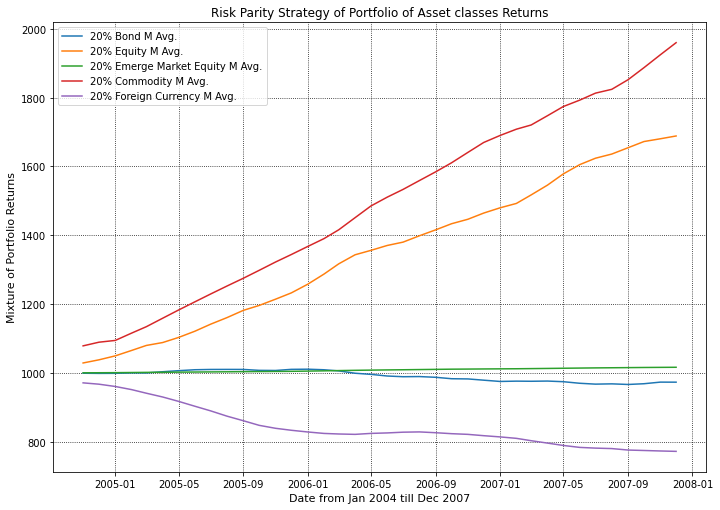

In [236]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(Moving_Average_Portfolio_2004_2007.index, Moving_Average_Portfolio_2004_2007.Bond_Port_Value_Avg, label='20% Bond M Avg.')
plt.plot(Moving_Average_Portfolio_2004_2007.index, Moving_Average_Portfolio_2004_2007.Equity_Port_Value_Avg, label='20% Equity M Avg.')
plt.plot(Moving_Average_Portfolio_2004_2007.index, Moving_Average_Portfolio_2004_2007.Emerg_Market_Port_Value_Avg, label='20% Emerge Market Equity M Avg.')
plt.plot(Moving_Average_Portfolio_2004_2007.index, Moving_Average_Portfolio_2004_2007.Commodity_Port_Value_Avg, label='20% Commodity M Avg.')                               
plt.plot(Moving_Average_Portfolio_2004_2007.index, Moving_Average_Portfolio_2004_2007.Currency_Port_Value_Avg, label='20% Foreign Currency M Avg.')
                               
plt.title('Risk Parity Strategy of Portfolio of Asset classes Returns')
plt.xlabel('Date from Jan 2004 till Dec 2007', fontsize=11)
plt.ylabel('Mixture of Portfolio Returns', fontsize=11)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

<h4><center>Other RP techniques of Portfolio</center></h4>

In [244]:
# Dataset (Bond.csv) from Master Equity Portfolio Excel file
# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
bond_df_2004_2007 = pd.read_csv('Bond_2004_2007.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(bond_df_2004_2007.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
bond_df_2004_2007.head()

(48, 7)


,Date,Germany,Australia,US,UK,Canada,Japan
0,1/1/2004,100.02,105.10,100.98,100.92,104.87,100.66
1,2/1/2004,101.31,107.39,100.23,102.02,106.25,100.66
2,3/1/2004,102.45,107.20,101.30,102.13,106.75,98.78
3,4/1/2004,100.28,103.94,96.17,100.19,103.81,99.74
4,5/1/2004,99.43,104.58,101.25,98.86,103.52,99.83


In [245]:
# Use pandas.to_datetime() function to convert argument to datetime
bond_df_2004_2007['Date'] = pd.to_datetime(bond_df_2004_2007.Date)

In [246]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
bond_df_2004_2007.set_index('Date',inplace=True)

In [248]:
# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
bond_df_2004_2007 = np.log(1+bond_df_2004_2007[['Germany','Australia','US','UK','Canada','Japan']].pct_change())

In [249]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows (the first row)
bond_df_2004_2007.dropna(axis=0, inplace=True)
bond_df_2004_2007.head(5)

,Germany,Australia,US,UK,Canada,Japan
Date,,,,,,
2004-02-01,0.012815,0.021555,-0.007455,0.010841,0.013073,0.000000
2004-03-01,0.011190,-0.001771,0.010619,0.001078,0.004695,-0.018853
2004-04-01,-0.021409,-0.030882,-0.051969,-0.019178,-0.027927,0.009672
2004-05-01,-0.008512,0.006139,0.051475,-0.013364,-0.002797,0.000902
2004-06-01,-0.002921,-0.002010,0.000592,0.004239,-0.011269,-0.013209


In [250]:
1/6

0.16666666666666666

In [251]:
weights = [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666,
           0.16666666666666666, 0.16666666666666666]

In [252]:
# Use numpy.dot() function to returns the dot product of two arrays.
np.dot(bond_df_2004_2007.mean(), weights)

0.0004135803373946482

In [253]:
def portfolio_returns(weights):
    return np.dot(bond_df_2004_2007.mean(), weights)

In [254]:
# Use pandas.DataFrame.cov() to Compute pairwise covariance of columns, excluding NA/null values.
bond_df_2004_2007.cov()

,Germany,Australia,US,UK,Canada,Japan
Germany,0.000276,0.000073,0.000161,-0.000250,0.000079,0.000071
Australia,0.000073,0.000196,0.000141,0.000101,0.000104,0.000042
US,0.000161,0.000141,0.000438,-0.000115,0.000135,0.000069
UK,-0.000250,0.000101,-0.000115,0.007404,0.000042,-0.000110
Canada,0.000079,0.000104,0.000135,0.000042,0.000166,0.000026
Japan,0.000071,0.000042,0.000069,-0.000110,0.000026,0.000211


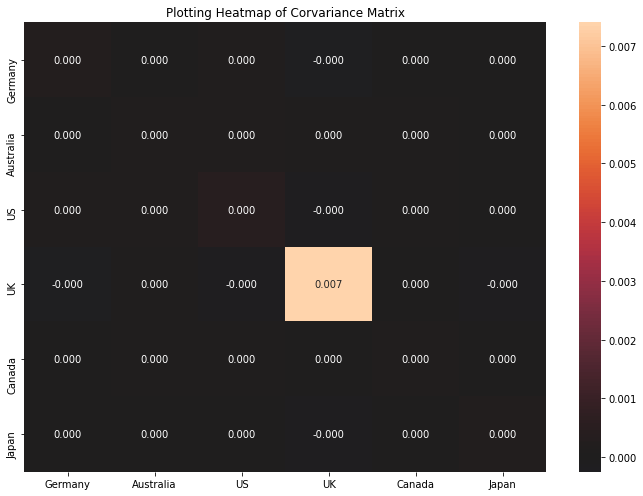

In [255]:
plt.figure(figsize=[ 11.69, 8.27]);
plt.title('Plotting Heatmap of Corvariance Matrix');
# Use seaborn.heatmap() function to plot rectangular data as a color-encoded matrix.
# Use pandas.DataFrame.cov() to Compute pairwise covariance of columns, excluding NA/null values.
sb.heatmap(bond_df_2004_2007.cov(),annot=True,fmt='.3f', center=0);

In [256]:
# Calculate the portfolio_variance 
portfolio_variance = weights[0]**2* 0.000276 + weights[1]**2* 0.000196 + weights[2]**2* 0.000438 + weights[3]**2* 0.007404 + weights[4]**2* 0.000166 + weights[5]**2* 0.000211
portfolio_variance

0.00024141666666666663

In [257]:
# calculate the portfolio standard deviation (Standard deviation = Square root of the variance)
portfolio_standard_deviation = portfolio_variance**(1/2)
portfolio_standard_deviation

0.015537588830531803

In [258]:
bond_df_2004_2007.shape[0]

47

In [259]:
portfolio_variance**(1/2)*np.sqrt(47)

0.10652034234517523

In [260]:
# Calculate the portfolio_variance 
np.dot(np.dot(bond_df_2004_2007.cov(),weights),weights)

0.0002730262882649481

In [261]:
# calculate the portfolio standard deviation
(np.dot(np.dot(bond_df_2004_2007.cov(),weights),weights))**(1/2)

0.01652350714179493

In [262]:
def portfolio_std(weights):
    return (np.dot(np.dot(bond_df_2004_2007.cov(),weights),weights))**(1/2)

In [263]:
def portfolio_std(weights):
    return (np.dot(np.dot(bond_df_2004_2007.cov(),weights),weights))**(1/2)*np.sqrt(250)

**The Efficient Frontier**

- The efficient frontier is the set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. 
- Portfolios that lie below the efficient frontier are sub-optimal because they do not provide enough return for the level of risk.

In [266]:
def weights_creator(bond_df_2004_2007):
    rand = np.random.random(len(bond_df_2004_2007.columns))
    rand /= rand.sum()
    return rand


In [267]:
weights_creator(bond_df_2004_2007)

array([0.28508714, 0.09437534, 0.23693876, 0.0595189 , 0.31954757,
       0.0045323 ])

In [268]:
def portfolio_returns(weights):
    return np.dot(bond_df_2004_2007.mean(), weights)

In [269]:
weights = [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666,
           0.16666666666666666, 0.16666666666666666]

In [270]:
portfolio_returns(weights)

0.0004135803373946482

In [271]:
def portfolio_std(weights):
    return (np.dot(np.dot(bond_df_2004_2007.cov(),weights),weights))**(1/2)*np.sqrt(250)

In [272]:
portfolio_std(weights)

0.26125958751065387

In [273]:
# Generate efficient frontier

returns = []
stds = []
w = []

for i in range(500):
    weights = weights_creator(bond_df_2004_2007)
    returns.append(portfolio_returns(weights))
    stds.append(portfolio_std(weights))
    w.append(weights)
    

In [274]:
returns

[0.0006546770726164578,
 0.0009190738768190425,
 0.0012840787720837681,
 -0.0002401365246614156,
 -0.00034915683035637116,
 0.0009385853197865215,
 0.0010547892735724286,
 0.0008955541078195631,
 0.0010167351781932056,
 0.0010117088184517157,
 -0.0008531687731367663,
 -0.0004486197345247668,
 0.0008756577690034765,
 0.0004954062744894832,
 0.000647532620294525,
 0.0014891011478453174,
 0.000608759991812746,
 -0.0003398001221204905,
 0.00030793626178602274,
 0.0007790060830833796,
 0.0008291111925014956,
 0.0004068457155669668,
 0.0008579434294593376,
 9.321042765244312e-05,
 0.00016004826817157044,
 -0.000318746092131004,
 0.00030862729997150647,
 -4.642742067953497e-05,
 0.0019686182176230456,
 0.00026044969627302995,
 2.4132757126800984e-05,
 0.00016342902724320691,
 0.0013437959184436216,
 0.00089441612432022,
 -0.0002519646027887494,
 -0.0005272973487302904,
 -0.000652214243220481,
 0.0005838050355008595,
 0.0006803468629408651,
 -0.0012812155888802235,
 0.000501545087973758,
 0.00

In [275]:
stds

[0.3463518037394986,
 0.3414911396920825,
 0.479717978725285,
 0.19993866185584513,
 0.17976195738273662,
 0.32893301964657284,
 0.3500986655604005,
 0.34975690859923236,
 0.3214775753153297,
 0.4225128166938536,
 0.1893776942858802,
 0.18681049929237695,
 0.3277121533122573,
 0.2670291064509608,
 0.2563958818051207,
 0.46838026639415353,
 0.29200430946381617,
 0.17839411695031387,
 0.28652168914963194,
 0.3415823215068992,
 0.3574158695719266,
 0.23292524381921081,
 0.3419622321528919,
 0.2371695025841759,
 0.22264078983912544,
 0.19549700851367743,
 0.23538699850202055,
 0.19830860378332588,
 0.5831898823753955,
 0.22131960207645532,
 0.22387336327494373,
 0.20872346887503118,
 0.4875465658439232,
 0.3922810936701967,
 0.19344154642741773,
 0.18169450060860032,
 0.17531187996690628,
 0.3032351340328314,
 0.298597052750901,
 0.18948988951836837,
 0.282741406340215,
 0.4954855908499188,
 0.25222130754401295,
 0.20111537863203566,
 0.3904261701297307,
 0.44125230018051714,
 0.1852418030

In [276]:
w

[array([0.30125038, 0.31921145, 0.06641812, 0.2390202 , 0.04027091,
        0.03382894]),
 array([0.07528273, 0.13255439, 0.25966656, 0.23205424, 0.16830253,
        0.13213956]),
 array([0.22142915, 0.33871665, 0.01602539, 0.34530164, 0.02672469,
        0.05180249]),
 array([0.02259843, 0.36245928, 0.20250238, 0.08497441, 0.10860154,
        0.21886395]),
 array([0.11106003, 0.28536964, 0.19791959, 0.05669868, 0.12699839,
        0.22195368]),
 array([0.2060043 , 0.03237253, 0.22571245, 0.22603542, 0.20124838,
        0.10862691]),
 array([0.21581453, 0.13697518, 0.22862727, 0.2447763 , 0.01401133,
        0.15979538]),
 array([0.17411512, 0.1415889 , 0.20324165, 0.24096785, 0.18029963,
        0.05978685]),
 array([0.2557876 , 0.05232351, 0.29999734, 0.21777383, 0.02356886,
        0.15054886]),
 array([0.05182768, 0.21406531, 0.04740342, 0.29701424, 0.30460794,
        0.08508142]),
 array([0.4360642 , 0.45329962, 0.05631556, 0.02379927, 0.01532276,
        0.01519859]),
 array([0.

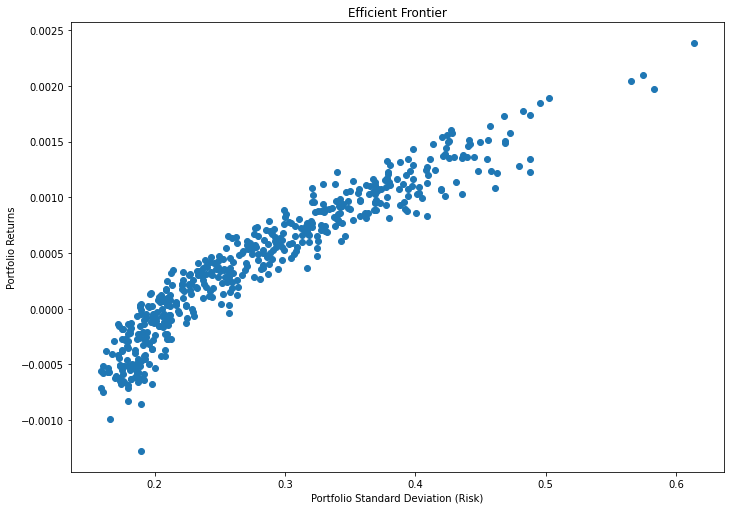

In [277]:
rcParams['figure.figsize'] = 11.69,8.27
plt.scatter(stds, returns)
plt.title('Efficient Frontier')
plt.xlabel('Portfolio Standard Deviation (Risk)')
plt.ylabel('Portfolio Returns')
plt.show();

In [279]:
bond_df_2004_2007.shape[0]

47

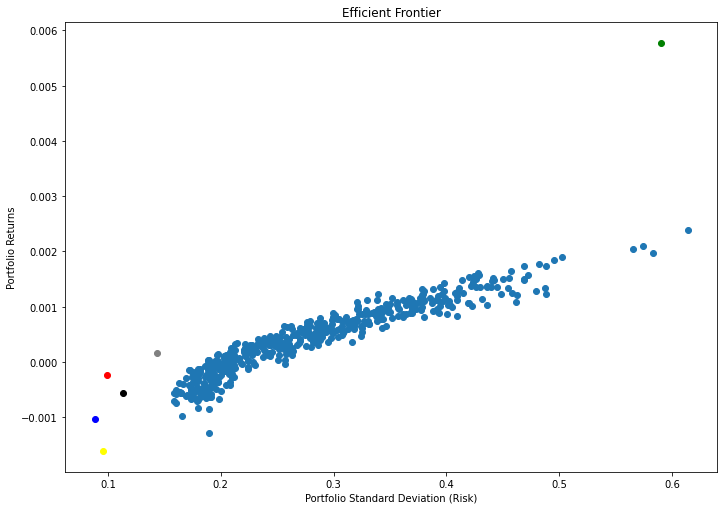

In [280]:
rcParams['figure.figsize'] = 11.69,8.27
plt.scatter(stds, returns)
plt.scatter(bond_df_2004_2007.std().iloc[0]*np.sqrt(47), bond_df_2004_2007.mean().iloc[0],c='k')
plt.scatter(bond_df_2004_2007.std().iloc[1]*np.sqrt(47), bond_df_2004_2007.mean().iloc[1],c='yellow')
plt.scatter(bond_df_2004_2007.std().iloc[2]*np.sqrt(47), bond_df_2004_2007.mean().iloc[2],c='gray')
plt.scatter(bond_df_2004_2007.std().iloc[3]*np.sqrt(47), bond_df_2004_2007.mean().iloc[3],c='green')
plt.scatter(bond_df_2004_2007.std().iloc[4]*np.sqrt(47), bond_df_2004_2007.mean().iloc[4],c='blue')
plt.scatter(bond_df_2004_2007.std().iloc[5]*np.sqrt(47), bond_df_2004_2007.mean().iloc[5],c='red')

plt.title('Efficient Frontier')
plt.xlabel('Portfolio Standard Deviation (Risk)')
plt.ylabel('Portfolio Returns')
plt.show();

**Minimum Variance Portfolio (MV)**

- A minimum variance portfolio indicates a well-diversified portfolio that consists of individually risky assets, which are hedged when traded together, resulting in the lowest possible risk for the rate of expected return.

- A minimum variance portfolio is a collection of securities that combine to minimize the price volatility of the overall portfolio. Volatility is a statistical measure of a particular security's price movement (ups and downs).

In [281]:
min(stds)

0.15867346081814823

In [282]:
stds.index(min(stds))

160

In [283]:
# Minimum Variance Portfolio
returns[stds.index(min(stds))]

-0.0005605622551155269

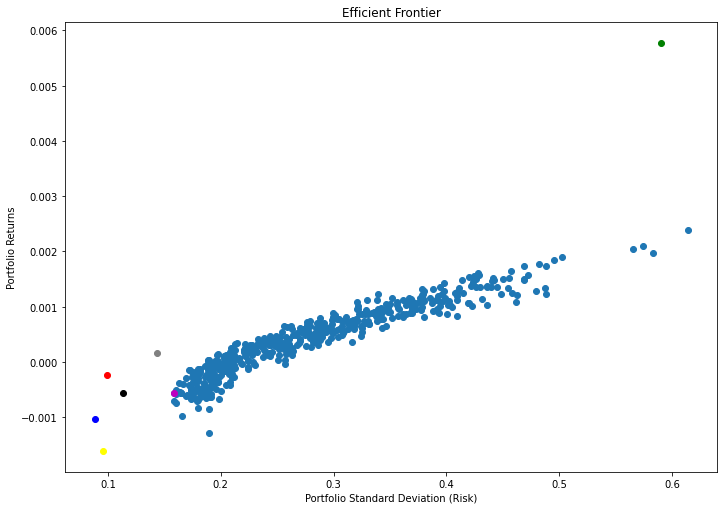

In [284]:
rcParams['figure.figsize'] = 11.69,8.27
plt.scatter(stds, returns)

plt.scatter(bond_df_2004_2007.std().iloc[0]*np.sqrt(47), bond_df_2004_2007.mean().iloc[0],c='k')
plt.scatter(bond_df_2004_2007.std().iloc[1]*np.sqrt(47), bond_df_2004_2007.mean().iloc[1],c='yellow')
plt.scatter(bond_df_2004_2007.std().iloc[2]*np.sqrt(47), bond_df_2004_2007.mean().iloc[2],c='gray')
plt.scatter(bond_df_2004_2007.std().iloc[3]*np.sqrt(47), bond_df_2004_2007.mean().iloc[3],c='green')
plt.scatter(bond_df_2004_2007.std().iloc[4]*np.sqrt(47), bond_df_2004_2007.mean().iloc[4],c='blue')
plt.scatter(bond_df_2004_2007.std().iloc[5]*np.sqrt(47), bond_df_2004_2007.mean().iloc[5],c='red')

plt.scatter(min(stds),returns[stds.index(min(stds))], c='m')

plt.title('Efficient Frontier')
plt.xlabel('Portfolio Standard Deviation (Risk)')
plt.ylabel('Portfolio Returns')
plt.show();